## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../05_input_data/Sites_with_Sentinel_bands_data.xlsx'
df = pd.read_excel(site_data, sheet_name='input_2019')
df.head()

,Site #,Origin,Dominant_s,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,X_N36,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,4.771,1.792,-0.211,-0.261,-2.040,1.932,298987.203,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,5.808,2.496,-0.073,0.392,-0.139,2.674,299016.572,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,5.796,2.546,0.030,0.501,-0.030,2.734,299072.773,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,5.826,2.643,0.000,0.419,-0.431,2.785,299152.693,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,6.059,2.643,0.122,0.647,-0.386,2.809,299249.689,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Site #', 'Origin', 'Dominant_s', 'LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'LN_Cs_wood', 'LN_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'LN_Tag_Cs', 'LN_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_mean', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'LN_Tag_Cs', 'LN_Tag_Sr',
                                  'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])

# Show the first five columns
select.head()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2019B01,r2019B02,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,-0.73,2.58,0.025483,0.040910,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,5.808,2.496,-0.073,0.392,-0.139,2.674,0.59,2.92,0.024075,0.038164,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,5.796,2.546,0.030,0.501,-0.030,2.734,0.78,2.88,0.022492,0.038968,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.52,2.72,0.023742,0.037811,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,6.059,2.643,0.122,0.647,-0.386,2.809,0.22,2.83,0.022916,0.037557,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LN_GS_cub_m           205 non-null    float64
 1   LN_M_stem_kg_m2       205 non-null    float64
 2   LN_M_stem_bark_kg_m2  205 non-null    float64
 3   LN_M_crown_kg_m2      205 non-null    float64
 4   LN_M_foliage_kg_m2    205 non-null    float64
 5   LN_M_AG_kg_m2         205 non-null    float64
 6   LN_Tag_Cs             205 non-null    float64
 7   LN_Tag_Sr             205 non-null    float64
 8   r2019B01              205 non-null    float64
 9   r2019B02              205 non-null    float64
 10  r2019B03              205 non-null    float64
 11  r2019B04              205 non-null    float64
 12  r2019B05              205 non-null    float64
 13  r2019B06              205 non-null    float64
 14  r2019B07              205 non-null    float64
 15  r2019B08              2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["LN_Tag_Cs", "LN_Tag_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_Tag_Cs                                                        \
               count      mean       std   min     25%   50%     75%   max   
Dominant_s                                                                   
Alder           13.0 -0.620769  1.079293 -2.05 -1.4100 -0.89  0.6000  1.11   
Aspen            7.0 -0.957143  1.537441 -2.44 -2.1250 -1.39 -0.0850  1.55   
Birch           45.0 -1.003778  1.084287 -4.11 -1.3300 -0.75 -0.2400  0.44   
Oak              9.0 -0.385556  1.633486 -3.73 -1.1000  0.61  0.7000  1.34   
Pine           130.0 -0.469923  1.290716 -4.68 -1.3175 -0.05  0.4675  1.65   
Spruce           1.0 -2.410000       NaN -2.41 -2.4100 -2.41 -2.4100 -2.41   

           LN_Tag_Sr                                                       
               count      mean       std   min    25%   50%     75%   max  
Dominant_s                                                                 
Alder           13.0  1.115385  0.640971 -0.17  0.520  1.34  1.5400  1.79  
Aspen            7.0  2.920000  0.662319  1.96  2.450  3.16  3.3200  3.78  
Birch           45.0  2.346889  0.850954 -0.25  2.000  2.47  2.6600  4.66  
Oak              9.0  1.760000  1.032945  0.55  1.000  1.47  2.8100  3.33  
Pine           130.0  2.423462  0.925829 -0.09  1.805  2.59  3.1425  4.30  
Spruce           1.0  1.810000       NaN  1.81  1.810  1.81  1.8100  1.81

In [6]:
# Descriptive statistics of main parameters
select.describe()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2019B01,r2019B02,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,5.226868,2.098585,-0.124595,0.077888,-0.960395,2.296215,-0.619073,2.308537,0.023623,0.038592,0.028895,0.219361,0.131344,0.068068,0.759654,-0.692408,0.526662,-15.737088,-10.490763,0.668847
std,1.088124,1.036242,0.780555,0.704301,0.708678,0.923930,1.272242,0.950740,0.006540,0.007341,0.010704,0.049137,0.036023,0.026479,0.091469,0.070703,0.144729,1.547144,1.471517,0.081010
min,1.609000,-1.347000,-2.659000,-2.408000,-3.507000,-0.693000,-4.680000,-0.250000,0.014194,0.026402,0.015301,0.140309,0.078918,0.035914,0.363395,-0.849155,-0.037478,-22.820204,-16.820473,0.386847
25%,4.875000,1.783000,-0.315000,-0.151000,-1.514000,2.001000,-1.390000,1.700000,0.019895,0.034516,0.022685,0.183403,0.102471,0.051182,0.727961,-0.735660,0.470852,-16.494671,-11.364958,0.615553
50%,5.501000,2.408000,0.039000,0.285000,-0.777000,2.565000,-0.480000,2.420000,0.022415,0.036966,0.026123,0.199665,0.121704,0.060839,0.771691,-0.693779,0.562326,-15.454248,-10.299303,0.666882
75%,5.971000,2.788000,0.315000,0.531000,-0.386000,2.896000,0.340000,2.970000,0.025339,0.040237,0.030628,0.250913,0.153232,0.078586,0.814177,-0.660039,0.626609,-14.760403,-9.547850,0.728737
max,6.457000,3.428000,1.384000,1.756000,0.157000,3.515000,1.650000,4.660000,0.059051,0.077038,0.081675,0.423326,0.252487,0.196544,0.914709,-0.389420,0.740912,-12.365163,-5.703308,0.877743


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Tag_Sr"
indep_variables = ['r2019B04', 'r2019B07', 'r2019B09', 'r2019B10']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     LN_GS_cub_m  LN_M_stem_kg_m2  LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
200        6.238            3.125                 0.322             0.560   
201        5.861            2.702                 0.058             0.482   
202        5.935            2.775                -0.030             0.372   
203        5.784            2.546                -0.117             0.182   
204        6.277            2.949                 0.182             0.501   

     LN_M_foliage_kg_m2  LN_M_AG_kg_m2  LN_Tag_Cs  LN_Tag_Sr  r2019B01  \
0

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,r2019B04,r2019B07,r2019B09,r2019B10
0,0.266210,0.793351,0.532051,-15.396488
1,0.183349,0.735493,0.557000,-16.012156
2,0.184066,0.751436,0.568148,-13.609903
3,0.177221,0.732404,0.544717,-14.321650
4,0.183705,0.754481,0.569112,-13.934375


In [11]:
# Columns in "y" data collections
y.head()

,LN_Tag_Sr
0,2.58
1,2.92
2,2.88
3,2.72
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.27152745581162296, 0.09565666152088848, 0.088971568200235]
    Mean: 0.152
    Std: 0.085

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.88428719 0.87898834 0.9030678 ]
    Mean: 0.889
    Std: 0.010

 --------------------
Mean absolute error (MAE): 

    Scores: [0.6795839965689009, 0.6311375976310057, 0.711168671355528]
    Mean: 0.674
    Std: 0.033

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6635123862719116                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.1551614448931099                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.0639228267117087                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 80          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9875215009929939                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6635123862719116
Gamma: 0.1551614448931099
Learning_rate: 0.0639228267117087
Max_depth: 2
N_estimators: 80
Subsample: 0.9875215009929939


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.89428	validation_1-rmse:2.09298
[1]	validation_0-rmse:1.79519	validation_1-rmse:1.99743
[2]	validation_0-rmse:1.70540	validation_1-rmse:1.90836
[3]	validation_0-rmse:1.62058	validation_1-rmse:1.82054
[4]	validation_0-rmse:1.54146	validation_1-rmse:1.73760
[5]	validation_0-rmse:1.46887	validation_1-rmse:1.66239


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.40152	validation_1-rmse:1.59175
[7]	validation_0-rmse:1.33915	validation_1-rmse:1.53078
[8]	validation_0-rmse:1.28178	validation_1-rmse:1.47453
[9]	validation_0-rmse:1.22852	validation_1-rmse:1.41825
[10]	validation_0-rmse:1.17978	validation_1-rmse:1.37060
[11]	validation_0-rmse:1.13520	validation_1-rmse:1.32708
[12]	validation_0-rmse:1.09365	validation_1-rmse:1.28606
[13]	validation_0-rmse:1.05635	validation_1-rmse:1.24668
[14]	validation_0-rmse:1.02076	validation_1-rmse:1.21377
[15]	validation_0-rmse:0.98962	validation_1-rmse:1.18344
[16]	validation_0-rmse:0.96052	validation_1-rmse:1.15237
[17]	validation_0-rmse:0.93478	validation_1-rmse:1.12688
[18]	validation_0-rmse:0.91033	validation_1-rmse:1.10371
[19]	validation_0-rmse:0.88871	validation_1-rmse:1.08317
[20]	validation_0-rmse:0.86882	validation_1-rmse:1.06365
[21]	validation_0-rmse:0.85095	validation_1-rmse:1.04351
[22]	validation_0-rmse:0.83463	validation_1-rmse:1.02321
[23]	validation_0-rmse:0.81960	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88336	validation_1-rmse:2.12534
[1]	validation_0-rmse:1.78464	validation_1-rmse:2.02258
[2]	validation_0-rmse:1.69398	validation_1-rmse:1.92824
[3]	validation_0-rmse:1.60875	validation_1-rmse:1.84271


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.52948	validation_1-rmse:1.76433
[5]	validation_0-rmse:1.45645	validation_1-rmse:1.68798
[6]	validation_0-rmse:1.38863	validation_1-rmse:1.62185
[7]	validation_0-rmse:1.32666	validation_1-rmse:1.55829
[8]	validation_0-rmse:1.26829	validation_1-rmse:1.50349
[9]	validation_0-rmse:1.21465	validation_1-rmse:1.44967
[10]	validation_0-rmse:1.16510	validation_1-rmse:1.40424
[11]	validation_0-rmse:1.11981	validation_1-rmse:1.36321
[12]	validation_0-rmse:1.07832	validation_1-rmse:1.32079
[13]	validation_0-rmse:1.04043	validation_1-rmse:1.28331
[14]	validation_0-rmse:1.00531	validation_1-rmse:1.24930
[15]	validation_0-rmse:0.97369	validation_1-rmse:1.21855
[16]	validation_0-rmse:0.94471	validation_1-rmse:1.19047
[17]	validation_0-rmse:0.91896	validation_1-rmse:1.16562
[18]	validation_0-rmse:0.89483	validation_1-rmse:1.14194
[19]	validation_0-rmse:0.87263	validation_1-rmse:1.12022
[20]	validation_0-rmse:0.85373	validation_1-rmse:1.10150
[21]	validation_0-rmse:0.83482	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95263	validation_1-rmse:1.85102
[1]	validation_0-rmse:1.85162	validation_1-rmse:1.74529
[2]	validation_0-rmse:1.75868	validation_1-rmse:1.65279
[3]	validation_0-rmse:1.67141	validation_1-rmse:1.56161
[4]	validation_0-rmse:1.58932	validation_1-rmse:1.47559
[5]	validation_0-rmse:1.51607	validation_1-rmse:1.39837
[6]	validation_0-rmse:1.44613	validation_1-rmse:1.32333
[7]	validation_0-rmse:1.38288	validation_1-rmse:1.26205
[8]	validation_0-rmse:1.32417	validation_1-rmse:1.20338
[9]	validation_0-rmse:1.26851	validation_1-rmse:1.14466
[10]	validation_0-rmse:1.21855	validation_1-rmse:1.09853
[11]	validation_0-rmse:1.17245	validation_1-rmse:1.05680
[12]	validation_0-rmse:1.13073	validation_1-rmse:1.01931
[13]	validation_0-rmse:1.09177	validation_1-rmse:0.97918
[14]	validation_0-rmse:1.05557	validation_1-rmse:0.94456
[15]	validation_0-rmse:1.02203	validation_1-rmse:0.91743
[16]	validation_0-rmse:0.99150	validation_1-rmse:0.89317
[17]	validation_0-rmse:0.96435	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93483	validation_1-rmse:1.93095
[1]	validation_0-rmse:1.83563	validation_1-rmse:1.83048


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74441	validation_1-rmse:1.72931
[3]	validation_0-rmse:1.65893	validation_1-rmse:1.64087
[4]	validation_0-rmse:1.57871	validation_1-rmse:1.55913
[5]	validation_0-rmse:1.50596	validation_1-rmse:1.48319
[6]	validation_0-rmse:1.43787	validation_1-rmse:1.41420
[7]	validation_0-rmse:1.37607	validation_1-rmse:1.34339
[8]	validation_0-rmse:1.31860	validation_1-rmse:1.28303
[9]	validation_0-rmse:1.26453	validation_1-rmse:1.22790
[10]	validation_0-rmse:1.21576	validation_1-rmse:1.17607
[11]	validation_0-rmse:1.17143	validation_1-rmse:1.12837
[12]	validation_0-rmse:1.13056	validation_1-rmse:1.08225
[13]	validation_0-rmse:1.09295	validation_1-rmse:1.04197
[14]	validation_0-rmse:1.05779	validation_1-rmse:1.00642
[15]	validation_0-rmse:1.02595	validation_1-rmse:0.97064
[16]	validation_0-rmse:0.99752	validation_1-rmse:0.93886
[17]	validation_0-rmse:0.97214	validation_1-rmse:0.91075
[18]	validation_0-rmse:0.94769	validation_1-rmse:0.88627
[19]	validation_0-rmse:0.92479	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94148	validation_1-rmse:1.89590
[1]	validation_0-rmse:1.83906	validation_1-rmse:1.79305
[2]	validation_0-rmse:1.74568	validation_1-rmse:1.70382


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65680	validation_1-rmse:1.62463
[4]	validation_0-rmse:1.57404	validation_1-rmse:1.54686
[5]	validation_0-rmse:1.49885	validation_1-rmse:1.48031
[6]	validation_0-rmse:1.42804	validation_1-rmse:1.41511
[7]	validation_0-rmse:1.36491	validation_1-rmse:1.35675
[8]	validation_0-rmse:1.30473	validation_1-rmse:1.30331
[9]	validation_0-rmse:1.24841	validation_1-rmse:1.25543
[10]	validation_0-rmse:1.19791	validation_1-rmse:1.21407
[11]	validation_0-rmse:1.15163	validation_1-rmse:1.17660
[12]	validation_0-rmse:1.10912	validation_1-rmse:1.14068
[13]	validation_0-rmse:1.06956	validation_1-rmse:1.11016
[14]	validation_0-rmse:1.03203	validation_1-rmse:1.08367
[15]	validation_0-rmse:0.99927	validation_1-rmse:1.05929
[16]	validation_0-rmse:0.96980	validation_1-rmse:1.03736
[17]	validation_0-rmse:0.94234	validation_1-rmse:1.01589
[18]	validation_0-rmse:0.91678	validation_1-rmse:0.99697
[19]	validation_0-rmse:0.89304	validation_1-rmse:0.98396
[20]	validation_0-rmse:0.87200	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91967	validation_1-rmse:1.99391
[1]	validation_0-rmse:1.81904	validation_1-rmse:1.89333
[2]	validation_0-rmse:1.72663	validation_1-rmse:1.80300


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63993	validation_1-rmse:1.71957
[4]	validation_0-rmse:1.56007	validation_1-rmse:1.63792
[5]	validation_0-rmse:1.48608	validation_1-rmse:1.56170
[6]	validation_0-rmse:1.41829	validation_1-rmse:1.49219
[7]	validation_0-rmse:1.35641	validation_1-rmse:1.43215
[8]	validation_0-rmse:1.29726	validation_1-rmse:1.38128
[9]	validation_0-rmse:1.24349	validation_1-rmse:1.33400
[10]	validation_0-rmse:1.19327	validation_1-rmse:1.29178
[11]	validation_0-rmse:1.14747	validation_1-rmse:1.25498
[12]	validation_0-rmse:1.10532	validation_1-rmse:1.21605
[13]	validation_0-rmse:1.06630	validation_1-rmse:1.18070
[14]	validation_0-rmse:1.02947	validation_1-rmse:1.14722
[15]	validation_0-rmse:0.99621	validation_1-rmse:1.12287
[16]	validation_0-rmse:0.96614	validation_1-rmse:1.09952
[17]	validation_0-rmse:0.93904	validation_1-rmse:1.07886
[18]	validation_0-rmse:0.91404	validation_1-rmse:1.05701
[19]	validation_0-rmse:0.89169	validation_1-rmse:1.03905
[20]	validation_0-rmse:0.87180	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93515	validation_1-rmse:1.93035
[1]	validation_0-rmse:1.83476	validation_1-rmse:1.83379
[2]	validation_0-rmse:1.74253	validation_1-rmse:1.74482
[3]	validation_0-rmse:1.65433	validation_1-rmse:1.66283
[4]	validation_0-rmse:1.57241	validation_1-rmse:1.58832
[5]	validation_0-rmse:1.49698	validation_1-rmse:1.51894
[6]	validation_0-rmse:1.42619	validation_1-rmse:1.45646
[7]	validation_0-rmse:1.36332	validation_1-rmse:1.39631
[8]	validation_0-rmse:1.30441	validation_1-rmse:1.34113
[9]	validation_0-rmse:1.24948	validation_1-rmse:1.28922
[10]	validation_0-rmse:1.19956	validation_1-rmse:1.24311
[11]	validation_0-rmse:1.15405	validation_1-rmse:1.20111
[12]	validation_0-rmse:1.11216	validation_1-rmse:1.16296
[13]	validation_0-rmse:1.07303	validation_1-rmse:1.12766
[14]	validation_0-rmse:1.03756	validation_1-rmse:1.09532
[15]	validation_0-rmse:1.00442	validation_1-rmse:1.06690
[16]	validation_0-rmse:0.97477	validation_1-rmse:1.04147
[17]	validation_0-rmse:0.94775	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90612	validation_1-rmse:2.04369
[1]	validation_0-rmse:1.80758	validation_1-rmse:1.93426
[2]	validation_0-rmse:1.71787	validation_1-rmse:1.83828


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63337	validation_1-rmse:1.75177
[4]	validation_0-rmse:1.55329	validation_1-rmse:1.67169
[5]	validation_0-rmse:1.48010	validation_1-rmse:1.59660
[6]	validation_0-rmse:1.41222	validation_1-rmse:1.52925
[7]	validation_0-rmse:1.35049	validation_1-rmse:1.46287
[8]	validation_0-rmse:1.29264	validation_1-rmse:1.40574
[9]	validation_0-rmse:1.23893	validation_1-rmse:1.35251
[10]	validation_0-rmse:1.19033	validation_1-rmse:1.30444
[11]	validation_0-rmse:1.14583	validation_1-rmse:1.26538
[12]	validation_0-rmse:1.10494	validation_1-rmse:1.21878
[13]	validation_0-rmse:1.06712	validation_1-rmse:1.18087
[14]	validation_0-rmse:1.03252	validation_1-rmse:1.14014
[15]	validation_0-rmse:1.00123	validation_1-rmse:1.10171
[16]	validation_0-rmse:0.97136	validation_1-rmse:1.06907
[17]	validation_0-rmse:0.94578	validation_1-rmse:1.03884
[18]	validation_0-rmse:0.92188	validation_1-rmse:1.01028
[19]	validation_0-rmse:0.89801	validation_1-rmse:0.98521
[20]	validation_0-rmse:0.87798	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93626	validation_1-rmse:1.91530
[1]	validation_0-rmse:1.83365	validation_1-rmse:1.81508


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73851	validation_1-rmse:1.72981
[3]	validation_0-rmse:1.64907	validation_1-rmse:1.64140
[4]	validation_0-rmse:1.56737	validation_1-rmse:1.56099
[5]	validation_0-rmse:1.49069	validation_1-rmse:1.49603
[6]	validation_0-rmse:1.42076	validation_1-rmse:1.42918
[7]	validation_0-rmse:1.35610	validation_1-rmse:1.37637
[8]	validation_0-rmse:1.29527	validation_1-rmse:1.32307
[9]	validation_0-rmse:1.23994	validation_1-rmse:1.27260
[10]	validation_0-rmse:1.18868	validation_1-rmse:1.22962
[11]	validation_0-rmse:1.14176	validation_1-rmse:1.19215
[12]	validation_0-rmse:1.09882	validation_1-rmse:1.16252
[13]	validation_0-rmse:1.05907	validation_1-rmse:1.13495
[14]	validation_0-rmse:1.02308	validation_1-rmse:1.10610
[15]	validation_0-rmse:0.98954	validation_1-rmse:1.08402
[16]	validation_0-rmse:0.95906	validation_1-rmse:1.06552
[17]	validation_0-rmse:0.93131	validation_1-rmse:1.05019
[18]	validation_0-rmse:0.90670	validation_1-rmse:1.03181
[19]	validation_0-rmse:0.88304	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94259	validation_1-rmse:1.88763
[1]	validation_0-rmse:1.84110	validation_1-rmse:1.78360
[2]	validation_0-rmse:1.74838	validation_1-rmse:1.68582
[3]	validation_0-rmse:1.66043	validation_1-rmse:1.59950
[4]	validation_0-rmse:1.57815	validation_1-rmse:1.52257
[5]	validation_0-rmse:1.50251	validation_1-rmse:1.44884


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.43295	validation_1-rmse:1.38540
[7]	validation_0-rmse:1.36980	validation_1-rmse:1.31951
[8]	validation_0-rmse:1.30984	validation_1-rmse:1.26546
[9]	validation_0-rmse:1.25500	validation_1-rmse:1.21614
[10]	validation_0-rmse:1.20440	validation_1-rmse:1.17178
[11]	validation_0-rmse:1.15800	validation_1-rmse:1.13211
[12]	validation_0-rmse:1.11584	validation_1-rmse:1.09479
[13]	validation_0-rmse:1.07623	validation_1-rmse:1.05977
[14]	validation_0-rmse:1.04054	validation_1-rmse:1.02637
[15]	validation_0-rmse:1.00778	validation_1-rmse:0.99864
[16]	validation_0-rmse:0.97772	validation_1-rmse:0.97128
[17]	validation_0-rmse:0.95067	validation_1-rmse:0.94683
[18]	validation_0-rmse:0.92557	validation_1-rmse:0.92569
[19]	validation_0-rmse:0.90317	validation_1-rmse:0.90722
[20]	validation_0-rmse:0.88339	validation_1-rmse:0.89289
[21]	validation_0-rmse:0.86475	validation_1-rmse:0.88166
[22]	validation_0-rmse:0.84778	validation_1-rmse:0.87527
[23]	validation_0-rmse:0.83267	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96267	validation_1-rmse:1.80668
[1]	validation_0-rmse:1.86000	validation_1-rmse:1.70614


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.76323	validation_1-rmse:1.61254
[3]	validation_0-rmse:1.67446	validation_1-rmse:1.53267
[4]	validation_0-rmse:1.59063	validation_1-rmse:1.45343
[5]	validation_0-rmse:1.51404	validation_1-rmse:1.38212
[6]	validation_0-rmse:1.44239	validation_1-rmse:1.31588
[7]	validation_0-rmse:1.37727	validation_1-rmse:1.25552
[8]	validation_0-rmse:1.31695	validation_1-rmse:1.20263
[9]	validation_0-rmse:1.26053	validation_1-rmse:1.15278
[10]	validation_0-rmse:1.20970	validation_1-rmse:1.11076
[11]	validation_0-rmse:1.16268	validation_1-rmse:1.07243
[12]	validation_0-rmse:1.11837	validation_1-rmse:1.03632
[13]	validation_0-rmse:1.07875	validation_1-rmse:1.00481
[14]	validation_0-rmse:1.04226	validation_1-rmse:0.98220
[15]	validation_0-rmse:1.00921	validation_1-rmse:0.95837
[16]	validation_0-rmse:0.97890	validation_1-rmse:0.93722
[17]	validation_0-rmse:0.95142	validation_1-rmse:0.92066
[18]	validation_0-rmse:0.92604	validation_1-rmse:0.90675
[19]	validation_0-rmse:0.90240	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95564	validation_1-rmse:1.82241
[1]	validation_0-rmse:1.85196	validation_1-rmse:1.71616
[2]	validation_0-rmse:1.75857	validation_1-rmse:1.62009


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.66940	validation_1-rmse:1.53119
[4]	validation_0-rmse:1.58469	validation_1-rmse:1.45312
[5]	validation_0-rmse:1.50902	validation_1-rmse:1.38032
[6]	validation_0-rmse:1.43692	validation_1-rmse:1.31607
[7]	validation_0-rmse:1.37308	validation_1-rmse:1.25470
[8]	validation_0-rmse:1.31376	validation_1-rmse:1.20141
[9]	validation_0-rmse:1.25692	validation_1-rmse:1.15367
[10]	validation_0-rmse:1.20624	validation_1-rmse:1.10980
[11]	validation_0-rmse:1.16013	validation_1-rmse:1.07080
[12]	validation_0-rmse:1.11753	validation_1-rmse:1.03455
[13]	validation_0-rmse:1.07727	validation_1-rmse:1.00274
[14]	validation_0-rmse:1.04000	validation_1-rmse:0.97649
[15]	validation_0-rmse:1.00602	validation_1-rmse:0.94925
[16]	validation_0-rmse:0.97557	validation_1-rmse:0.92688
[17]	validation_0-rmse:0.94796	validation_1-rmse:0.90570
[18]	validation_0-rmse:0.92222	validation_1-rmse:0.89263
[19]	validation_0-rmse:0.89890	validation_1-rmse:0.88199
[20]	validation_0-rmse:0.87831	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92211	validation_1-rmse:1.98553


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82212	validation_1-rmse:1.88171
[2]	validation_0-rmse:1.72911	validation_1-rmse:1.79312
[3]	validation_0-rmse:1.64125	validation_1-rmse:1.70566
[4]	validation_0-rmse:1.55972	validation_1-rmse:1.62752
[5]	validation_0-rmse:1.48513	validation_1-rmse:1.55362
[6]	validation_0-rmse:1.41519	validation_1-rmse:1.48577
[7]	validation_0-rmse:1.35131	validation_1-rmse:1.42677
[8]	validation_0-rmse:1.29292	validation_1-rmse:1.37303
[9]	validation_0-rmse:1.23819	validation_1-rmse:1.32290
[10]	validation_0-rmse:1.18825	validation_1-rmse:1.27960
[11]	validation_0-rmse:1.14267	validation_1-rmse:1.24082
[12]	validation_0-rmse:1.10151	validation_1-rmse:1.20596
[13]	validation_0-rmse:1.06347	validation_1-rmse:1.17237
[14]	validation_0-rmse:1.02771	validation_1-rmse:1.14038
[15]	validation_0-rmse:0.99528	validation_1-rmse:1.11122
[16]	validation_0-rmse:0.96621	validation_1-rmse:1.08716
[17]	validation_0-rmse:0.94019	validation_1-rmse:1.06430
[18]	validation_0-rmse:0.91586	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88243	validation_1-rmse:2.14000
[1]	validation_0-rmse:1.78538	validation_1-rmse:2.03558


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69763	validation_1-rmse:1.94421
[3]	validation_0-rmse:1.61410	validation_1-rmse:1.85977
[4]	validation_0-rmse:1.53585	validation_1-rmse:1.77717
[5]	validation_0-rmse:1.46420	validation_1-rmse:1.70427
[6]	validation_0-rmse:1.39772	validation_1-rmse:1.63458
[7]	validation_0-rmse:1.33744	validation_1-rmse:1.57021
[8]	validation_0-rmse:1.28141	validation_1-rmse:1.50953
[9]	validation_0-rmse:1.22891	validation_1-rmse:1.45267
[10]	validation_0-rmse:1.18110	validation_1-rmse:1.40504
[11]	validation_0-rmse:1.13736	validation_1-rmse:1.36093
[12]	validation_0-rmse:1.09755	validation_1-rmse:1.31634
[13]	validation_0-rmse:1.06080	validation_1-rmse:1.27674
[14]	validation_0-rmse:1.02696	validation_1-rmse:1.23872
[15]	validation_0-rmse:0.99630	validation_1-rmse:1.20442
[16]	validation_0-rmse:0.96881	validation_1-rmse:1.17632
[17]	validation_0-rmse:0.94319	validation_1-rmse:1.14790
[18]	validation_0-rmse:0.91993	validation_1-rmse:1.11956
[19]	validation_0-rmse:0.89774	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96883	validation_1-rmse:1.77213
[1]	validation_0-rmse:1.86460	validation_1-rmse:1.67345
[2]	validation_0-rmse:1.76966	validation_1-rmse:1.58025
[3]	validation_0-rmse:1.67984	validation_1-rmse:1.49904


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.59611	validation_1-rmse:1.42444
[5]	validation_0-rmse:1.51987	validation_1-rmse:1.35739
[6]	validation_0-rmse:1.44799	validation_1-rmse:1.29494
[7]	validation_0-rmse:1.38338	validation_1-rmse:1.23546
[8]	validation_0-rmse:1.32312	validation_1-rmse:1.18709
[9]	validation_0-rmse:1.26703	validation_1-rmse:1.14259
[10]	validation_0-rmse:1.21568	validation_1-rmse:1.10145
[11]	validation_0-rmse:1.16893	validation_1-rmse:1.06640
[12]	validation_0-rmse:1.12672	validation_1-rmse:1.02996
[13]	validation_0-rmse:1.08699	validation_1-rmse:1.00073
[14]	validation_0-rmse:1.05113	validation_1-rmse:0.97442
[15]	validation_0-rmse:1.01727	validation_1-rmse:0.94946
[16]	validation_0-rmse:0.98737	validation_1-rmse:0.92790
[17]	validation_0-rmse:0.96063	validation_1-rmse:0.91069
[18]	validation_0-rmse:0.93517	validation_1-rmse:0.89739
[19]	validation_0-rmse:0.91199	validation_1-rmse:0.88433
[20]	validation_0-rmse:0.89159	validation_1-rmse:0.87345
[21]	validation_0-rmse:0.87322	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94148	validation_1-rmse:1.89879
[1]	validation_0-rmse:1.83937	validation_1-rmse:1.79884
[2]	validation_0-rmse:1.74653	validation_1-rmse:1.70659
[3]	validation_0-rmse:1.65960	validation_1-rmse:1.61803
[4]	validation_0-rmse:1.57822	validation_1-rmse:1.53565


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.50367	validation_1-rmse:1.46033
[6]	validation_0-rmse:1.43354	validation_1-rmse:1.39057
[7]	validation_0-rmse:1.37240	validation_1-rmse:1.33309
[8]	validation_0-rmse:1.31296	validation_1-rmse:1.27979
[9]	validation_0-rmse:1.25778	validation_1-rmse:1.22606
[10]	validation_0-rmse:1.20702	validation_1-rmse:1.18154
[11]	validation_0-rmse:1.16075	validation_1-rmse:1.14164
[12]	validation_0-rmse:1.11779	validation_1-rmse:1.10233
[13]	validation_0-rmse:1.07869	validation_1-rmse:1.06576
[14]	validation_0-rmse:1.04232	validation_1-rmse:1.03458
[15]	validation_0-rmse:1.00872	validation_1-rmse:1.00826
[16]	validation_0-rmse:0.97807	validation_1-rmse:0.98206
[17]	validation_0-rmse:0.95050	validation_1-rmse:0.96127
[18]	validation_0-rmse:0.92485	validation_1-rmse:0.94057
[19]	validation_0-rmse:0.90015	validation_1-rmse:0.92416
[20]	validation_0-rmse:0.87970	validation_1-rmse:0.90845
[21]	validation_0-rmse:0.86082	validation_1-rmse:0.89643
[22]	validation_0-rmse:0.84345	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94204	validation_1-rmse:1.89491
[1]	validation_0-rmse:1.83920	validation_1-rmse:1.80041
[2]	validation_0-rmse:1.74544	validation_1-rmse:1.70731
[3]	validation_0-rmse:1.65548	validation_1-rmse:1.62139


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57194	validation_1-rmse:1.54549
[5]	validation_0-rmse:1.49496	validation_1-rmse:1.47420
[6]	validation_0-rmse:1.42377	validation_1-rmse:1.41157
[7]	validation_0-rmse:1.35903	validation_1-rmse:1.35142
[8]	validation_0-rmse:1.29796	validation_1-rmse:1.29866
[9]	validation_0-rmse:1.24147	validation_1-rmse:1.25304
[10]	validation_0-rmse:1.19004	validation_1-rmse:1.21252
[11]	validation_0-rmse:1.14289	validation_1-rmse:1.17581
[12]	validation_0-rmse:1.09937	validation_1-rmse:1.13764
[13]	validation_0-rmse:1.05909	validation_1-rmse:1.10761
[14]	validation_0-rmse:1.02205	validation_1-rmse:1.08250
[15]	validation_0-rmse:0.98830	validation_1-rmse:1.06050
[16]	validation_0-rmse:0.95788	validation_1-rmse:1.04125
[17]	validation_0-rmse:0.92965	validation_1-rmse:1.02209
[18]	validation_0-rmse:0.90347	validation_1-rmse:1.00644
[19]	validation_0-rmse:0.87947	validation_1-rmse:0.99275
[20]	validation_0-rmse:0.85867	validation_1-rmse:0.98158
[21]	validation_0-rmse:0.83897	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94507	validation_1-rmse:1.88520
[1]	validation_0-rmse:1.84459	validation_1-rmse:1.78640
[2]	validation_0-rmse:1.75268	validation_1-rmse:1.69109


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.66591	validation_1-rmse:1.60689
[4]	validation_0-rmse:1.58474	validation_1-rmse:1.52964
[5]	validation_0-rmse:1.51071	validation_1-rmse:1.45738
[6]	validation_0-rmse:1.44171	validation_1-rmse:1.39182
[7]	validation_0-rmse:1.37942	validation_1-rmse:1.32564
[8]	validation_0-rmse:1.32157	validation_1-rmse:1.27116
[9]	validation_0-rmse:1.26666	validation_1-rmse:1.21740
[10]	validation_0-rmse:1.21754	validation_1-rmse:1.17003
[11]	validation_0-rmse:1.17269	validation_1-rmse:1.12672
[12]	validation_0-rmse:1.13087	validation_1-rmse:1.08209
[13]	validation_0-rmse:1.09245	validation_1-rmse:1.04737
[14]	validation_0-rmse:1.05713	validation_1-rmse:1.01467
[15]	validation_0-rmse:1.02492	validation_1-rmse:0.98794
[16]	validation_0-rmse:0.99545	validation_1-rmse:0.96055
[17]	validation_0-rmse:0.96829	validation_1-rmse:0.93133
[18]	validation_0-rmse:0.94391	validation_1-rmse:0.90836
[19]	validation_0-rmse:0.92177	validation_1-rmse:0.88715
[20]	validation_0-rmse:0.90156	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94667	validation_1-rmse:1.88129


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84586	validation_1-rmse:1.77804
[2]	validation_0-rmse:1.75404	validation_1-rmse:1.68277
[3]	validation_0-rmse:1.66816	validation_1-rmse:1.59604
[4]	validation_0-rmse:1.58585	validation_1-rmse:1.51092
[5]	validation_0-rmse:1.51232	validation_1-rmse:1.43737
[6]	validation_0-rmse:1.44244	validation_1-rmse:1.36538
[7]	validation_0-rmse:1.38005	validation_1-rmse:1.30223
[8]	validation_0-rmse:1.32233	validation_1-rmse:1.24217
[9]	validation_0-rmse:1.26723	validation_1-rmse:1.18524
[10]	validation_0-rmse:1.21813	validation_1-rmse:1.13180
[11]	validation_0-rmse:1.17312	validation_1-rmse:1.08462
[12]	validation_0-rmse:1.13044	validation_1-rmse:1.04174
[13]	validation_0-rmse:1.09262	validation_1-rmse:1.00326
[14]	validation_0-rmse:1.05716	validation_1-rmse:0.96663
[15]	validation_0-rmse:1.02532	validation_1-rmse:0.93071
[16]	validation_0-rmse:0.99612	validation_1-rmse:0.89903
[17]	validation_0-rmse:0.96933	validation_1-rmse:0.86984
[18]	validation_0-rmse:0.94465	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.97307	validation_1-rmse:1.76176
[1]	validation_0-rmse:1.86789	validation_1-rmse:1.66852
[2]	validation_0-rmse:1.77193	validation_1-rmse:1.58735
[3]	validation_0-rmse:1.68097	validation_1-rmse:1.51401
[4]	validation_0-rmse:1.59696	validation_1-rmse:1.44454
[5]	validation_0-rmse:1.51894	validation_1-rmse:1.38412
[6]	validation_0-rmse:1.44679	validation_1-rmse:1.32578
[7]	validation_0-rmse:1.38213	validation_1-rmse:1.27498
[8]	validation_0-rmse:1.32057	validation_1-rmse:1.22923
[9]	validation_0-rmse:1.26387	validation_1-rmse:1.18569
[10]	validation_0-rmse:1.21247	validation_1-rmse:1.14943
[11]	validation_0-rmse:1.16560	validation_1-rmse:1.11673
[12]	validation_0-rmse:1.12211	validation_1-rmse:1.08554
[13]	validation_0-rmse:1.08154	validation_1-rmse:1.05931
[14]	validation_0-rmse:1.04367	validation_1-rmse:1.03119
[15]	validation_0-rmse:1.01004	validation_1-rmse:1.01098
[16]	validation_0-rmse:0.97960	validation_1-rmse:0.99275
[17]	validation_0-rmse:0.95168	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.97379	validation_1-rmse:1.75595
[1]	validation_0-rmse:1.86933	validation_1-rmse:1.65845


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.77607	validation_1-rmse:1.57016
[3]	validation_0-rmse:1.68645	validation_1-rmse:1.48682
[4]	validation_0-rmse:1.60276	validation_1-rmse:1.40623
[5]	validation_0-rmse:1.52670	validation_1-rmse:1.34049
[6]	validation_0-rmse:1.45516	validation_1-rmse:1.27368
[7]	validation_0-rmse:1.39037	validation_1-rmse:1.21534
[8]	validation_0-rmse:1.32921	validation_1-rmse:1.16334
[9]	validation_0-rmse:1.27278	validation_1-rmse:1.11370
[10]	validation_0-rmse:1.22137	validation_1-rmse:1.07154
[11]	validation_0-rmse:1.17429	validation_1-rmse:1.03373
[12]	validation_0-rmse:1.13216	validation_1-rmse:1.00091
[13]	validation_0-rmse:1.09188	validation_1-rmse:0.96981
[14]	validation_0-rmse:1.05550	validation_1-rmse:0.94485
[15]	validation_0-rmse:1.02170	validation_1-rmse:0.92290
[16]	validation_0-rmse:0.99027	validation_1-rmse:0.90369
[17]	validation_0-rmse:0.96222	validation_1-rmse:0.88846
[18]	validation_0-rmse:0.93599	validation_1-rmse:0.87400
[19]	validation_0-rmse:0.91242	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95385	validation_1-rmse:1.85262
[1]	validation_0-rmse:1.85232	validation_1-rmse:1.75593
[2]	validation_0-rmse:1.76031	validation_1-rmse:1.66283
[3]	validation_0-rmse:1.67288	validation_1-rmse:1.57559
[4]	validation_0-rmse:1.59126	validation_1-rmse:1.50088
[5]	validation_0-rmse:1.51608	validation_1-rmse:1.42660
[6]	validation_0-rmse:1.44642	validation_1-rmse:1.36299
[7]	validation_0-rmse:1.38367	validation_1-rmse:1.30134
[8]	validation_0-rmse:1.32485	validation_1-rmse:1.24423
[9]	validation_0-rmse:1.26974	validation_1-rmse:1.19454
[10]	validation_0-rmse:1.21992	validation_1-rmse:1.14589
[11]	validation_0-rmse:1.17447	validation_1-rmse:1.10119
[12]	validation_0-rmse:1.13319	validation_1-rmse:1.05696
[13]	validation_0-rmse:1.09439	validation_1-rmse:1.01820
[14]	validation_0-rmse:1.05878	validation_1-rmse:0.98631
[15]	validation_0-rmse:1.02635	validation_1-rmse:0.95458
[16]	validation_0-rmse:0.99687	validation_1-rmse:0.92589
[17]	validation_0-rmse:0.97038	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91384	validation_1-rmse:2.01700
[1]	validation_0-rmse:1.81325	validation_1-rmse:1.92050
[2]	validation_0-rmse:1.72242	validation_1-rmse:1.83014
[3]	validation_0-rmse:1.63795	validation_1-rmse:1.74123
[4]	validation_0-rmse:1.55853	validation_1-rmse:1.66438
[5]	validation_0-rmse:1.48679	validation_1-rmse:1.58794
[6]	validation_0-rmse:1.41823	validation_1-rmse:1.52105
[7]	validation_0-rmse:1.35732	validation_1-rmse:1.46009
[8]	validation_0-rmse:1.30032	validation_1-rmse:1.39985
[9]	validation_0-rmse:1.24648	validation_1-rmse:1.34768
[10]	validation_0-rmse:1.19838	validation_1-rmse:1.29611
[11]	validation_0-rmse:1.15433	validation_1-rmse:1.24821
[12]	validation_0-rmse:1.11336	validation_1-rmse:1.20852
[13]	validation_0-rmse:1.07557	validation_1-rmse:1.16930
[14]	validation_0-rmse:1.03906	validation_1-rmse:1.13494
[15]	validation_0-rmse:1.00739	validation_1-rmse:1.10162
[16]	validation_0-rmse:0.97843	validation_1-rmse:1.06968
[17]	validation_0-rmse:0.95214	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93985	validation_1-rmse:1.90448


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83978	validation_1-rmse:1.80251
[2]	validation_0-rmse:1.74849	validation_1-rmse:1.71169
[3]	validation_0-rmse:1.66018	validation_1-rmse:1.62304
[4]	validation_0-rmse:1.57952	validation_1-rmse:1.54701
[5]	validation_0-rmse:1.50453	validation_1-rmse:1.47244
[6]	validation_0-rmse:1.43540	validation_1-rmse:1.40632
[7]	validation_0-rmse:1.37215	validation_1-rmse:1.34163
[8]	validation_0-rmse:1.31229	validation_1-rmse:1.28346
[9]	validation_0-rmse:1.25814	validation_1-rmse:1.23327
[10]	validation_0-rmse:1.20807	validation_1-rmse:1.18590
[11]	validation_0-rmse:1.16218	validation_1-rmse:1.14163
[12]	validation_0-rmse:1.12126	validation_1-rmse:1.09842
[13]	validation_0-rmse:1.08224	validation_1-rmse:1.06007
[14]	validation_0-rmse:1.04765	validation_1-rmse:1.02637
[15]	validation_0-rmse:1.01559	validation_1-rmse:0.99697
[16]	validation_0-rmse:0.98491	validation_1-rmse:0.96653
[17]	validation_0-rmse:0.95731	validation_1-rmse:0.93779
[18]	validation_0-rmse:0.93300	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90282	validation_1-rmse:2.06676
[1]	validation_0-rmse:1.80388	validation_1-rmse:1.96772


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71416	validation_1-rmse:1.87589
[3]	validation_0-rmse:1.62941	validation_1-rmse:1.78935
[4]	validation_0-rmse:1.54990	validation_1-rmse:1.70965
[5]	validation_0-rmse:1.47743	validation_1-rmse:1.63534
[6]	validation_0-rmse:1.40898	validation_1-rmse:1.57178
[7]	validation_0-rmse:1.34752	validation_1-rmse:1.50784
[8]	validation_0-rmse:1.29046	validation_1-rmse:1.45118
[9]	validation_0-rmse:1.23673	validation_1-rmse:1.39719
[10]	validation_0-rmse:1.18781	validation_1-rmse:1.34846
[11]	validation_0-rmse:1.14305	validation_1-rmse:1.30359
[12]	validation_0-rmse:1.10264	validation_1-rmse:1.26272
[13]	validation_0-rmse:1.06548	validation_1-rmse:1.22331
[14]	validation_0-rmse:1.03041	validation_1-rmse:1.18776
[15]	validation_0-rmse:0.99836	validation_1-rmse:1.15238
[16]	validation_0-rmse:0.96972	validation_1-rmse:1.12040
[17]	validation_0-rmse:0.94411	validation_1-rmse:1.09084
[18]	validation_0-rmse:0.91963	validation_1-rmse:1.06562
[19]	validation_0-rmse:0.89812	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93566	validation_1-rmse:1.92929
[1]	validation_0-rmse:1.83526	validation_1-rmse:1.83285


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74415	validation_1-rmse:1.74262
[3]	validation_0-rmse:1.65676	validation_1-rmse:1.65465
[4]	validation_0-rmse:1.57566	validation_1-rmse:1.57022
[5]	validation_0-rmse:1.50061	validation_1-rmse:1.49667
[6]	validation_0-rmse:1.43180	validation_1-rmse:1.42585
[7]	validation_0-rmse:1.36977	validation_1-rmse:1.36370
[8]	validation_0-rmse:1.31018	validation_1-rmse:1.30347
[9]	validation_0-rmse:1.25555	validation_1-rmse:1.24767
[10]	validation_0-rmse:1.20541	validation_1-rmse:1.19726
[11]	validation_0-rmse:1.15963	validation_1-rmse:1.15456
[12]	validation_0-rmse:1.11882	validation_1-rmse:1.11297
[13]	validation_0-rmse:1.07971	validation_1-rmse:1.07563
[14]	validation_0-rmse:1.04444	validation_1-rmse:1.04534
[15]	validation_0-rmse:1.01162	validation_1-rmse:1.01493
[16]	validation_0-rmse:0.98154	validation_1-rmse:0.98962
[17]	validation_0-rmse:0.95455	validation_1-rmse:0.96590
[18]	validation_0-rmse:0.93014	validation_1-rmse:0.94211
[19]	validation_0-rmse:0.90781	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93552	validation_1-rmse:1.93206
[1]	validation_0-rmse:1.83467	validation_1-rmse:1.83870
[2]	validation_0-rmse:1.74218	validation_1-rmse:1.74800


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65560	validation_1-rmse:1.66262
[4]	validation_0-rmse:1.57460	validation_1-rmse:1.58433
[5]	validation_0-rmse:1.50017	validation_1-rmse:1.50942
[6]	validation_0-rmse:1.43080	validation_1-rmse:1.44040
[7]	validation_0-rmse:1.36833	validation_1-rmse:1.37875
[8]	validation_0-rmse:1.30989	validation_1-rmse:1.32613
[9]	validation_0-rmse:1.25556	validation_1-rmse:1.27582
[10]	validation_0-rmse:1.20556	validation_1-rmse:1.23109
[11]	validation_0-rmse:1.16038	validation_1-rmse:1.19155
[12]	validation_0-rmse:1.11728	validation_1-rmse:1.14985
[13]	validation_0-rmse:1.07863	validation_1-rmse:1.11412
[14]	validation_0-rmse:1.04278	validation_1-rmse:1.08247
[15]	validation_0-rmse:1.00959	validation_1-rmse:1.05272
[16]	validation_0-rmse:0.97971	validation_1-rmse:1.02604
[17]	validation_0-rmse:0.95261	validation_1-rmse:1.00305
[18]	validation_0-rmse:0.92777	validation_1-rmse:0.98115
[19]	validation_0-rmse:0.90500	validation_1-rmse:0.96272
[20]	validation_0-rmse:0.88462	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92316	validation_1-rmse:1.98331
[1]	validation_0-rmse:1.82226	validation_1-rmse:1.87842
[2]	validation_0-rmse:1.72937	validation_1-rmse:1.79190
[3]	validation_0-rmse:1.64193	validation_1-rmse:1.70851


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.56141	validation_1-rmse:1.62428
[5]	validation_0-rmse:1.48624	validation_1-rmse:1.55374
[6]	validation_0-rmse:1.41647	validation_1-rmse:1.48156
[7]	validation_0-rmse:1.35338	validation_1-rmse:1.42484
[8]	validation_0-rmse:1.29450	validation_1-rmse:1.37026
[9]	validation_0-rmse:1.24049	validation_1-rmse:1.31757
[10]	validation_0-rmse:1.19108	validation_1-rmse:1.27270
[11]	validation_0-rmse:1.14531	validation_1-rmse:1.23136
[12]	validation_0-rmse:1.10430	validation_1-rmse:1.19626
[13]	validation_0-rmse:1.06520	validation_1-rmse:1.16078
[14]	validation_0-rmse:1.02913	validation_1-rmse:1.12324
[15]	validation_0-rmse:0.99537	validation_1-rmse:1.09803
[16]	validation_0-rmse:0.96405	validation_1-rmse:1.07506
[17]	validation_0-rmse:0.93555	validation_1-rmse:1.05535
[18]	validation_0-rmse:0.91119	validation_1-rmse:1.03075
[19]	validation_0-rmse:0.88953	validation_1-rmse:1.00709
[20]	validation_0-rmse:0.86820	validation_1-rmse:0.99428
[21]	validation_0-rmse:0.84995	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93808	validation_1-rmse:1.91699
[1]	validation_0-rmse:1.83453	validation_1-rmse:1.83099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73898	validation_1-rmse:1.74236
[3]	validation_0-rmse:1.64962	validation_1-rmse:1.66183
[4]	validation_0-rmse:1.56629	validation_1-rmse:1.59187
[5]	validation_0-rmse:1.48989	validation_1-rmse:1.52315
[6]	validation_0-rmse:1.41957	validation_1-rmse:1.46570
[7]	validation_0-rmse:1.35607	validation_1-rmse:1.41394
[8]	validation_0-rmse:1.29624	validation_1-rmse:1.36364
[9]	validation_0-rmse:1.24016	validation_1-rmse:1.31724
[10]	validation_0-rmse:1.18963	validation_1-rmse:1.27772
[11]	validation_0-rmse:1.14332	validation_1-rmse:1.24159
[12]	validation_0-rmse:1.09927	validation_1-rmse:1.20615
[13]	validation_0-rmse:1.05969	validation_1-rmse:1.17372
[14]	validation_0-rmse:1.02296	validation_1-rmse:1.15097
[15]	validation_0-rmse:0.98961	validation_1-rmse:1.12643
[16]	validation_0-rmse:0.95975	validation_1-rmse:1.10478
[17]	validation_0-rmse:0.93234	validation_1-rmse:1.08533
[18]	validation_0-rmse:0.90676	validation_1-rmse:1.06887
[19]	validation_0-rmse:0.88345	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95012	validation_1-rmse:1.86147


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84859	validation_1-rmse:1.76169
[2]	validation_0-rmse:1.75525	validation_1-rmse:1.66898
[3]	validation_0-rmse:1.66713	validation_1-rmse:1.58511
[4]	validation_0-rmse:1.58506	validation_1-rmse:1.51034
[5]	validation_0-rmse:1.50999	validation_1-rmse:1.43906
[6]	validation_0-rmse:1.44041	validation_1-rmse:1.37596
[7]	validation_0-rmse:1.37687	validation_1-rmse:1.31937
[8]	validation_0-rmse:1.31746	validation_1-rmse:1.26534
[9]	validation_0-rmse:1.26257	validation_1-rmse:1.21517
[10]	validation_0-rmse:1.21209	validation_1-rmse:1.16690
[11]	validation_0-rmse:1.16600	validation_1-rmse:1.12245
[12]	validation_0-rmse:1.12460	validation_1-rmse:1.08187
[13]	validation_0-rmse:1.08517	validation_1-rmse:1.04617
[14]	validation_0-rmse:1.04942	validation_1-rmse:1.01125
[15]	validation_0-rmse:1.01718	validation_1-rmse:0.98058
[16]	validation_0-rmse:0.98778	validation_1-rmse:0.95249
[17]	validation_0-rmse:0.96120	validation_1-rmse:0.92744
[18]	validation_0-rmse:0.93703	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92908	validation_1-rmse:1.95152
[1]	validation_0-rmse:1.82765	validation_1-rmse:1.85820


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73622	validation_1-rmse:1.77099
[3]	validation_0-rmse:1.64840	validation_1-rmse:1.69310
[4]	validation_0-rmse:1.56627	validation_1-rmse:1.62709
[5]	validation_0-rmse:1.49133	validation_1-rmse:1.56243
[6]	validation_0-rmse:1.42109	validation_1-rmse:1.50686
[7]	validation_0-rmse:1.36030	validation_1-rmse:1.44906
[8]	validation_0-rmse:1.30015	validation_1-rmse:1.39761
[9]	validation_0-rmse:1.24496	validation_1-rmse:1.35282
[10]	validation_0-rmse:1.19464	validation_1-rmse:1.30967
[11]	validation_0-rmse:1.14853	validation_1-rmse:1.27021
[12]	validation_0-rmse:1.10760	validation_1-rmse:1.22951
[13]	validation_0-rmse:1.06847	validation_1-rmse:1.19390
[14]	validation_0-rmse:1.03223	validation_1-rmse:1.16086
[15]	validation_0-rmse:0.99933	validation_1-rmse:1.12747
[16]	validation_0-rmse:0.96965	validation_1-rmse:1.09719
[17]	validation_0-rmse:0.94343	validation_1-rmse:1.07022
[18]	validation_0-rmse:0.91865	validation_1-rmse:1.04822
[19]	validation_0-rmse:0.89603	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96013	validation_1-rmse:1.82094
[1]	validation_0-rmse:1.85819	validation_1-rmse:1.71832
[2]	validation_0-rmse:1.76235	validation_1-rmse:1.62740


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.67494	validation_1-rmse:1.54143
[4]	validation_0-rmse:1.59375	validation_1-rmse:1.45983
[5]	validation_0-rmse:1.51842	validation_1-rmse:1.38586
[6]	validation_0-rmse:1.44875	validation_1-rmse:1.31620
[7]	validation_0-rmse:1.38571	validation_1-rmse:1.25667
[8]	validation_0-rmse:1.32621	validation_1-rmse:1.19883
[9]	validation_0-rmse:1.27146	validation_1-rmse:1.14431
[10]	validation_0-rmse:1.22152	validation_1-rmse:1.09686
[11]	validation_0-rmse:1.17479	validation_1-rmse:1.05996
[12]	validation_0-rmse:1.13031	validation_1-rmse:1.02305
[13]	validation_0-rmse:1.09147	validation_1-rmse:0.98989
[14]	validation_0-rmse:1.05551	validation_1-rmse:0.95466
[15]	validation_0-rmse:1.02205	validation_1-rmse:0.92856
[16]	validation_0-rmse:0.99102	validation_1-rmse:0.90500
[17]	validation_0-rmse:0.96361	validation_1-rmse:0.88305
[18]	validation_0-rmse:0.93758	validation_1-rmse:0.86604
[19]	validation_0-rmse:0.91303	validation_1-rmse:0.84832
[20]	validation_0-rmse:0.89263	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91065	validation_1-rmse:2.03170
[1]	validation_0-rmse:1.81153	validation_1-rmse:1.93529
[2]	validation_0-rmse:1.72027	validation_1-rmse:1.84696


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63457	validation_1-rmse:1.75954
[4]	validation_0-rmse:1.55530	validation_1-rmse:1.67880
[5]	validation_0-rmse:1.48190	validation_1-rmse:1.60490
[6]	validation_0-rmse:1.41388	validation_1-rmse:1.53559
[7]	validation_0-rmse:1.35283	validation_1-rmse:1.47540
[8]	validation_0-rmse:1.29400	validation_1-rmse:1.41997
[9]	validation_0-rmse:1.24095	validation_1-rmse:1.36560
[10]	validation_0-rmse:1.19110	validation_1-rmse:1.31884
[11]	validation_0-rmse:1.14555	validation_1-rmse:1.27599
[12]	validation_0-rmse:1.10554	validation_1-rmse:1.23583
[13]	validation_0-rmse:1.06829	validation_1-rmse:1.19711
[14]	validation_0-rmse:1.03395	validation_1-rmse:1.16230
[15]	validation_0-rmse:1.00152	validation_1-rmse:1.13055
[16]	validation_0-rmse:0.97259	validation_1-rmse:1.10188
[17]	validation_0-rmse:0.94608	validation_1-rmse:1.07545
[18]	validation_0-rmse:0.92255	validation_1-rmse:1.05042
[19]	validation_0-rmse:0.90085	validation_1-rmse:1.02706
[20]	validation_0-rmse:0.88136	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93984	validation_1-rmse:1.90884


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83829	validation_1-rmse:1.81536
[2]	validation_0-rmse:1.74531	validation_1-rmse:1.72391
[3]	validation_0-rmse:1.65923	validation_1-rmse:1.63485
[4]	validation_0-rmse:1.57826	validation_1-rmse:1.56136
[5]	validation_0-rmse:1.50383	validation_1-rmse:1.48386
[6]	validation_0-rmse:1.43395	validation_1-rmse:1.41829
[7]	validation_0-rmse:1.37345	validation_1-rmse:1.35784
[8]	validation_0-rmse:1.31429	validation_1-rmse:1.30107
[9]	validation_0-rmse:1.25938	validation_1-rmse:1.25021
[10]	validation_0-rmse:1.20931	validation_1-rmse:1.20249
[11]	validation_0-rmse:1.16374	validation_1-rmse:1.15925
[12]	validation_0-rmse:1.12143	validation_1-rmse:1.11545
[13]	validation_0-rmse:1.08307	validation_1-rmse:1.07583
[14]	validation_0-rmse:1.04653	validation_1-rmse:1.04472
[15]	validation_0-rmse:1.01474	validation_1-rmse:1.01178
[16]	validation_0-rmse:0.98574	validation_1-rmse:0.98283
[17]	validation_0-rmse:0.95833	validation_1-rmse:0.95394
[18]	validation_0-rmse:0.93320	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90540	validation_1-rmse:2.04980
[1]	validation_0-rmse:1.80529	validation_1-rmse:1.94955


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71444	validation_1-rmse:1.85558
[3]	validation_0-rmse:1.62745	validation_1-rmse:1.77846
[4]	validation_0-rmse:1.54646	validation_1-rmse:1.70696
[5]	validation_0-rmse:1.47186	validation_1-rmse:1.64164
[6]	validation_0-rmse:1.40231	validation_1-rmse:1.58116
[7]	validation_0-rmse:1.34028	validation_1-rmse:1.51866
[8]	validation_0-rmse:1.28285	validation_1-rmse:1.46995
[9]	validation_0-rmse:1.22817	validation_1-rmse:1.42364
[10]	validation_0-rmse:1.17885	validation_1-rmse:1.38333
[11]	validation_0-rmse:1.13354	validation_1-rmse:1.34637
[12]	validation_0-rmse:1.09276	validation_1-rmse:1.30435
[13]	validation_0-rmse:1.05406	validation_1-rmse:1.27294
[14]	validation_0-rmse:1.01851	validation_1-rmse:1.23832
[15]	validation_0-rmse:0.98589	validation_1-rmse:1.20573
[16]	validation_0-rmse:0.95675	validation_1-rmse:1.17821
[17]	validation_0-rmse:0.93068	validation_1-rmse:1.15368
[18]	validation_0-rmse:0.90577	validation_1-rmse:1.12994
[19]	validation_0-rmse:0.88157	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94642	validation_1-rmse:1.87634
[1]	validation_0-rmse:1.84494	validation_1-rmse:1.77407
[2]	validation_0-rmse:1.75050	validation_1-rmse:1.68311
[3]	validation_0-rmse:1.66282	validation_1-rmse:1.59785
[4]	validation_0-rmse:1.58126	validation_1-rmse:1.51530
[5]	validation_0-rmse:1.50674	validation_1-rmse:1.44233
[6]	validation_0-rmse:1.43690	validation_1-rmse:1.37221
[7]	validation_0-rmse:1.37315	validation_1-rmse:1.30965
[8]	validation_0-rmse:1.31379	validation_1-rmse:1.25335
[9]	validation_0-rmse:1.25939	validation_1-rmse:1.19960
[10]	validation_0-rmse:1.20893	validation_1-rmse:1.15280
[11]	validation_0-rmse:1.16256	validation_1-rmse:1.11055
[12]	validation_0-rmse:1.12017	validation_1-rmse:1.07508
[13]	validation_0-rmse:1.08184	validation_1-rmse:1.04253
[14]	validation_0-rmse:1.04648	validation_1-rmse:1.00912
[15]	validation_0-rmse:1.01357	validation_1-rmse:0.98165
[16]	validation_0-rmse:0.98362	validation_1-rmse:0.95669
[17]	validation_0-rmse:0.95692	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93656	validation_1-rmse:1.91836


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83458	validation_1-rmse:1.81884
[2]	validation_0-rmse:1.74124	validation_1-rmse:1.72652
[3]	validation_0-rmse:1.65423	validation_1-rmse:1.63737
[4]	validation_0-rmse:1.57278	validation_1-rmse:1.55295
[5]	validation_0-rmse:1.49790	validation_1-rmse:1.47698
[6]	validation_0-rmse:1.42833	validation_1-rmse:1.40571
[7]	validation_0-rmse:1.36525	validation_1-rmse:1.34601
[8]	validation_0-rmse:1.30514	validation_1-rmse:1.29020
[9]	validation_0-rmse:1.25026	validation_1-rmse:1.23490
[10]	validation_0-rmse:1.19935	validation_1-rmse:1.18883
[11]	validation_0-rmse:1.15271	validation_1-rmse:1.14733
[12]	validation_0-rmse:1.11076	validation_1-rmse:1.11044
[13]	validation_0-rmse:1.07238	validation_1-rmse:1.07721
[14]	validation_0-rmse:1.03634	validation_1-rmse:1.04645
[15]	validation_0-rmse:1.00307	validation_1-rmse:1.01498
[16]	validation_0-rmse:0.97339	validation_1-rmse:0.98585
[17]	validation_0-rmse:0.94592	validation_1-rmse:0.96126
[18]	validation_0-rmse:0.92049	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91398	validation_1-rmse:2.02030
[1]	validation_0-rmse:1.81267	validation_1-rmse:1.92865
[2]	validation_0-rmse:1.72165	validation_1-rmse:1.84447
[3]	validation_0-rmse:1.63554	validation_1-rmse:1.76411
[4]	validation_0-rmse:1.55535	validation_1-rmse:1.69000
[5]	validation_0-rmse:1.48136	validation_1-rmse:1.62068
[6]	validation_0-rmse:1.41192	validation_1-rmse:1.56030
[7]	validation_0-rmse:1.34971	validation_1-rmse:1.50399
[8]	validation_0-rmse:1.29116	validation_1-rmse:1.45005
[9]	validation_0-rmse:1.23666	validation_1-rmse:1.40286
[10]	validation_0-rmse:1.18732	validation_1-rmse:1.35882
[11]	validation_0-rmse:1.14212	validation_1-rmse:1.31820
[12]	validation_0-rmse:1.10081	validation_1-rmse:1.28121
[13]	validation_0-rmse:1.06277	validation_1-rmse:1.24485
[14]	validation_0-rmse:1.02635	validation_1-rmse:1.21555
[15]	validation_0-rmse:0.99510	validation_1-rmse:1.18892
[16]	validation_0-rmse:0.96560	validation_1-rmse:1.16085
[17]	validation_0-rmse:0.93960	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90865	validation_1-rmse:2.03188
[1]	validation_0-rmse:1.80793	validation_1-rmse:1.92964


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71463	validation_1-rmse:1.84150
[3]	validation_0-rmse:1.62685	validation_1-rmse:1.75656
[4]	validation_0-rmse:1.54552	validation_1-rmse:1.67315
[5]	validation_0-rmse:1.46953	validation_1-rmse:1.59649
[6]	validation_0-rmse:1.39954	validation_1-rmse:1.52574
[7]	validation_0-rmse:1.33691	validation_1-rmse:1.46606
[8]	validation_0-rmse:1.27762	validation_1-rmse:1.40871
[9]	validation_0-rmse:1.22308	validation_1-rmse:1.35382
[10]	validation_0-rmse:1.17283	validation_1-rmse:1.30672
[11]	validation_0-rmse:1.12693	validation_1-rmse:1.26454
[12]	validation_0-rmse:1.08577	validation_1-rmse:1.22717
[13]	validation_0-rmse:1.04634	validation_1-rmse:1.19375
[14]	validation_0-rmse:1.01098	validation_1-rmse:1.16153
[15]	validation_0-rmse:0.97759	validation_1-rmse:1.13835
[16]	validation_0-rmse:0.94722	validation_1-rmse:1.11362
[17]	validation_0-rmse:0.91986	validation_1-rmse:1.09159
[18]	validation_0-rmse:0.89537	validation_1-rmse:1.06981
[19]	validation_0-rmse:0.87356	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93617	validation_1-rmse:1.92585
[1]	validation_0-rmse:1.83680	validation_1-rmse:1.82399
[2]	validation_0-rmse:1.74733	validation_1-rmse:1.73043
[3]	validation_0-rmse:1.66162	validation_1-rmse:1.64071


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58165	validation_1-rmse:1.55784
[5]	validation_0-rmse:1.50903	validation_1-rmse:1.48038
[6]	validation_0-rmse:1.44141	validation_1-rmse:1.40960
[7]	validation_0-rmse:1.37837	validation_1-rmse:1.34378
[8]	validation_0-rmse:1.32054	validation_1-rmse:1.28204
[9]	validation_0-rmse:1.26707	validation_1-rmse:1.22433
[10]	validation_0-rmse:1.21791	validation_1-rmse:1.17153
[11]	validation_0-rmse:1.17296	validation_1-rmse:1.12415
[12]	validation_0-rmse:1.13279	validation_1-rmse:1.08410
[13]	validation_0-rmse:1.09526	validation_1-rmse:1.04353
[14]	validation_0-rmse:1.06039	validation_1-rmse:1.00483
[15]	validation_0-rmse:1.02801	validation_1-rmse:0.96891
[16]	validation_0-rmse:0.99872	validation_1-rmse:0.93627
[17]	validation_0-rmse:0.97255	validation_1-rmse:0.90742
[18]	validation_0-rmse:0.94854	validation_1-rmse:0.88092
[19]	validation_0-rmse:0.92607	validation_1-rmse:0.85482
[20]	validation_0-rmse:0.90642	validation_1-rmse:0.83260
[21]	validation_0-rmse:0.88833	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98993	validation_1-rmse:1.67023
[1]	validation_0-rmse:1.88445	validation_1-rmse:1.58024


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.78693	validation_1-rmse:1.48995
[3]	validation_0-rmse:1.69499	validation_1-rmse:1.41077
[4]	validation_0-rmse:1.60964	validation_1-rmse:1.34173
[5]	validation_0-rmse:1.53108	validation_1-rmse:1.27679
[6]	validation_0-rmse:1.45827	validation_1-rmse:1.22091
[7]	validation_0-rmse:1.39208	validation_1-rmse:1.16592
[8]	validation_0-rmse:1.32905	validation_1-rmse:1.12159
[9]	validation_0-rmse:1.27106	validation_1-rmse:1.08137
[10]	validation_0-rmse:1.21749	validation_1-rmse:1.04683
[11]	validation_0-rmse:1.16850	validation_1-rmse:1.01861
[12]	validation_0-rmse:1.12212	validation_1-rmse:0.98649
[13]	validation_0-rmse:1.08055	validation_1-rmse:0.96211
[14]	validation_0-rmse:1.04294	validation_1-rmse:0.94116
[15]	validation_0-rmse:1.00830	validation_1-rmse:0.92486
[16]	validation_0-rmse:0.97681	validation_1-rmse:0.91216
[17]	validation_0-rmse:0.94844	validation_1-rmse:0.89895
[18]	validation_0-rmse:0.92215	validation_1-rmse:0.88983
[19]	validation_0-rmse:0.89811	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.99394	validation_1-rmse:1.65188
[1]	validation_0-rmse:1.89082	validation_1-rmse:1.55132
[2]	validation_0-rmse:1.79597	validation_1-rmse:1.45436
[3]	validation_0-rmse:1.70638	validation_1-rmse:1.37048
[4]	validation_0-rmse:1.62217	validation_1-rmse:1.29386


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.54525	validation_1-rmse:1.22137
[6]	validation_0-rmse:1.47335	validation_1-rmse:1.15701
[7]	validation_0-rmse:1.40866	validation_1-rmse:1.09417
[8]	validation_0-rmse:1.34789	validation_1-rmse:1.03940
[9]	validation_0-rmse:1.29118	validation_1-rmse:0.99088
[10]	validation_0-rmse:1.23943	validation_1-rmse:0.94568
[11]	validation_0-rmse:1.19174	validation_1-rmse:0.90429
[12]	validation_0-rmse:1.14946	validation_1-rmse:0.86561
[13]	validation_0-rmse:1.10944	validation_1-rmse:0.83829
[14]	validation_0-rmse:1.07318	validation_1-rmse:0.81176
[15]	validation_0-rmse:1.03954	validation_1-rmse:0.78840
[16]	validation_0-rmse:1.00907	validation_1-rmse:0.76048
[17]	validation_0-rmse:0.98171	validation_1-rmse:0.74137
[18]	validation_0-rmse:0.95558	validation_1-rmse:0.72545
[19]	validation_0-rmse:0.93118	validation_1-rmse:0.70951
[20]	validation_0-rmse:0.90976	validation_1-rmse:0.69533
[21]	validation_0-rmse:0.89054	validation_1-rmse:0.68716
[22]	validation_0-rmse:0.87341	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91198	validation_1-rmse:2.02969


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81300	validation_1-rmse:1.93178
[2]	validation_0-rmse:1.72075	validation_1-rmse:1.83702
[3]	validation_0-rmse:1.63570	validation_1-rmse:1.75015
[4]	validation_0-rmse:1.55619	validation_1-rmse:1.66878
[5]	validation_0-rmse:1.48384	validation_1-rmse:1.59627
[6]	validation_0-rmse:1.41645	validation_1-rmse:1.53062
[7]	validation_0-rmse:1.35402	validation_1-rmse:1.46629
[8]	validation_0-rmse:1.29600	validation_1-rmse:1.40763
[9]	validation_0-rmse:1.24266	validation_1-rmse:1.35214
[10]	validation_0-rmse:1.19416	validation_1-rmse:1.30256
[11]	validation_0-rmse:1.15069	validation_1-rmse:1.25864
[12]	validation_0-rmse:1.11021	validation_1-rmse:1.21647
[13]	validation_0-rmse:1.07292	validation_1-rmse:1.18096
[14]	validation_0-rmse:1.03758	validation_1-rmse:1.14551
[15]	validation_0-rmse:1.00515	validation_1-rmse:1.11409
[16]	validation_0-rmse:0.97554	validation_1-rmse:1.08519
[17]	validation_0-rmse:0.94831	validation_1-rmse:1.05875
[18]	validation_0-rmse:0.92445	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.98013	validation_1-rmse:1.71963
[1]	validation_0-rmse:1.87538	validation_1-rmse:1.62257
[2]	validation_0-rmse:1.78081	validation_1-rmse:1.53516
[3]	validation_0-rmse:1.69134	validation_1-rmse:1.45398
[4]	validation_0-rmse:1.60848	validation_1-rmse:1.37622
[5]	validation_0-rmse:1.53195	validation_1-rmse:1.30816
[6]	validation_0-rmse:1.46169	validation_1-rmse:1.24477
[7]	validation_0-rmse:1.39641	validation_1-rmse:1.18882
[8]	validation_0-rmse:1.33489	validation_1-rmse:1.13868
[9]	validation_0-rmse:1.27855	validation_1-rmse:1.08863
[10]	validation_0-rmse:1.22679	validation_1-rmse:1.04659
[11]	validation_0-rmse:1.17947	validation_1-rmse:1.01063
[12]	validation_0-rmse:1.13605	validation_1-rmse:0.97849
[13]	validation_0-rmse:1.09674	validation_1-rmse:0.95298
[14]	validation_0-rmse:1.05907	validation_1-rmse:0.92556
[15]	validation_0-rmse:1.02509	validation_1-rmse:0.90415
[16]	validation_0-rmse:0.99449	validation_1-rmse:0.88606
[17]	validation_0-rmse:0.96651	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91397	validation_1-rmse:2.02790
[1]	validation_0-rmse:1.81338	validation_1-rmse:1.92978
[2]	validation_0-rmse:1.72467	validation_1-rmse:1.84573
[3]	validation_0-rmse:1.63803	validation_1-rmse:1.76647
[4]	validation_0-rmse:1.55713	validation_1-rmse:1.68786
[5]	validation_0-rmse:1.48285	validation_1-rmse:1.61975
[6]	validation_0-rmse:1.41473	validation_1-rmse:1.55365
[7]	validation_0-rmse:1.35228	validation_1-rmse:1.49180
[8]	validation_0-rmse:1.29424	validation_1-rmse:1.43687
[9]	validation_0-rmse:1.23998	validation_1-rmse:1.38204
[10]	validation_0-rmse:1.19073	validation_1-rmse:1.33589
[11]	validation_0-rmse:1.14570	validation_1-rmse:1.29173
[12]	validation_0-rmse:1.10518	validation_1-rmse:1.25162
[13]	validation_0-rmse:1.06641	validation_1-rmse:1.21570
[14]	validation_0-rmse:1.03075	validation_1-rmse:1.18223
[15]	validation_0-rmse:0.99842	validation_1-rmse:1.14828
[16]	validation_0-rmse:0.96915	validation_1-rmse:1.11857
[17]	validation_0-rmse:0.94296	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96429	validation_1-rmse:1.78881


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86050	validation_1-rmse:1.68588
[2]	validation_0-rmse:1.76489	validation_1-rmse:1.59122
[3]	validation_0-rmse:1.67602	validation_1-rmse:1.50527
[4]	validation_0-rmse:1.59303	validation_1-rmse:1.42360
[5]	validation_0-rmse:1.51737	validation_1-rmse:1.35152
[6]	validation_0-rmse:1.44694	validation_1-rmse:1.28580
[7]	validation_0-rmse:1.38104	validation_1-rmse:1.22569
[8]	validation_0-rmse:1.32081	validation_1-rmse:1.17205
[9]	validation_0-rmse:1.26498	validation_1-rmse:1.11925
[10]	validation_0-rmse:1.21407	validation_1-rmse:1.07527
[11]	validation_0-rmse:1.16755	validation_1-rmse:1.03677
[12]	validation_0-rmse:1.12350	validation_1-rmse:0.99872
[13]	validation_0-rmse:1.08443	validation_1-rmse:0.96437
[14]	validation_0-rmse:1.04715	validation_1-rmse:0.93532
[15]	validation_0-rmse:1.01357	validation_1-rmse:0.90769
[16]	validation_0-rmse:0.98313	validation_1-rmse:0.88482
[17]	validation_0-rmse:0.95562	validation_1-rmse:0.86679
[18]	validation_0-rmse:0.93007	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92392	validation_1-rmse:1.97484
[1]	validation_0-rmse:1.82403	validation_1-rmse:1.86971
[2]	validation_0-rmse:1.73275	validation_1-rmse:1.77791


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.64686	validation_1-rmse:1.68978
[4]	validation_0-rmse:1.56705	validation_1-rmse:1.60463
[5]	validation_0-rmse:1.49346	validation_1-rmse:1.52883
[6]	validation_0-rmse:1.42512	validation_1-rmse:1.45607
[7]	validation_0-rmse:1.36350	validation_1-rmse:1.39577
[8]	validation_0-rmse:1.30420	validation_1-rmse:1.33045
[9]	validation_0-rmse:1.25086	validation_1-rmse:1.27262
[10]	validation_0-rmse:1.20193	validation_1-rmse:1.21894
[11]	validation_0-rmse:1.15742	validation_1-rmse:1.17004
[12]	validation_0-rmse:1.11540	validation_1-rmse:1.12715
[13]	validation_0-rmse:1.07743	validation_1-rmse:1.09094
[14]	validation_0-rmse:1.04266	validation_1-rmse:1.05706
[15]	validation_0-rmse:1.01009	validation_1-rmse:1.02637
[16]	validation_0-rmse:0.98064	validation_1-rmse:0.99416
[17]	validation_0-rmse:0.95375	validation_1-rmse:0.96746
[18]	validation_0-rmse:0.92952	validation_1-rmse:0.94450
[19]	validation_0-rmse:0.90746	validation_1-rmse:0.92542
[20]	validation_0-rmse:0.88787	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93411	validation_1-rmse:1.92419


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83185	validation_1-rmse:1.82895
[2]	validation_0-rmse:1.73885	validation_1-rmse:1.74338
[3]	validation_0-rmse:1.65082	validation_1-rmse:1.65749
[4]	validation_0-rmse:1.56846	validation_1-rmse:1.58710
[5]	validation_0-rmse:1.49299	validation_1-rmse:1.51414
[6]	validation_0-rmse:1.42211	validation_1-rmse:1.45501
[7]	validation_0-rmse:1.35804	validation_1-rmse:1.40158
[8]	validation_0-rmse:1.29801	validation_1-rmse:1.34344
[9]	validation_0-rmse:1.24233	validation_1-rmse:1.29872
[10]	validation_0-rmse:1.19181	validation_1-rmse:1.25024
[11]	validation_0-rmse:1.14552	validation_1-rmse:1.20596
[12]	validation_0-rmse:1.10270	validation_1-rmse:1.16992
[13]	validation_0-rmse:1.06400	validation_1-rmse:1.13089
[14]	validation_0-rmse:1.02689	validation_1-rmse:1.09953
[15]	validation_0-rmse:0.99326	validation_1-rmse:1.06572
[16]	validation_0-rmse:0.96298	validation_1-rmse:1.03547
[17]	validation_0-rmse:0.93563	validation_1-rmse:1.00969
[18]	validation_0-rmse:0.90948	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93127	validation_1-rmse:1.94742
[1]	validation_0-rmse:1.82994	validation_1-rmse:1.84648
[2]	validation_0-rmse:1.73953	validation_1-rmse:1.75935
[3]	validation_0-rmse:1.65277	validation_1-rmse:1.67482
[4]	validation_0-rmse:1.57209	validation_1-rmse:1.59328
[5]	validation_0-rmse:1.49827	validation_1-rmse:1.52204
[6]	validation_0-rmse:1.42944	validation_1-rmse:1.45029
[7]	validation_0-rmse:1.36824	validation_1-rmse:1.39184
[8]	validation_0-rmse:1.30944	validation_1-rmse:1.33693
[9]	validation_0-rmse:1.25505	validation_1-rmse:1.28010
[10]	validation_0-rmse:1.20484	validation_1-rmse:1.23498
[11]	validation_0-rmse:1.15897	validation_1-rmse:1.19357
[12]	validation_0-rmse:1.11648	validation_1-rmse:1.15435
[13]	validation_0-rmse:1.07836	validation_1-rmse:1.11936
[14]	validation_0-rmse:1.04227	validation_1-rmse:1.08585
[15]	validation_0-rmse:1.00885	validation_1-rmse:1.05453
[16]	validation_0-rmse:0.97926	validation_1-rmse:1.03106
[17]	validation_0-rmse:0.95162	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95152	validation_1-rmse:1.85425
[1]	validation_0-rmse:1.84953	validation_1-rmse:1.74413
[2]	validation_0-rmse:1.75746	validation_1-rmse:1.64989
[3]	validation_0-rmse:1.66947	validation_1-rmse:1.56650


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58623	validation_1-rmse:1.49122
[5]	validation_0-rmse:1.50985	validation_1-rmse:1.41803
[6]	validation_0-rmse:1.43856	validation_1-rmse:1.35547
[7]	validation_0-rmse:1.37606	validation_1-rmse:1.29373
[8]	validation_0-rmse:1.31690	validation_1-rmse:1.24250
[9]	validation_0-rmse:1.26050	validation_1-rmse:1.19598
[10]	validation_0-rmse:1.21046	validation_1-rmse:1.14861
[11]	validation_0-rmse:1.16479	validation_1-rmse:1.10559
[12]	validation_0-rmse:1.12257	validation_1-rmse:1.06604
[13]	validation_0-rmse:1.08309	validation_1-rmse:1.03137
[14]	validation_0-rmse:1.04479	validation_1-rmse:1.00237
[15]	validation_0-rmse:1.01278	validation_1-rmse:0.97399
[16]	validation_0-rmse:0.98391	validation_1-rmse:0.94895
[17]	validation_0-rmse:0.95759	validation_1-rmse:0.92662
[18]	validation_0-rmse:0.93048	validation_1-rmse:0.91056
[19]	validation_0-rmse:0.90787	validation_1-rmse:0.89525
[20]	validation_0-rmse:0.88818	validation_1-rmse:0.87885
[21]	validation_0-rmse:0.86912	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95779	validation_1-rmse:1.82069
[1]	validation_0-rmse:1.85396	validation_1-rmse:1.72491
[2]	validation_0-rmse:1.75848	validation_1-rmse:1.63940
[3]	validation_0-rmse:1.66841	validation_1-rmse:1.55901


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.58439	validation_1-rmse:1.48397
[5]	validation_0-rmse:1.50703	validation_1-rmse:1.41755
[6]	validation_0-rmse:1.43549	validation_1-rmse:1.35532
[7]	validation_0-rmse:1.37022	validation_1-rmse:1.30310
[8]	validation_0-rmse:1.30920	validation_1-rmse:1.25493
[9]	validation_0-rmse:1.25257	validation_1-rmse:1.20875
[10]	validation_0-rmse:1.20061	validation_1-rmse:1.17202
[11]	validation_0-rmse:1.15335	validation_1-rmse:1.13816
[12]	validation_0-rmse:1.10962	validation_1-rmse:1.10993
[13]	validation_0-rmse:1.06929	validation_1-rmse:1.08417
[14]	validation_0-rmse:1.03184	validation_1-rmse:1.05645
[15]	validation_0-rmse:0.99813	validation_1-rmse:1.03815
[16]	validation_0-rmse:0.96736	validation_1-rmse:1.02242
[17]	validation_0-rmse:0.93923	validation_1-rmse:1.00690
[18]	validation_0-rmse:0.91359	validation_1-rmse:0.99090
[19]	validation_0-rmse:0.89063	validation_1-rmse:0.97649
[20]	validation_0-rmse:0.86963	validation_1-rmse:0.96911
[21]	validation_0-rmse:0.84969	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89618	validation_1-rmse:2.08022


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79874	validation_1-rmse:1.96629
[2]	validation_0-rmse:1.70988	validation_1-rmse:1.86979
[3]	validation_0-rmse:1.62673	validation_1-rmse:1.77705
[4]	validation_0-rmse:1.54926	validation_1-rmse:1.68842
[5]	validation_0-rmse:1.47846	validation_1-rmse:1.60960
[6]	validation_0-rmse:1.41207	validation_1-rmse:1.52702
[7]	validation_0-rmse:1.35091	validation_1-rmse:1.45950
[8]	validation_0-rmse:1.29437	validation_1-rmse:1.39217
[9]	validation_0-rmse:1.24179	validation_1-rmse:1.32937
[10]	validation_0-rmse:1.19439	validation_1-rmse:1.27256
[11]	validation_0-rmse:1.15101	validation_1-rmse:1.21910
[12]	validation_0-rmse:1.11077	validation_1-rmse:1.17400
[13]	validation_0-rmse:1.07384	validation_1-rmse:1.13473
[14]	validation_0-rmse:1.03934	validation_1-rmse:1.09363
[15]	validation_0-rmse:1.00850	validation_1-rmse:1.05484
[16]	validation_0-rmse:0.98087	validation_1-rmse:1.02142
[17]	validation_0-rmse:0.95513	validation_1-rmse:0.99474
[18]	validation_0-rmse:0.93044	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94374	validation_1-rmse:1.89351
[1]	validation_0-rmse:1.84124	validation_1-rmse:1.80074


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74973	validation_1-rmse:1.70385
[3]	validation_0-rmse:1.66260	validation_1-rmse:1.62264
[4]	validation_0-rmse:1.58095	validation_1-rmse:1.54854
[5]	validation_0-rmse:1.50612	validation_1-rmse:1.47806
[6]	validation_0-rmse:1.43687	validation_1-rmse:1.41672
[7]	validation_0-rmse:1.37374	validation_1-rmse:1.34985
[8]	validation_0-rmse:1.31418	validation_1-rmse:1.29651
[9]	validation_0-rmse:1.25933	validation_1-rmse:1.24731
[10]	validation_0-rmse:1.20870	validation_1-rmse:1.20300
[11]	validation_0-rmse:1.16287	validation_1-rmse:1.16270
[12]	validation_0-rmse:1.12099	validation_1-rmse:1.11992
[13]	validation_0-rmse:1.08288	validation_1-rmse:1.08323
[14]	validation_0-rmse:1.04472	validation_1-rmse:1.05687
[15]	validation_0-rmse:1.01234	validation_1-rmse:1.02848
[16]	validation_0-rmse:0.98230	validation_1-rmse:1.00318
[17]	validation_0-rmse:0.95422	validation_1-rmse:0.98032
[18]	validation_0-rmse:0.92848	validation_1-rmse:0.96506
[19]	validation_0-rmse:0.90328	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96550	validation_1-rmse:1.78865
[1]	validation_0-rmse:1.86126	validation_1-rmse:1.68914
[2]	validation_0-rmse:1.76774	validation_1-rmse:1.59821
[3]	validation_0-rmse:1.67836	validation_1-rmse:1.51898


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.59479	validation_1-rmse:1.44442
[5]	validation_0-rmse:1.51783	validation_1-rmse:1.37797
[6]	validation_0-rmse:1.44652	validation_1-rmse:1.31598
[7]	validation_0-rmse:1.38241	validation_1-rmse:1.25414
[8]	validation_0-rmse:1.32088	validation_1-rmse:1.20540
[9]	validation_0-rmse:1.26493	validation_1-rmse:1.15504
[10]	validation_0-rmse:1.21271	validation_1-rmse:1.11614
[11]	validation_0-rmse:1.16508	validation_1-rmse:1.08188
[12]	validation_0-rmse:1.12206	validation_1-rmse:1.04240
[13]	validation_0-rmse:1.08217	validation_1-rmse:1.01480
[14]	validation_0-rmse:1.04484	validation_1-rmse:0.98700
[15]	validation_0-rmse:1.01109	validation_1-rmse:0.96073
[16]	validation_0-rmse:0.98012	validation_1-rmse:0.93808
[17]	validation_0-rmse:0.95197	validation_1-rmse:0.91814
[18]	validation_0-rmse:0.92588	validation_1-rmse:0.90187
[19]	validation_0-rmse:0.90201	validation_1-rmse:0.88748
[20]	validation_0-rmse:0.87980	validation_1-rmse:0.87501
[21]	validation_0-rmse:0.86074	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93220	validation_1-rmse:1.93707
[1]	validation_0-rmse:1.83205	validation_1-rmse:1.83174
[2]	validation_0-rmse:1.74048	validation_1-rmse:1.73689
[3]	validation_0-rmse:1.65345	validation_1-rmse:1.64867
[4]	validation_0-rmse:1.57256	validation_1-rmse:1.56824
[5]	validation_0-rmse:1.49805	validation_1-rmse:1.49289


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.42843	validation_1-rmse:1.42368
[7]	validation_0-rmse:1.36651	validation_1-rmse:1.35929
[8]	validation_0-rmse:1.30768	validation_1-rmse:1.29914
[9]	validation_0-rmse:1.25336	validation_1-rmse:1.24558
[10]	validation_0-rmse:1.20391	validation_1-rmse:1.19539
[11]	validation_0-rmse:1.15888	validation_1-rmse:1.14963
[12]	validation_0-rmse:1.11823	validation_1-rmse:1.10793
[13]	validation_0-rmse:1.07949	validation_1-rmse:1.07003
[14]	validation_0-rmse:1.04484	validation_1-rmse:1.03462
[15]	validation_0-rmse:1.01187	validation_1-rmse:1.00354
[16]	validation_0-rmse:0.98244	validation_1-rmse:0.97635
[17]	validation_0-rmse:0.95589	validation_1-rmse:0.95208
[18]	validation_0-rmse:0.93144	validation_1-rmse:0.93067
[19]	validation_0-rmse:0.90921	validation_1-rmse:0.90829
[20]	validation_0-rmse:0.88930	validation_1-rmse:0.89097
[21]	validation_0-rmse:0.87098	validation_1-rmse:0.87481
[22]	validation_0-rmse:0.85432	validation_1-rmse:0.86113
[23]	validation_0-rmse:0.83764	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96320	validation_1-rmse:1.79633


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86188	validation_1-rmse:1.67929
[2]	validation_0-rmse:1.76802	validation_1-rmse:1.58327
[3]	validation_0-rmse:1.68035	validation_1-rmse:1.49198
[4]	validation_0-rmse:1.59859	validation_1-rmse:1.40655
[5]	validation_0-rmse:1.52374	validation_1-rmse:1.32907
[6]	validation_0-rmse:1.45408	validation_1-rmse:1.25712
[7]	validation_0-rmse:1.39111	validation_1-rmse:1.19401
[8]	validation_0-rmse:1.33158	validation_1-rmse:1.13282
[9]	validation_0-rmse:1.27634	validation_1-rmse:1.07673
[10]	validation_0-rmse:1.22586	validation_1-rmse:1.02512
[11]	validation_0-rmse:1.17978	validation_1-rmse:0.97817
[12]	validation_0-rmse:1.13849	validation_1-rmse:0.93754
[13]	validation_0-rmse:1.09950	validation_1-rmse:0.89999
[14]	validation_0-rmse:1.06394	validation_1-rmse:0.85902
[15]	validation_0-rmse:1.03154	validation_1-rmse:0.82833
[16]	validation_0-rmse:1.00203	validation_1-rmse:0.79912
[17]	validation_0-rmse:0.97408	validation_1-rmse:0.77769
[18]	validation_0-rmse:0.94922	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.96483	validation_1-rmse:1.78904
[1]	validation_0-rmse:1.86094	validation_1-rmse:1.69697
[2]	validation_0-rmse:1.76533	validation_1-rmse:1.60972
[3]	validation_0-rmse:1.67578	validation_1-rmse:1.52975
[4]	validation_0-rmse:1.59184	validation_1-rmse:1.45825
[5]	validation_0-rmse:1.51483	validation_1-rmse:1.38958
[6]	validation_0-rmse:1.44257	validation_1-rmse:1.32767
[7]	validation_0-rmse:1.37779	validation_1-rmse:1.27542
[8]	validation_0-rmse:1.31617	validation_1-rmse:1.22850
[9]	validation_0-rmse:1.25932	validation_1-rmse:1.18498
[10]	validation_0-rmse:1.20744	validation_1-rmse:1.14578
[11]	validation_0-rmse:1.15996	validation_1-rmse:1.11094
[12]	validation_0-rmse:1.11598	validation_1-rmse:1.07921
[13]	validation_0-rmse:1.07593	validation_1-rmse:1.04859
[14]	validation_0-rmse:1.03845	validation_1-rmse:1.02261
[15]	validation_0-rmse:1.00390	validation_1-rmse:0.99885
[16]	validation_0-rmse:0.97284	validation_1-rmse:0.97832
[17]	validation_0-rmse:0.94448	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91845	validation_1-rmse:1.99354


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81835	validation_1-rmse:1.89894
[2]	validation_0-rmse:1.72788	validation_1-rmse:1.80588
[3]	validation_0-rmse:1.64017	validation_1-rmse:1.72503
[4]	validation_0-rmse:1.55775	validation_1-rmse:1.65844
[5]	validation_0-rmse:1.48357	validation_1-rmse:1.58986
[6]	validation_0-rmse:1.41325	validation_1-rmse:1.53437
[7]	validation_0-rmse:1.35145	validation_1-rmse:1.47089
[8]	validation_0-rmse:1.29174	validation_1-rmse:1.41902
[9]	validation_0-rmse:1.23636	validation_1-rmse:1.37215
[10]	validation_0-rmse:1.18628	validation_1-rmse:1.32662
[11]	validation_0-rmse:1.13976	validation_1-rmse:1.28720
[12]	validation_0-rmse:1.09924	validation_1-rmse:1.24688
[13]	validation_0-rmse:1.06063	validation_1-rmse:1.21430
[14]	validation_0-rmse:1.02402	validation_1-rmse:1.18106
[15]	validation_0-rmse:0.99164	validation_1-rmse:1.14957
[16]	validation_0-rmse:0.96299	validation_1-rmse:1.12170
[17]	validation_0-rmse:0.93709	validation_1-rmse:1.09645
[18]	validation_0-rmse:0.91142	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93628	validation_1-rmse:1.92272


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83408	validation_1-rmse:1.82489
[2]	validation_0-rmse:1.74099	validation_1-rmse:1.73972
[3]	validation_0-rmse:1.65297	validation_1-rmse:1.65904
[4]	validation_0-rmse:1.56955	validation_1-rmse:1.58409
[5]	validation_0-rmse:1.49350	validation_1-rmse:1.51502
[6]	validation_0-rmse:1.42223	validation_1-rmse:1.45318
[7]	validation_0-rmse:1.35909	validation_1-rmse:1.39929
[8]	validation_0-rmse:1.29850	validation_1-rmse:1.34801
[9]	validation_0-rmse:1.24236	validation_1-rmse:1.30391
[10]	validation_0-rmse:1.19187	validation_1-rmse:1.26320
[11]	validation_0-rmse:1.14562	validation_1-rmse:1.22609
[12]	validation_0-rmse:1.10334	validation_1-rmse:1.19473
[13]	validation_0-rmse:1.06421	validation_1-rmse:1.16316
[14]	validation_0-rmse:1.02807	validation_1-rmse:1.13399
[15]	validation_0-rmse:0.99517	validation_1-rmse:1.10847
[16]	validation_0-rmse:0.96534	validation_1-rmse:1.08728
[17]	validation_0-rmse:0.93796	validation_1-rmse:1.06963
[18]	validation_0-rmse:0.91264	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88791	validation_1-rmse:2.11528
[1]	validation_0-rmse:1.78962	validation_1-rmse:2.01115
[2]	validation_0-rmse:1.70033	validation_1-rmse:1.92204
[3]	validation_0-rmse:1.61735	validation_1-rmse:1.83310
[4]	validation_0-rmse:1.53892	validation_1-rmse:1.74387
[5]	validation_0-rmse:1.46716	validation_1-rmse:1.66241
[6]	validation_0-rmse:1.40147	validation_1-rmse:1.59355
[7]	validation_0-rmse:1.34064	validation_1-rmse:1.53316
[8]	validation_0-rmse:1.28415	validation_1-rmse:1.47043
[9]	validation_0-rmse:1.23148	validation_1-rmse:1.40868
[10]	validation_0-rmse:1.18386	validation_1-rmse:1.35392
[11]	validation_0-rmse:1.14012	validation_1-rmse:1.30342
[12]	validation_0-rmse:1.09940	validation_1-rmse:1.26200
[13]	validation_0-rmse:1.06218	validation_1-rmse:1.22034
[14]	validation_0-rmse:1.02690	validation_1-rmse:1.18295
[15]	validation_0-rmse:0.99466	validation_1-rmse:1.14803
[16]	validation_0-rmse:0.96563	validation_1-rmse:1.11657
[17]	validation_0-rmse:0.93906	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.91417	validation_1-rmse:2.00929
[1]	validation_0-rmse:1.81257	validation_1-rmse:1.90657


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72160	validation_1-rmse:1.81701
[3]	validation_0-rmse:1.63525	validation_1-rmse:1.72862
[4]	validation_0-rmse:1.55351	validation_1-rmse:1.65007
[5]	validation_0-rmse:1.47916	validation_1-rmse:1.57448
[6]	validation_0-rmse:1.40840	validation_1-rmse:1.50759
[7]	validation_0-rmse:1.34737	validation_1-rmse:1.44928
[8]	validation_0-rmse:1.28917	validation_1-rmse:1.39123
[9]	validation_0-rmse:1.23389	validation_1-rmse:1.34019
[10]	validation_0-rmse:1.18425	validation_1-rmse:1.29080
[11]	validation_0-rmse:1.13896	validation_1-rmse:1.24575
[12]	validation_0-rmse:1.09824	validation_1-rmse:1.20647
[13]	validation_0-rmse:1.06008	validation_1-rmse:1.16780
[14]	validation_0-rmse:1.02309	validation_1-rmse:1.13506
[15]	validation_0-rmse:0.99012	validation_1-rmse:1.10201
[16]	validation_0-rmse:0.96026	validation_1-rmse:1.07219
[17]	validation_0-rmse:0.93315	validation_1-rmse:1.04519
[18]	validation_0-rmse:0.90730	validation_1-rmse:1.02451
[19]	validation_0-rmse:0.88341	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94292	validation_1-rmse:1.89549


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84153	validation_1-rmse:1.79583
[2]	validation_0-rmse:1.74823	validation_1-rmse:1.70739
[3]	validation_0-rmse:1.66130	validation_1-rmse:1.61868
[4]	validation_0-rmse:1.58022	validation_1-rmse:1.53664
[5]	validation_0-rmse:1.50611	validation_1-rmse:1.46184
[6]	validation_0-rmse:1.43829	validation_1-rmse:1.39278
[7]	validation_0-rmse:1.37500	validation_1-rmse:1.33392
[8]	validation_0-rmse:1.31707	validation_1-rmse:1.27614
[9]	validation_0-rmse:1.26198	validation_1-rmse:1.22094
[10]	validation_0-rmse:1.21253	validation_1-rmse:1.17296
[11]	validation_0-rmse:1.16708	validation_1-rmse:1.12783
[12]	validation_0-rmse:1.12486	validation_1-rmse:1.09153
[13]	validation_0-rmse:1.08648	validation_1-rmse:1.05345
[14]	validation_0-rmse:1.04980	validation_1-rmse:1.02108
[15]	validation_0-rmse:1.01744	validation_1-rmse:0.99162
[16]	validation_0-rmse:0.98693	validation_1-rmse:0.96291
[17]	validation_0-rmse:0.95931	validation_1-rmse:0.94005
[18]	validation_0-rmse:0.93423	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90326	validation_1-rmse:2.05311


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80306	validation_1-rmse:1.94627
[2]	validation_0-rmse:1.71167	validation_1-rmse:1.85106
[3]	validation_0-rmse:1.62712	validation_1-rmse:1.75838
[4]	validation_0-rmse:1.54671	validation_1-rmse:1.67292
[5]	validation_0-rmse:1.47362	validation_1-rmse:1.59369
[6]	validation_0-rmse:1.40467	validation_1-rmse:1.52062
[7]	validation_0-rmse:1.34281	validation_1-rmse:1.45763
[8]	validation_0-rmse:1.28524	validation_1-rmse:1.39599
[9]	validation_0-rmse:1.23195	validation_1-rmse:1.34609
[10]	validation_0-rmse:1.18327	validation_1-rmse:1.29454
[11]	validation_0-rmse:1.13878	validation_1-rmse:1.24772
[12]	validation_0-rmse:1.09665	validation_1-rmse:1.20717
[13]	validation_0-rmse:1.05953	validation_1-rmse:1.17397
[14]	validation_0-rmse:1.02313	validation_1-rmse:1.14238
[15]	validation_0-rmse:0.99199	validation_1-rmse:1.11189
[16]	validation_0-rmse:0.96333	validation_1-rmse:1.08424
[17]	validation_0-rmse:0.93749	validation_1-rmse:1.05966
[18]	validation_0-rmse:0.91291	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91524	validation_1-rmse:2.01249
[1]	validation_0-rmse:1.81399	validation_1-rmse:1.91976
[2]	validation_0-rmse:1.72200	validation_1-rmse:1.82818
[3]	validation_0-rmse:1.63485	validation_1-rmse:1.74787
[4]	validation_0-rmse:1.55352	validation_1-rmse:1.67529
[5]	validation_0-rmse:1.47863	validation_1-rmse:1.60697
[6]	validation_0-rmse:1.40895	validation_1-rmse:1.54482
[7]	validation_0-rmse:1.34645	validation_1-rmse:1.48913
[8]	validation_0-rmse:1.28617	validation_1-rmse:1.43520
[9]	validation_0-rmse:1.23089	validation_1-rmse:1.38745
[10]	validation_0-rmse:1.18015	validation_1-rmse:1.34272
[11]	validation_0-rmse:1.13345	validation_1-rmse:1.30186
[12]	validation_0-rmse:1.09196	validation_1-rmse:1.26161
[13]	validation_0-rmse:1.05322	validation_1-rmse:1.22832
[14]	validation_0-rmse:1.01656	validation_1-rmse:1.19867
[15]	validation_0-rmse:0.98399	validation_1-rmse:1.17483
[16]	validation_0-rmse:0.95438	validation_1-rmse:1.15113
[17]	validation_0-rmse:0.92778	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90558	validation_1-rmse:2.04776
[1]	validation_0-rmse:1.80647	validation_1-rmse:1.94855
[2]	validation_0-rmse:1.71752	validation_1-rmse:1.85569
[3]	validation_0-rmse:1.63217	validation_1-rmse:1.76594


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55192	validation_1-rmse:1.68595
[5]	validation_0-rmse:1.47905	validation_1-rmse:1.60903
[6]	validation_0-rmse:1.41107	validation_1-rmse:1.54365
[7]	validation_0-rmse:1.34885	validation_1-rmse:1.48184
[8]	validation_0-rmse:1.29165	validation_1-rmse:1.42211
[9]	validation_0-rmse:1.23820	validation_1-rmse:1.36889
[10]	validation_0-rmse:1.18938	validation_1-rmse:1.31781
[11]	validation_0-rmse:1.14487	validation_1-rmse:1.27090
[12]	validation_0-rmse:1.10332	validation_1-rmse:1.22748
[13]	validation_0-rmse:1.06535	validation_1-rmse:1.18614
[14]	validation_0-rmse:1.03073	validation_1-rmse:1.15375
[15]	validation_0-rmse:0.99890	validation_1-rmse:1.11861
[16]	validation_0-rmse:0.97048	validation_1-rmse:1.08824
[17]	validation_0-rmse:0.94475	validation_1-rmse:1.06076
[18]	validation_0-rmse:0.91978	validation_1-rmse:1.03664
[19]	validation_0-rmse:0.89721	validation_1-rmse:1.01763
[20]	validation_0-rmse:0.87675	validation_1-rmse:0.99516
[21]	validation_0-rmse:0.85912	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95760	validation_1-rmse:1.82114


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85449	validation_1-rmse:1.72201
[2]	validation_0-rmse:1.76002	validation_1-rmse:1.62805
[3]	validation_0-rmse:1.66980	validation_1-rmse:1.54619
[4]	validation_0-rmse:1.58610	validation_1-rmse:1.47288
[5]	validation_0-rmse:1.50865	validation_1-rmse:1.40416
[6]	validation_0-rmse:1.43736	validation_1-rmse:1.34332
[7]	validation_0-rmse:1.37308	validation_1-rmse:1.28286
[8]	validation_0-rmse:1.31251	validation_1-rmse:1.22902
[9]	validation_0-rmse:1.25615	validation_1-rmse:1.18311
[10]	validation_0-rmse:1.20482	validation_1-rmse:1.13975
[11]	validation_0-rmse:1.15807	validation_1-rmse:1.10322
[12]	validation_0-rmse:1.11546	validation_1-rmse:1.06702
[13]	validation_0-rmse:1.07512	validation_1-rmse:1.03736
[14]	validation_0-rmse:1.03920	validation_1-rmse:1.01222
[15]	validation_0-rmse:1.00554	validation_1-rmse:0.98824
[16]	validation_0-rmse:0.97535	validation_1-rmse:0.96750
[17]	validation_0-rmse:0.94791	validation_1-rmse:0.94971
[18]	validation_0-rmse:0.92176	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93755	validation_1-rmse:1.91928
[1]	validation_0-rmse:1.83663	validation_1-rmse:1.82089
[2]	validation_0-rmse:1.74509	validation_1-rmse:1.72904
[3]	validation_0-rmse:1.65728	validation_1-rmse:1.64504
[4]	validation_0-rmse:1.57407	validation_1-rmse:1.57037
[5]	validation_0-rmse:1.49932	validation_1-rmse:1.49998
[6]	validation_0-rmse:1.42752	validation_1-rmse:1.43644
[7]	validation_0-rmse:1.36383	validation_1-rmse:1.37741
[8]	validation_0-rmse:1.30481	validation_1-rmse:1.32575
[9]	validation_0-rmse:1.24842	validation_1-rmse:1.28057
[10]	validation_0-rmse:1.19820	validation_1-rmse:1.23793
[11]	validation_0-rmse:1.15221	validation_1-rmse:1.19863
[12]	validation_0-rmse:1.10987	validation_1-rmse:1.15960
[13]	validation_0-rmse:1.07071	validation_1-rmse:1.12746
[14]	validation_0-rmse:1.03515	validation_1-rmse:1.09889
[15]	validation_0-rmse:1.00267	validation_1-rmse:1.07065
[16]	validation_0-rmse:0.97352	validation_1-rmse:1.04546
[17]	validation_0-rmse:0.94703	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91318	validation_1-rmse:2.00902
[1]	validation_0-rmse:1.81317	validation_1-rmse:1.90776
[2]	validation_0-rmse:1.72392	validation_1-rmse:1.81456


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63633	validation_1-rmse:1.73269
[4]	validation_0-rmse:1.55616	validation_1-rmse:1.65825
[5]	validation_0-rmse:1.48105	validation_1-rmse:1.58909
[6]	validation_0-rmse:1.41229	validation_1-rmse:1.52694
[7]	validation_0-rmse:1.35135	validation_1-rmse:1.46636
[8]	validation_0-rmse:1.29111	validation_1-rmse:1.41069
[9]	validation_0-rmse:1.23699	validation_1-rmse:1.36464
[10]	validation_0-rmse:1.18677	validation_1-rmse:1.31905
[11]	validation_0-rmse:1.14019	validation_1-rmse:1.27878
[12]	validation_0-rmse:1.09902	validation_1-rmse:1.23655
[13]	validation_0-rmse:1.05951	validation_1-rmse:1.20086
[14]	validation_0-rmse:1.02388	validation_1-rmse:1.16588
[15]	validation_0-rmse:0.99178	validation_1-rmse:1.13932
[16]	validation_0-rmse:0.96196	validation_1-rmse:1.10884
[17]	validation_0-rmse:0.93547	validation_1-rmse:1.08213
[18]	validation_0-rmse:0.91041	validation_1-rmse:1.05948
[19]	validation_0-rmse:0.88773	validation_1-rmse:1.03932
[20]	validation_0-rmse:0.86711	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.92063	validation_1-rmse:1.98386
[1]	validation_0-rmse:1.82018	validation_1-rmse:1.88562
[2]	validation_0-rmse:1.72975	validation_1-rmse:1.78900
[3]	validation_0-rmse:1.64281	validation_1-rmse:1.69735
[4]	validation_0-rmse:1.56172	validation_1-rmse:1.62113
[5]	validation_0-rmse:1.48759	validation_1-rmse:1.54350
[6]	validation_0-rmse:1.41781	validation_1-rmse:1.47931
[7]	validation_0-rmse:1.35676	validation_1-rmse:1.41799
[8]	validation_0-rmse:1.29793	validation_1-rmse:1.35499
[9]	validation_0-rmse:1.24281	validation_1-rmse:1.30529
[10]	validation_0-rmse:1.19288	validation_1-rmse:1.25466
[11]	validation_0-rmse:1.14694	validation_1-rmse:1.20599
[12]	validation_0-rmse:1.10544	validation_1-rmse:1.16187
[13]	validation_0-rmse:1.06630	validation_1-rmse:1.12448
[14]	validation_0-rmse:1.03083	validation_1-rmse:1.09569
[15]	validation_0-rmse:0.99806	validation_1-rmse:1.06563
[16]	validation_0-rmse:0.96816	validation_1-rmse:1.03861
[17]	validation_0-rmse:0.94066	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93510	validation_1-rmse:1.93057


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83459	validation_1-rmse:1.82815
[2]	validation_0-rmse:1.74419	validation_1-rmse:1.73422
[3]	validation_0-rmse:1.65824	validation_1-rmse:1.64563
[4]	validation_0-rmse:1.57835	validation_1-rmse:1.56311
[5]	validation_0-rmse:1.50409	validation_1-rmse:1.48586
[6]	validation_0-rmse:1.43585	validation_1-rmse:1.41508
[7]	validation_0-rmse:1.37449	validation_1-rmse:1.35113
[8]	validation_0-rmse:1.31659	validation_1-rmse:1.28846
[9]	validation_0-rmse:1.26278	validation_1-rmse:1.23187
[10]	validation_0-rmse:1.21350	validation_1-rmse:1.17956
[11]	validation_0-rmse:1.16860	validation_1-rmse:1.13311
[12]	validation_0-rmse:1.12839	validation_1-rmse:1.09166
[13]	validation_0-rmse:1.08975	validation_1-rmse:1.05013
[14]	validation_0-rmse:1.05453	validation_1-rmse:1.01288
[15]	validation_0-rmse:1.02297	validation_1-rmse:0.97969
[16]	validation_0-rmse:0.99389	validation_1-rmse:0.94920
[17]	validation_0-rmse:0.96815	validation_1-rmse:0.92192
[18]	validation_0-rmse:0.94351	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96672	validation_1-rmse:1.77696
[1]	validation_0-rmse:1.86220	validation_1-rmse:1.67218
[2]	validation_0-rmse:1.76809	validation_1-rmse:1.58355
[3]	validation_0-rmse:1.67753	validation_1-rmse:1.49712


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.59415	validation_1-rmse:1.41613
[5]	validation_0-rmse:1.51705	validation_1-rmse:1.34431
[6]	validation_0-rmse:1.44537	validation_1-rmse:1.27889
[7]	validation_0-rmse:1.38061	validation_1-rmse:1.22243
[8]	validation_0-rmse:1.31807	validation_1-rmse:1.16547
[9]	validation_0-rmse:1.26216	validation_1-rmse:1.11517
[10]	validation_0-rmse:1.21031	validation_1-rmse:1.07257
[11]	validation_0-rmse:1.16279	validation_1-rmse:1.03267
[12]	validation_0-rmse:1.11930	validation_1-rmse:0.99960
[13]	validation_0-rmse:1.07844	validation_1-rmse:0.96990
[14]	validation_0-rmse:1.04124	validation_1-rmse:0.94114
[15]	validation_0-rmse:1.00700	validation_1-rmse:0.91745
[16]	validation_0-rmse:0.97617	validation_1-rmse:0.89509
[17]	validation_0-rmse:0.94800	validation_1-rmse:0.87794
[18]	validation_0-rmse:0.92308	validation_1-rmse:0.86042
[19]	validation_0-rmse:0.90051	validation_1-rmse:0.84564
[20]	validation_0-rmse:0.87868	validation_1-rmse:0.83622
[21]	validation_0-rmse:0.85986	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90912	validation_1-rmse:2.03831
[1]	validation_0-rmse:1.80857	validation_1-rmse:1.94251
[2]	validation_0-rmse:1.71757	validation_1-rmse:1.84997


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63161	validation_1-rmse:1.76240
[4]	validation_0-rmse:1.55092	validation_1-rmse:1.68716
[5]	validation_0-rmse:1.47697	validation_1-rmse:1.61185
[6]	validation_0-rmse:1.40785	validation_1-rmse:1.54797
[7]	validation_0-rmse:1.34666	validation_1-rmse:1.48628
[8]	validation_0-rmse:1.28742	validation_1-rmse:1.42840
[9]	validation_0-rmse:1.23314	validation_1-rmse:1.37889
[10]	validation_0-rmse:1.18337	validation_1-rmse:1.33085
[11]	validation_0-rmse:1.13813	validation_1-rmse:1.28720
[12]	validation_0-rmse:1.09769	validation_1-rmse:1.24899
[13]	validation_0-rmse:1.05924	validation_1-rmse:1.21055
[14]	validation_0-rmse:1.02346	validation_1-rmse:1.17876
[15]	validation_0-rmse:0.99154	validation_1-rmse:1.14842
[16]	validation_0-rmse:0.96213	validation_1-rmse:1.11878
[17]	validation_0-rmse:0.93550	validation_1-rmse:1.08971
[18]	validation_0-rmse:0.91068	validation_1-rmse:1.06677
[19]	validation_0-rmse:0.88863	validation_1-rmse:1.04773
[20]	validation_0-rmse:0.86879	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98062	validation_1-rmse:1.72435


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.87588	validation_1-rmse:1.62895
[2]	validation_0-rmse:1.78088	validation_1-rmse:1.54018
[3]	validation_0-rmse:1.69126	validation_1-rmse:1.46159
[4]	validation_0-rmse:1.60775	validation_1-rmse:1.38937
[5]	validation_0-rmse:1.53147	validation_1-rmse:1.32317
[6]	validation_0-rmse:1.45992	validation_1-rmse:1.26240
[7]	validation_0-rmse:1.39436	validation_1-rmse:1.20681
[8]	validation_0-rmse:1.33334	validation_1-rmse:1.15734
[9]	validation_0-rmse:1.27724	validation_1-rmse:1.11187
[10]	validation_0-rmse:1.22585	validation_1-rmse:1.06940
[11]	validation_0-rmse:1.17859	validation_1-rmse:1.03333
[12]	validation_0-rmse:1.13563	validation_1-rmse:1.00089
[13]	validation_0-rmse:1.09613	validation_1-rmse:0.97001
[14]	validation_0-rmse:1.05934	validation_1-rmse:0.94304
[15]	validation_0-rmse:1.02589	validation_1-rmse:0.91859
[16]	validation_0-rmse:0.99570	validation_1-rmse:0.89799
[17]	validation_0-rmse:0.96828	validation_1-rmse:0.87905
[18]	validation_0-rmse:0.94235	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89875	validation_1-rmse:2.07328
[1]	validation_0-rmse:1.80002	validation_1-rmse:1.96658
[2]	validation_0-rmse:1.71117	validation_1-rmse:1.87615
[3]	validation_0-rmse:1.62723	validation_1-rmse:1.78434


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.54910	validation_1-rmse:1.69942
[5]	validation_0-rmse:1.47774	validation_1-rmse:1.62041
[6]	validation_0-rmse:1.41153	validation_1-rmse:1.55213
[7]	validation_0-rmse:1.35010	validation_1-rmse:1.48978
[8]	validation_0-rmse:1.29422	validation_1-rmse:1.42938
[9]	validation_0-rmse:1.24202	validation_1-rmse:1.37490
[10]	validation_0-rmse:1.19388	validation_1-rmse:1.32125
[11]	validation_0-rmse:1.14971	validation_1-rmse:1.27171
[12]	validation_0-rmse:1.10862	validation_1-rmse:1.23063
[13]	validation_0-rmse:1.07187	validation_1-rmse:1.18940
[14]	validation_0-rmse:1.03654	validation_1-rmse:1.14788
[15]	validation_0-rmse:1.00466	validation_1-rmse:1.11211
[16]	validation_0-rmse:0.97586	validation_1-rmse:1.07961
[17]	validation_0-rmse:0.94972	validation_1-rmse:1.04993
[18]	validation_0-rmse:0.92617	validation_1-rmse:1.02313
[19]	validation_0-rmse:0.90505	validation_1-rmse:1.00297
[20]	validation_0-rmse:0.88583	validation_1-rmse:0.98035
[21]	validation_0-rmse:0.86875	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.87347	validation_1-rmse:2.17545
[1]	validation_0-rmse:1.77669	validation_1-rmse:2.07083
[2]	validation_0-rmse:1.68912	validation_1-rmse:1.97695
[3]	validation_0-rmse:1.60589	validation_1-rmse:1.88485
[4]	validation_0-rmse:1.52832	validation_1-rmse:1.80167
[5]	validation_0-rmse:1.45676	validation_1-rmse:1.72179
[6]	validation_0-rmse:1.39025	validation_1-rmse:1.64969
[7]	validation_0-rmse:1.32978	validation_1-rmse:1.59047
[8]	validation_0-rmse:1.27317	validation_1-rmse:1.52467
[9]	validation_0-rmse:1.22114	validation_1-rmse:1.46751
[10]	validation_0-rmse:1.17445	validation_1-rmse:1.41241
[11]	validation_0-rmse:1.13181	validation_1-rmse:1.36133
[12]	validation_0-rmse:1.09002	validation_1-rmse:1.31654
[13]	validation_0-rmse:1.05339	validation_1-rmse:1.27795
[14]	validation_0-rmse:1.02003	validation_1-rmse:1.23982
[15]	validation_0-rmse:0.98842	validation_1-rmse:1.20630
[16]	validation_0-rmse:0.96039	validation_1-rmse:1.17438
[17]	validation_0-rmse:0.93457	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97655	validation_1-rmse:1.73853
[1]	validation_0-rmse:1.87240	validation_1-rmse:1.63758
[2]	validation_0-rmse:1.77699	validation_1-rmse:1.54237


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.68765	validation_1-rmse:1.46160
[4]	validation_0-rmse:1.60425	validation_1-rmse:1.38718
[5]	validation_0-rmse:1.52817	validation_1-rmse:1.31570
[6]	validation_0-rmse:1.45645	validation_1-rmse:1.25375
[7]	validation_0-rmse:1.39191	validation_1-rmse:1.19066
[8]	validation_0-rmse:1.33030	validation_1-rmse:1.13517
[9]	validation_0-rmse:1.27401	validation_1-rmse:1.08940
[10]	validation_0-rmse:1.22207	validation_1-rmse:1.04424
[11]	validation_0-rmse:1.17422	validation_1-rmse:1.00362
[12]	validation_0-rmse:1.13114	validation_1-rmse:0.96512
[13]	validation_0-rmse:1.09100	validation_1-rmse:0.93835
[14]	validation_0-rmse:1.05369	validation_1-rmse:0.90932
[15]	validation_0-rmse:1.01972	validation_1-rmse:0.88399
[16]	validation_0-rmse:0.98844	validation_1-rmse:0.86508
[17]	validation_0-rmse:0.96001	validation_1-rmse:0.84475
[18]	validation_0-rmse:0.93325	validation_1-rmse:0.82882
[19]	validation_0-rmse:0.90936	validation_1-rmse:0.81335
[20]	validation_0-rmse:0.88798	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91660	validation_1-rmse:1.99668
[1]	validation_0-rmse:1.81343	validation_1-rmse:1.90491


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71909	validation_1-rmse:1.81786
[3]	validation_0-rmse:1.63068	validation_1-rmse:1.73450
[4]	validation_0-rmse:1.54827	validation_1-rmse:1.66142
[5]	validation_0-rmse:1.47253	validation_1-rmse:1.59156
[6]	validation_0-rmse:1.40203	validation_1-rmse:1.53247
[7]	validation_0-rmse:1.33795	validation_1-rmse:1.48068
[8]	validation_0-rmse:1.27698	validation_1-rmse:1.43104
[9]	validation_0-rmse:1.22118	validation_1-rmse:1.38303
[10]	validation_0-rmse:1.16990	validation_1-rmse:1.34144
[11]	validation_0-rmse:1.12296	validation_1-rmse:1.30566
[12]	validation_0-rmse:1.07956	validation_1-rmse:1.27259
[13]	validation_0-rmse:1.03942	validation_1-rmse:1.23707
[14]	validation_0-rmse:1.00269	validation_1-rmse:1.21498
[15]	validation_0-rmse:0.96818	validation_1-rmse:1.18689
[16]	validation_0-rmse:0.93746	validation_1-rmse:1.16712
[17]	validation_0-rmse:0.90842	validation_1-rmse:1.14431
[18]	validation_0-rmse:0.88236	validation_1-rmse:1.12659
[19]	validation_0-rmse:0.85897	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92075	validation_1-rmse:1.98924
[1]	validation_0-rmse:1.82055	validation_1-rmse:1.88344


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72971	validation_1-rmse:1.79228
[3]	validation_0-rmse:1.64445	validation_1-rmse:1.70265
[4]	validation_0-rmse:1.56454	validation_1-rmse:1.61554
[5]	validation_0-rmse:1.49151	validation_1-rmse:1.53824
[6]	validation_0-rmse:1.42319	validation_1-rmse:1.46414
[7]	validation_0-rmse:1.36159	validation_1-rmse:1.40952
[8]	validation_0-rmse:1.30491	validation_1-rmse:1.34618
[9]	validation_0-rmse:1.25109	validation_1-rmse:1.28828
[10]	validation_0-rmse:1.20226	validation_1-rmse:1.23440
[11]	validation_0-rmse:1.15752	validation_1-rmse:1.18605
[12]	validation_0-rmse:1.11654	validation_1-rmse:1.15284
[13]	validation_0-rmse:1.07887	validation_1-rmse:1.11320
[14]	validation_0-rmse:1.04393	validation_1-rmse:1.07984
[15]	validation_0-rmse:1.01252	validation_1-rmse:1.05212
[16]	validation_0-rmse:0.98344	validation_1-rmse:1.02112
[17]	validation_0-rmse:0.95712	validation_1-rmse:0.99497
[18]	validation_0-rmse:0.93249	validation_1-rmse:0.97322
[19]	validation_0-rmse:0.90920	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89598	validation_1-rmse:2.09063
[1]	validation_0-rmse:1.79852	validation_1-rmse:1.98818
[2]	validation_0-rmse:1.71006	validation_1-rmse:1.89342
[3]	validation_0-rmse:1.62602	validation_1-rmse:1.80283
[4]	validation_0-rmse:1.54742	validation_1-rmse:1.71586
[5]	validation_0-rmse:1.47592	validation_1-rmse:1.63791
[6]	validation_0-rmse:1.40884	validation_1-rmse:1.56384
[7]	validation_0-rmse:1.34805	validation_1-rmse:1.49900
[8]	validation_0-rmse:1.29089	validation_1-rmse:1.43639
[9]	validation_0-rmse:1.23821	validation_1-rmse:1.37681
[10]	validation_0-rmse:1.19059	validation_1-rmse:1.32670
[11]	validation_0-rmse:1.14729	validation_1-rmse:1.28213
[12]	validation_0-rmse:1.10761	validation_1-rmse:1.23787
[13]	validation_0-rmse:1.07069	validation_1-rmse:1.19748
[14]	validation_0-rmse:1.03729	validation_1-rmse:1.16104
[15]	validation_0-rmse:1.00662	validation_1-rmse:1.12616
[16]	validation_0-rmse:0.97856	validation_1-rmse:1.09385
[17]	validation_0-rmse:0.95164	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93817	validation_1-rmse:1.91392
[1]	validation_0-rmse:1.83784	validation_1-rmse:1.81055
[2]	validation_0-rmse:1.74488	validation_1-rmse:1.71800
[3]	validation_0-rmse:1.65777	validation_1-rmse:1.63188


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57703	validation_1-rmse:1.55035
[5]	validation_0-rmse:1.50200	validation_1-rmse:1.47612
[6]	validation_0-rmse:1.43340	validation_1-rmse:1.40653
[7]	validation_0-rmse:1.37098	validation_1-rmse:1.34385
[8]	validation_0-rmse:1.31281	validation_1-rmse:1.28909
[9]	validation_0-rmse:1.25869	validation_1-rmse:1.23387
[10]	validation_0-rmse:1.20977	validation_1-rmse:1.18789
[11]	validation_0-rmse:1.16418	validation_1-rmse:1.14118
[12]	validation_0-rmse:1.12178	validation_1-rmse:1.09938
[13]	validation_0-rmse:1.08331	validation_1-rmse:1.06011
[14]	validation_0-rmse:1.04749	validation_1-rmse:1.02257
[15]	validation_0-rmse:1.01577	validation_1-rmse:0.99412
[16]	validation_0-rmse:0.98717	validation_1-rmse:0.97757
[17]	validation_0-rmse:0.96134	validation_1-rmse:0.95477
[18]	validation_0-rmse:0.93562	validation_1-rmse:0.93259
[19]	validation_0-rmse:0.91246	validation_1-rmse:0.91294
[20]	validation_0-rmse:0.89190	validation_1-rmse:0.89212
[21]	validation_0-rmse:0.87408	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94655	validation_1-rmse:1.87479
[1]	validation_0-rmse:1.84310	validation_1-rmse:1.77875


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74857	validation_1-rmse:1.68845
[3]	validation_0-rmse:1.65986	validation_1-rmse:1.60937
[4]	validation_0-rmse:1.57695	validation_1-rmse:1.53275
[5]	validation_0-rmse:1.49996	validation_1-rmse:1.46494
[6]	validation_0-rmse:1.43007	validation_1-rmse:1.40131
[7]	validation_0-rmse:1.36655	validation_1-rmse:1.34278
[8]	validation_0-rmse:1.30719	validation_1-rmse:1.29243
[9]	validation_0-rmse:1.25142	validation_1-rmse:1.24303
[10]	validation_0-rmse:1.20032	validation_1-rmse:1.20049
[11]	validation_0-rmse:1.15329	validation_1-rmse:1.16208
[12]	validation_0-rmse:1.11081	validation_1-rmse:1.12590
[13]	validation_0-rmse:1.07066	validation_1-rmse:1.09518
[14]	validation_0-rmse:1.03400	validation_1-rmse:1.06659
[15]	validation_0-rmse:1.00066	validation_1-rmse:1.04221
[16]	validation_0-rmse:0.97047	validation_1-rmse:1.02058
[17]	validation_0-rmse:0.94313	validation_1-rmse:1.00164
[18]	validation_0-rmse:0.91789	validation_1-rmse:0.98556
[19]	validation_0-rmse:0.89551	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.92194	validation_1-rmse:1.98971
[1]	validation_0-rmse:1.82281	validation_1-rmse:1.89267
[2]	validation_0-rmse:1.73157	validation_1-rmse:1.79461
[3]	validation_0-rmse:1.64610	validation_1-rmse:1.70980
[4]	validation_0-rmse:1.56695	validation_1-rmse:1.63016
[5]	validation_0-rmse:1.49380	validation_1-rmse:1.55654
[6]	validation_0-rmse:1.42660	validation_1-rmse:1.48900
[7]	validation_0-rmse:1.36588	validation_1-rmse:1.42493
[8]	validation_0-rmse:1.30807	validation_1-rmse:1.36480
[9]	validation_0-rmse:1.25521	validation_1-rmse:1.31080
[10]	validation_0-rmse:1.20652	validation_1-rmse:1.26029
[11]	validation_0-rmse:1.16217	validation_1-rmse:1.21594
[12]	validation_0-rmse:1.12207	validation_1-rmse:1.17247
[13]	validation_0-rmse:1.08463	validation_1-rmse:1.13662
[14]	validation_0-rmse:1.05010	validation_1-rmse:1.10236
[15]	validation_0-rmse:1.01900	validation_1-rmse:1.07053
[16]	validation_0-rmse:0.99082	validation_1-rmse:1.04315
[17]	validation_0-rmse:0.96466	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94115	validation_1-rmse:1.89630
[1]	validation_0-rmse:1.83901	validation_1-rmse:1.79606
[2]	validation_0-rmse:1.74413	validation_1-rmse:1.70656
[3]	validation_0-rmse:1.65562	validation_1-rmse:1.62101
[4]	validation_0-rmse:1.57189	validation_1-rmse:1.54548
[5]	validation_0-rmse:1.49497	validation_1-rmse:1.47796
[6]	validation_0-rmse:1.42419	validation_1-rmse:1.41820
[7]	validation_0-rmse:1.35876	validation_1-rmse:1.35837
[8]	validation_0-rmse:1.29802	validation_1-rmse:1.30476
[9]	validation_0-rmse:1.24142	validation_1-rmse:1.25734
[10]	validation_0-rmse:1.18905	validation_1-rmse:1.21538
[11]	validation_0-rmse:1.14072	validation_1-rmse:1.17752
[12]	validation_0-rmse:1.09792	validation_1-rmse:1.13982
[13]	validation_0-rmse:1.05833	validation_1-rmse:1.10548
[14]	validation_0-rmse:1.02127	validation_1-rmse:1.07716
[15]	validation_0-rmse:0.98837	validation_1-rmse:1.05184
[16]	validation_0-rmse:0.95851	validation_1-rmse:1.02564
[17]	validation_0-rmse:0.93125	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.96104	validation_1-rmse:1.80589
[1]	validation_0-rmse:1.85617	validation_1-rmse:1.70430
[2]	validation_0-rmse:1.76150	validation_1-rmse:1.61160
[3]	validation_0-rmse:1.67132	validation_1-rmse:1.52393
[4]	validation_0-rmse:1.58669	validation_1-rmse:1.44914
[5]	validation_0-rmse:1.51037	validation_1-rmse:1.37798
[6]	validation_0-rmse:1.43766	validation_1-rmse:1.31632
[7]	validation_0-rmse:1.37416	validation_1-rmse:1.25870
[8]	validation_0-rmse:1.31143	validation_1-rmse:1.20664
[9]	validation_0-rmse:1.25393	validation_1-rmse:1.16351
[10]	validation_0-rmse:1.20123	validation_1-rmse:1.12357
[11]	validation_0-rmse:1.15301	validation_1-rmse:1.08782
[12]	validation_0-rmse:1.10943	validation_1-rmse:1.05396
[13]	validation_0-rmse:1.06886	validation_1-rmse:1.02480
[14]	validation_0-rmse:1.03161	validation_1-rmse:1.00257
[15]	validation_0-rmse:0.99790	validation_1-rmse:0.98264
[16]	validation_0-rmse:0.96755	validation_1-rmse:0.96604
[17]	validation_0-rmse:0.93994	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.96150	validation_1-rmse:1.82603
[1]	validation_0-rmse:1.85624	validation_1-rmse:1.75142
[2]	validation_0-rmse:1.76231	validation_1-rmse:1.66697
[3]	validation_0-rmse:1.67231	validation_1-rmse:1.60029
[4]	validation_0-rmse:1.58725	validation_1-rmse:1.54161
[5]	validation_0-rmse:1.50988	validation_1-rmse:1.48505
[6]	validation_0-rmse:1.43686	validation_1-rmse:1.43591
[7]	validation_0-rmse:1.37128	validation_1-rmse:1.38374
[8]	validation_0-rmse:1.30968	validation_1-rmse:1.33911
[9]	validation_0-rmse:1.25200	validation_1-rmse:1.30298
[10]	validation_0-rmse:1.19999	validation_1-rmse:1.26672
[11]	validation_0-rmse:1.15205	validation_1-rmse:1.23368
[12]	validation_0-rmse:1.10785	validation_1-rmse:1.19675
[13]	validation_0-rmse:1.06686	validation_1-rmse:1.16925
[14]	validation_0-rmse:1.02821	validation_1-rmse:1.14864
[15]	validation_0-rmse:0.99336	validation_1-rmse:1.12717
[16]	validation_0-rmse:0.96112	validation_1-rmse:1.10785
[17]	validation_0-rmse:0.93201	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92224	validation_1-rmse:1.98174
[1]	validation_0-rmse:1.82335	validation_1-rmse:1.88779


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73319	validation_1-rmse:1.79631
[3]	validation_0-rmse:1.64702	validation_1-rmse:1.71010
[4]	validation_0-rmse:1.56619	validation_1-rmse:1.63082
[5]	validation_0-rmse:1.49142	validation_1-rmse:1.55554
[6]	validation_0-rmse:1.42320	validation_1-rmse:1.49111
[7]	validation_0-rmse:1.36140	validation_1-rmse:1.43388
[8]	validation_0-rmse:1.30295	validation_1-rmse:1.37704
[9]	validation_0-rmse:1.24869	validation_1-rmse:1.32375
[10]	validation_0-rmse:1.19925	validation_1-rmse:1.27434
[11]	validation_0-rmse:1.15418	validation_1-rmse:1.22915
[12]	validation_0-rmse:1.11283	validation_1-rmse:1.18612
[13]	validation_0-rmse:1.07370	validation_1-rmse:1.14789
[14]	validation_0-rmse:1.03858	validation_1-rmse:1.11287
[15]	validation_0-rmse:1.00507	validation_1-rmse:1.07803
[16]	validation_0-rmse:0.97607	validation_1-rmse:1.05048
[17]	validation_0-rmse:0.94956	validation_1-rmse:1.02524
[18]	validation_0-rmse:0.92498	validation_1-rmse:1.00083
[19]	validation_0-rmse:0.90288	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96402	validation_1-rmse:1.79995


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85986	validation_1-rmse:1.70419
[2]	validation_0-rmse:1.76634	validation_1-rmse:1.62193
[3]	validation_0-rmse:1.67634	validation_1-rmse:1.53817
[4]	validation_0-rmse:1.59267	validation_1-rmse:1.46535
[5]	validation_0-rmse:1.51563	validation_1-rmse:1.39800
[6]	validation_0-rmse:1.44449	validation_1-rmse:1.33877
[7]	validation_0-rmse:1.38062	validation_1-rmse:1.28754
[8]	validation_0-rmse:1.32092	validation_1-rmse:1.23716
[9]	validation_0-rmse:1.26413	validation_1-rmse:1.19303
[10]	validation_0-rmse:1.21220	validation_1-rmse:1.15160
[11]	validation_0-rmse:1.16502	validation_1-rmse:1.11430
[12]	validation_0-rmse:1.12263	validation_1-rmse:1.08528
[13]	validation_0-rmse:1.08145	validation_1-rmse:1.05088
[14]	validation_0-rmse:1.04386	validation_1-rmse:1.02518
[15]	validation_0-rmse:1.00923	validation_1-rmse:0.99809
[16]	validation_0-rmse:0.97766	validation_1-rmse:0.97421
[17]	validation_0-rmse:0.94919	validation_1-rmse:0.95399
[18]	validation_0-rmse:0.92375	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95673	validation_1-rmse:1.82969


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85445	validation_1-rmse:1.73340
[2]	validation_0-rmse:1.76115	validation_1-rmse:1.64147
[3]	validation_0-rmse:1.67250	validation_1-rmse:1.55873
[4]	validation_0-rmse:1.59036	validation_1-rmse:1.48292
[5]	validation_0-rmse:1.51471	validation_1-rmse:1.41256
[6]	validation_0-rmse:1.44504	validation_1-rmse:1.35020
[7]	validation_0-rmse:1.38135	validation_1-rmse:1.28830
[8]	validation_0-rmse:1.32151	validation_1-rmse:1.23587
[9]	validation_0-rmse:1.26610	validation_1-rmse:1.18800
[10]	validation_0-rmse:1.21537	validation_1-rmse:1.14410
[11]	validation_0-rmse:1.16869	validation_1-rmse:1.10604
[12]	validation_0-rmse:1.12610	validation_1-rmse:1.06551
[13]	validation_0-rmse:1.08617	validation_1-rmse:1.03501
[14]	validation_0-rmse:1.04987	validation_1-rmse:1.00228
[15]	validation_0-rmse:1.01665	validation_1-rmse:0.97674
[16]	validation_0-rmse:0.98615	validation_1-rmse:0.94887
[17]	validation_0-rmse:0.95872	validation_1-rmse:0.92786
[18]	validation_0-rmse:0.93212	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92233	validation_1-rmse:1.97558


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82180	validation_1-rmse:1.87286
[2]	validation_0-rmse:1.72760	validation_1-rmse:1.78171
[3]	validation_0-rmse:1.63972	validation_1-rmse:1.69594
[4]	validation_0-rmse:1.55791	validation_1-rmse:1.61581
[5]	validation_0-rmse:1.48296	validation_1-rmse:1.54399
[6]	validation_0-rmse:1.41338	validation_1-rmse:1.47584
[7]	validation_0-rmse:1.34907	validation_1-rmse:1.41612
[8]	validation_0-rmse:1.29013	validation_1-rmse:1.36241
[9]	validation_0-rmse:1.23497	validation_1-rmse:1.31291
[10]	validation_0-rmse:1.18547	validation_1-rmse:1.26840
[11]	validation_0-rmse:1.14023	validation_1-rmse:1.22906
[12]	validation_0-rmse:1.09814	validation_1-rmse:1.19468
[13]	validation_0-rmse:1.05986	validation_1-rmse:1.15905
[14]	validation_0-rmse:1.02458	validation_1-rmse:1.13191
[15]	validation_0-rmse:0.99223	validation_1-rmse:1.10678
[16]	validation_0-rmse:0.96278	validation_1-rmse:1.08397
[17]	validation_0-rmse:0.93618	validation_1-rmse:1.06377
[18]	validation_0-rmse:0.91126	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95396	validation_1-rmse:1.84125
[1]	validation_0-rmse:1.85043	validation_1-rmse:1.74582
[2]	validation_0-rmse:1.75581	validation_1-rmse:1.65640
[3]	validation_0-rmse:1.66569	validation_1-rmse:1.57464
[4]	validation_0-rmse:1.58289	validation_1-rmse:1.50201
[5]	validation_0-rmse:1.50534	validation_1-rmse:1.43460
[6]	validation_0-rmse:1.43438	validation_1-rmse:1.37070
[7]	validation_0-rmse:1.37088	validation_1-rmse:1.31630
[8]	validation_0-rmse:1.30981	validation_1-rmse:1.26563
[9]	validation_0-rmse:1.25403	validation_1-rmse:1.21681
[10]	validation_0-rmse:1.20250	validation_1-rmse:1.17739
[11]	validation_0-rmse:1.15517	validation_1-rmse:1.14287
[12]	validation_0-rmse:1.11153	validation_1-rmse:1.10696
[13]	validation_0-rmse:1.07122	validation_1-rmse:1.07671
[14]	validation_0-rmse:1.03450	validation_1-rmse:1.04863
[15]	validation_0-rmse:1.00035	validation_1-rmse:1.02501
[16]	validation_0-rmse:0.96929	validation_1-rmse:1.00448
[17]	validation_0-rmse:0.94066	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97610	validation_1-rmse:1.74016


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.87152	validation_1-rmse:1.65155
[2]	validation_0-rmse:1.77388	validation_1-rmse:1.57318
[3]	validation_0-rmse:1.68261	validation_1-rmse:1.49513
[4]	validation_0-rmse:1.59814	validation_1-rmse:1.42745
[5]	validation_0-rmse:1.51933	validation_1-rmse:1.36204
[6]	validation_0-rmse:1.44676	validation_1-rmse:1.30558
[7]	validation_0-rmse:1.37997	validation_1-rmse:1.25726
[8]	validation_0-rmse:1.31719	validation_1-rmse:1.20905
[9]	validation_0-rmse:1.25940	validation_1-rmse:1.16880
[10]	validation_0-rmse:1.20665	validation_1-rmse:1.13041
[11]	validation_0-rmse:1.15841	validation_1-rmse:1.09637
[12]	validation_0-rmse:1.11301	validation_1-rmse:1.06857
[13]	validation_0-rmse:1.07267	validation_1-rmse:1.04316
[14]	validation_0-rmse:1.03481	validation_1-rmse:1.02158
[15]	validation_0-rmse:1.00091	validation_1-rmse:1.00070
[16]	validation_0-rmse:0.96938	validation_1-rmse:0.98393
[17]	validation_0-rmse:0.94091	validation_1-rmse:0.96731
[18]	validation_0-rmse:0.91496	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93267	validation_1-rmse:1.93540


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83158	validation_1-rmse:1.83475
[2]	validation_0-rmse:1.74102	validation_1-rmse:1.74496
[3]	validation_0-rmse:1.65359	validation_1-rmse:1.66240
[4]	validation_0-rmse:1.57347	validation_1-rmse:1.58268
[5]	validation_0-rmse:1.49941	validation_1-rmse:1.51260
[6]	validation_0-rmse:1.42998	validation_1-rmse:1.44332
[7]	validation_0-rmse:1.36834	validation_1-rmse:1.38503
[8]	validation_0-rmse:1.31030	validation_1-rmse:1.32875
[9]	validation_0-rmse:1.25613	validation_1-rmse:1.27720
[10]	validation_0-rmse:1.20657	validation_1-rmse:1.23001
[11]	validation_0-rmse:1.16148	validation_1-rmse:1.18719
[12]	validation_0-rmse:1.12032	validation_1-rmse:1.14847
[13]	validation_0-rmse:1.08176	validation_1-rmse:1.11258
[14]	validation_0-rmse:1.04602	validation_1-rmse:1.08076
[15]	validation_0-rmse:1.01345	validation_1-rmse:1.05020
[16]	validation_0-rmse:0.98355	validation_1-rmse:1.02244
[17]	validation_0-rmse:0.95658	validation_1-rmse:0.99639
[18]	validation_0-rmse:0.93207	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87575	validation_1-rmse:2.15527


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77953	validation_1-rmse:2.04085
[2]	validation_0-rmse:1.69077	validation_1-rmse:1.94042
[3]	validation_0-rmse:1.60809	validation_1-rmse:1.84656
[4]	validation_0-rmse:1.53091	validation_1-rmse:1.75603
[5]	validation_0-rmse:1.46005	validation_1-rmse:1.67918
[6]	validation_0-rmse:1.39453	validation_1-rmse:1.60133
[7]	validation_0-rmse:1.33371	validation_1-rmse:1.53373
[8]	validation_0-rmse:1.27833	validation_1-rmse:1.47639
[9]	validation_0-rmse:1.22633	validation_1-rmse:1.41806
[10]	validation_0-rmse:1.17964	validation_1-rmse:1.35897
[11]	validation_0-rmse:1.13709	validation_1-rmse:1.30955
[12]	validation_0-rmse:1.09832	validation_1-rmse:1.26242
[13]	validation_0-rmse:1.06189	validation_1-rmse:1.22123
[14]	validation_0-rmse:1.02801	validation_1-rmse:1.17782
[15]	validation_0-rmse:0.99821	validation_1-rmse:1.14275
[16]	validation_0-rmse:0.97061	validation_1-rmse:1.10762
[17]	validation_0-rmse:0.94620	validation_1-rmse:1.07831
[18]	validation_0-rmse:0.92252	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95059	validation_1-rmse:1.86894


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85003	validation_1-rmse:1.76801
[2]	validation_0-rmse:1.75983	validation_1-rmse:1.67766
[3]	validation_0-rmse:1.67235	validation_1-rmse:1.59253
[4]	validation_0-rmse:1.59071	validation_1-rmse:1.51597
[5]	validation_0-rmse:1.51634	validation_1-rmse:1.44408
[6]	validation_0-rmse:1.44690	validation_1-rmse:1.37959
[7]	validation_0-rmse:1.38289	validation_1-rmse:1.31240
[8]	validation_0-rmse:1.32519	validation_1-rmse:1.25696
[9]	validation_0-rmse:1.26981	validation_1-rmse:1.20560
[10]	validation_0-rmse:1.22079	validation_1-rmse:1.15857
[11]	validation_0-rmse:1.17442	validation_1-rmse:1.11480
[12]	validation_0-rmse:1.13337	validation_1-rmse:1.07392
[13]	validation_0-rmse:1.09498	validation_1-rmse:1.03639
[14]	validation_0-rmse:1.05979	validation_1-rmse:1.00058
[15]	validation_0-rmse:1.02725	validation_1-rmse:0.96796
[16]	validation_0-rmse:0.99700	validation_1-rmse:0.93735
[17]	validation_0-rmse:0.97000	validation_1-rmse:0.90974
[18]	validation_0-rmse:0.94583	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90995	validation_1-rmse:2.02961


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81136	validation_1-rmse:1.92437
[2]	validation_0-rmse:1.71928	validation_1-rmse:1.83088
[3]	validation_0-rmse:1.63315	validation_1-rmse:1.73996
[4]	validation_0-rmse:1.55410	validation_1-rmse:1.65357
[5]	validation_0-rmse:1.48021	validation_1-rmse:1.57622
[6]	validation_0-rmse:1.41212	validation_1-rmse:1.50168
[7]	validation_0-rmse:1.35034	validation_1-rmse:1.43989
[8]	validation_0-rmse:1.29325	validation_1-rmse:1.37910
[9]	validation_0-rmse:1.24035	validation_1-rmse:1.32232
[10]	validation_0-rmse:1.19213	validation_1-rmse:1.27261
[11]	validation_0-rmse:1.14801	validation_1-rmse:1.22650
[12]	validation_0-rmse:1.10684	validation_1-rmse:1.18652
[13]	validation_0-rmse:1.06827	validation_1-rmse:1.14746
[14]	validation_0-rmse:1.03330	validation_1-rmse:1.11056
[15]	validation_0-rmse:1.00081	validation_1-rmse:1.08098
[16]	validation_0-rmse:0.97065	validation_1-rmse:1.05392
[17]	validation_0-rmse:0.94416	validation_1-rmse:1.02901
[18]	validation_0-rmse:0.91949	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88257	validation_1-rmse:2.13467


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78627	validation_1-rmse:2.02173
[2]	validation_0-rmse:1.69713	validation_1-rmse:1.92130
[3]	validation_0-rmse:1.61440	validation_1-rmse:1.82585
[4]	validation_0-rmse:1.53755	validation_1-rmse:1.73533
[5]	validation_0-rmse:1.46645	validation_1-rmse:1.65247
[6]	validation_0-rmse:1.40033	validation_1-rmse:1.57230
[7]	validation_0-rmse:1.34043	validation_1-rmse:1.50405
[8]	validation_0-rmse:1.28491	validation_1-rmse:1.43701
[9]	validation_0-rmse:1.23354	validation_1-rmse:1.37282
[10]	validation_0-rmse:1.18678	validation_1-rmse:1.31536
[11]	validation_0-rmse:1.14410	validation_1-rmse:1.26149
[12]	validation_0-rmse:1.10512	validation_1-rmse:1.21546
[13]	validation_0-rmse:1.06933	validation_1-rmse:1.17083
[14]	validation_0-rmse:1.03585	validation_1-rmse:1.12734
[15]	validation_0-rmse:1.00588	validation_1-rmse:1.08751
[16]	validation_0-rmse:0.97840	validation_1-rmse:1.05248
[17]	validation_0-rmse:0.95349	validation_1-rmse:1.02028
[18]	validation_0-rmse:0.92892	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89361	validation_1-rmse:2.09715


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79449	validation_1-rmse:1.99869
[2]	validation_0-rmse:1.70437	validation_1-rmse:1.91093
[3]	validation_0-rmse:1.61985	validation_1-rmse:1.82521
[4]	validation_0-rmse:1.54116	validation_1-rmse:1.74506
[5]	validation_0-rmse:1.46957	validation_1-rmse:1.67256
[6]	validation_0-rmse:1.40259	validation_1-rmse:1.60470
[7]	validation_0-rmse:1.34052	validation_1-rmse:1.54126
[8]	validation_0-rmse:1.28239	validation_1-rmse:1.48347
[9]	validation_0-rmse:1.22900	validation_1-rmse:1.43000
[10]	validation_0-rmse:1.17979	validation_1-rmse:1.38095
[11]	validation_0-rmse:1.13496	validation_1-rmse:1.33611
[12]	validation_0-rmse:1.09413	validation_1-rmse:1.29475
[13]	validation_0-rmse:1.05648	validation_1-rmse:1.25595
[14]	validation_0-rmse:1.02072	validation_1-rmse:1.21879
[15]	validation_0-rmse:0.98888	validation_1-rmse:1.18554
[16]	validation_0-rmse:0.96011	validation_1-rmse:1.15356
[17]	validation_0-rmse:0.93397	validation_1-rmse:1.12410
[18]	validation_0-rmse:0.90967	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86811	validation_1-rmse:2.18233


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77259	validation_1-rmse:2.07511
[2]	validation_0-rmse:1.68343	validation_1-rmse:1.97737
[3]	validation_0-rmse:1.59985	validation_1-rmse:1.88617
[4]	validation_0-rmse:1.52186	validation_1-rmse:1.80427
[5]	validation_0-rmse:1.45036	validation_1-rmse:1.72428
[6]	validation_0-rmse:1.38457	validation_1-rmse:1.65367
[7]	validation_0-rmse:1.32401	validation_1-rmse:1.58610
[8]	validation_0-rmse:1.26745	validation_1-rmse:1.52785
[9]	validation_0-rmse:1.21531	validation_1-rmse:1.47042
[10]	validation_0-rmse:1.16792	validation_1-rmse:1.42026
[11]	validation_0-rmse:1.12475	validation_1-rmse:1.37399
[12]	validation_0-rmse:1.08516	validation_1-rmse:1.32872
[13]	validation_0-rmse:1.04844	validation_1-rmse:1.28830
[14]	validation_0-rmse:1.01492	validation_1-rmse:1.24864
[15]	validation_0-rmse:0.98400	validation_1-rmse:1.21392
[16]	validation_0-rmse:0.95642	validation_1-rmse:1.18040
[17]	validation_0-rmse:0.93095	validation_1-rmse:1.14899
[18]	validation_0-rmse:0.90846	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95905	validation_1-rmse:1.82787


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85594	validation_1-rmse:1.73461
[2]	validation_0-rmse:1.76145	validation_1-rmse:1.64893
[3]	validation_0-rmse:1.67215	validation_1-rmse:1.56951
[4]	validation_0-rmse:1.59076	validation_1-rmse:1.49122
[5]	validation_0-rmse:1.51697	validation_1-rmse:1.42644
[6]	validation_0-rmse:1.44647	validation_1-rmse:1.35882
[7]	validation_0-rmse:1.38219	validation_1-rmse:1.29961
[8]	validation_0-rmse:1.32089	validation_1-rmse:1.24602
[9]	validation_0-rmse:1.26576	validation_1-rmse:1.19370
[10]	validation_0-rmse:1.21453	validation_1-rmse:1.15363
[11]	validation_0-rmse:1.16774	validation_1-rmse:1.11756
[12]	validation_0-rmse:1.12437	validation_1-rmse:1.07985
[13]	validation_0-rmse:1.08527	validation_1-rmse:1.04903
[14]	validation_0-rmse:1.04794	validation_1-rmse:1.02014
[15]	validation_0-rmse:1.01330	validation_1-rmse:0.99431
[16]	validation_0-rmse:0.98172	validation_1-rmse:0.97119
[17]	validation_0-rmse:0.95315	validation_1-rmse:0.95058
[18]	validation_0-rmse:0.92634	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96982	validation_1-rmse:1.76728


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86449	validation_1-rmse:1.68184
[2]	validation_0-rmse:1.76886	validation_1-rmse:1.59401
[3]	validation_0-rmse:1.67905	validation_1-rmse:1.51353
[4]	validation_0-rmse:1.59429	validation_1-rmse:1.44394
[5]	validation_0-rmse:1.51714	validation_1-rmse:1.37594
[6]	validation_0-rmse:1.44530	validation_1-rmse:1.31885
[7]	validation_0-rmse:1.38062	validation_1-rmse:1.26306
[8]	validation_0-rmse:1.32039	validation_1-rmse:1.21554
[9]	validation_0-rmse:1.26268	validation_1-rmse:1.17493
[10]	validation_0-rmse:1.21124	validation_1-rmse:1.13506
[11]	validation_0-rmse:1.16434	validation_1-rmse:1.09876
[12]	validation_0-rmse:1.12124	validation_1-rmse:1.06760
[13]	validation_0-rmse:1.08096	validation_1-rmse:1.03662
[14]	validation_0-rmse:1.04223	validation_1-rmse:1.01736
[15]	validation_0-rmse:1.00851	validation_1-rmse:0.99174
[16]	validation_0-rmse:0.97812	validation_1-rmse:0.96761
[17]	validation_0-rmse:0.95054	validation_1-rmse:0.94605
[18]	validation_0-rmse:0.92328	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91488	validation_1-rmse:2.00771
[1]	validation_0-rmse:1.81400	validation_1-rmse:1.91122


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.72338	validation_1-rmse:1.82134
[3]	validation_0-rmse:1.63513	validation_1-rmse:1.74140
[4]	validation_0-rmse:1.55362	validation_1-rmse:1.67039
[5]	validation_0-rmse:1.47761	validation_1-rmse:1.60287
[6]	validation_0-rmse:1.40837	validation_1-rmse:1.54213
[7]	validation_0-rmse:1.34558	validation_1-rmse:1.48058
[8]	validation_0-rmse:1.28510	validation_1-rmse:1.43015
[9]	validation_0-rmse:1.23023	validation_1-rmse:1.38244
[10]	validation_0-rmse:1.17953	validation_1-rmse:1.34172
[11]	validation_0-rmse:1.13305	validation_1-rmse:1.30467
[12]	validation_0-rmse:1.09123	validation_1-rmse:1.26473
[13]	validation_0-rmse:1.05196	validation_1-rmse:1.23363
[14]	validation_0-rmse:1.01651	validation_1-rmse:1.20521
[15]	validation_0-rmse:0.98368	validation_1-rmse:1.18001
[16]	validation_0-rmse:0.95384	validation_1-rmse:1.15572
[17]	validation_0-rmse:0.92617	validation_1-rmse:1.13389
[18]	validation_0-rmse:0.90091	validation_1-rmse:1.11504
[19]	validation_0-rmse:0.87763	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95450	validation_1-rmse:1.85294


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85248	validation_1-rmse:1.75704
[2]	validation_0-rmse:1.76110	validation_1-rmse:1.66644
[3]	validation_0-rmse:1.67312	validation_1-rmse:1.58511
[4]	validation_0-rmse:1.59093	validation_1-rmse:1.51247
[5]	validation_0-rmse:1.51548	validation_1-rmse:1.44304
[6]	validation_0-rmse:1.44444	validation_1-rmse:1.38101
[7]	validation_0-rmse:1.38229	validation_1-rmse:1.32123
[8]	validation_0-rmse:1.32264	validation_1-rmse:1.26842
[9]	validation_0-rmse:1.26730	validation_1-rmse:1.22277
[10]	validation_0-rmse:1.21641	validation_1-rmse:1.17803
[11]	validation_0-rmse:1.17007	validation_1-rmse:1.13749
[12]	validation_0-rmse:1.12841	validation_1-rmse:1.09987
[13]	validation_0-rmse:1.08883	validation_1-rmse:1.06448
[14]	validation_0-rmse:1.05270	validation_1-rmse:1.03336
[15]	validation_0-rmse:1.01982	validation_1-rmse:1.00440
[16]	validation_0-rmse:0.99048	validation_1-rmse:0.97543
[17]	validation_0-rmse:0.96408	validation_1-rmse:0.94900
[18]	validation_0-rmse:0.93943	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97934	validation_1-rmse:1.72183
[1]	validation_0-rmse:1.87528	validation_1-rmse:1.62813


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.77837	validation_1-rmse:1.53556
[3]	validation_0-rmse:1.68764	validation_1-rmse:1.45496
[4]	validation_0-rmse:1.60429	validation_1-rmse:1.38109
[5]	validation_0-rmse:1.52671	validation_1-rmse:1.31246
[6]	validation_0-rmse:1.45559	validation_1-rmse:1.25272
[7]	validation_0-rmse:1.38983	validation_1-rmse:1.19476
[8]	validation_0-rmse:1.32909	validation_1-rmse:1.14522
[9]	validation_0-rmse:1.27302	validation_1-rmse:1.10084
[10]	validation_0-rmse:1.22089	validation_1-rmse:1.06293
[11]	validation_0-rmse:1.17312	validation_1-rmse:1.03036
[12]	validation_0-rmse:1.12852	validation_1-rmse:0.99455
[13]	validation_0-rmse:1.08736	validation_1-rmse:0.96904
[14]	validation_0-rmse:1.05064	validation_1-rmse:0.94443
[15]	validation_0-rmse:1.01688	validation_1-rmse:0.92607
[16]	validation_0-rmse:0.98615	validation_1-rmse:0.90753
[17]	validation_0-rmse:0.95794	validation_1-rmse:0.89175
[18]	validation_0-rmse:0.93239	validation_1-rmse:0.87744
[19]	validation_0-rmse:0.90958	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94103	validation_1-rmse:1.89895


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83991	validation_1-rmse:1.79466
[2]	validation_0-rmse:1.74736	validation_1-rmse:1.69722
[3]	validation_0-rmse:1.65991	validation_1-rmse:1.61712
[4]	validation_0-rmse:1.57862	validation_1-rmse:1.54099
[5]	validation_0-rmse:1.50364	validation_1-rmse:1.47164
[6]	validation_0-rmse:1.43445	validation_1-rmse:1.40892
[7]	validation_0-rmse:1.37324	validation_1-rmse:1.34327
[8]	validation_0-rmse:1.31400	validation_1-rmse:1.28917
[9]	validation_0-rmse:1.25948	validation_1-rmse:1.23833
[10]	validation_0-rmse:1.20966	validation_1-rmse:1.19457
[11]	validation_0-rmse:1.16419	validation_1-rmse:1.15496
[12]	validation_0-rmse:1.12157	validation_1-rmse:1.11196
[13]	validation_0-rmse:1.08317	validation_1-rmse:1.07654
[14]	validation_0-rmse:1.04820	validation_1-rmse:1.04115
[15]	validation_0-rmse:1.01577	validation_1-rmse:1.00617
[16]	validation_0-rmse:0.98647	validation_1-rmse:0.97463
[17]	validation_0-rmse:0.95960	validation_1-rmse:0.94818
[18]	validation_0-rmse:0.93570	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93539	validation_1-rmse:1.92272


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83408	validation_1-rmse:1.81838
[2]	validation_0-rmse:1.74306	validation_1-rmse:1.72543
[3]	validation_0-rmse:1.65653	validation_1-rmse:1.63578
[4]	validation_0-rmse:1.57565	validation_1-rmse:1.55690
[5]	validation_0-rmse:1.50128	validation_1-rmse:1.47991
[6]	validation_0-rmse:1.43216	validation_1-rmse:1.41411
[7]	validation_0-rmse:1.36816	validation_1-rmse:1.35048
[8]	validation_0-rmse:1.30900	validation_1-rmse:1.29179
[9]	validation_0-rmse:1.25327	validation_1-rmse:1.24287
[10]	validation_0-rmse:1.20330	validation_1-rmse:1.19379
[11]	validation_0-rmse:1.15751	validation_1-rmse:1.14905
[12]	validation_0-rmse:1.11619	validation_1-rmse:1.11237
[13]	validation_0-rmse:1.07769	validation_1-rmse:1.07561
[14]	validation_0-rmse:1.04157	validation_1-rmse:1.04498
[15]	validation_0-rmse:1.00976	validation_1-rmse:1.01549
[16]	validation_0-rmse:0.98046	validation_1-rmse:0.98882
[17]	validation_0-rmse:0.95353	validation_1-rmse:0.96453
[18]	validation_0-rmse:0.92842	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93705	validation_1-rmse:1.92038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83367	validation_1-rmse:1.82427
[2]	validation_0-rmse:1.74030	validation_1-rmse:1.74310
[3]	validation_0-rmse:1.65166	validation_1-rmse:1.66665
[4]	validation_0-rmse:1.56963	validation_1-rmse:1.59033
[5]	validation_0-rmse:1.49314	validation_1-rmse:1.52743
[6]	validation_0-rmse:1.42197	validation_1-rmse:1.46247
[7]	validation_0-rmse:1.35769	validation_1-rmse:1.40851
[8]	validation_0-rmse:1.29635	validation_1-rmse:1.36071
[9]	validation_0-rmse:1.24030	validation_1-rmse:1.31166
[10]	validation_0-rmse:1.18875	validation_1-rmse:1.27422
[11]	validation_0-rmse:1.14158	validation_1-rmse:1.24035
[12]	validation_0-rmse:1.09893	validation_1-rmse:1.20685
[13]	validation_0-rmse:1.05859	validation_1-rmse:1.18046
[14]	validation_0-rmse:1.02124	validation_1-rmse:1.15412
[15]	validation_0-rmse:0.98754	validation_1-rmse:1.13448
[16]	validation_0-rmse:0.95657	validation_1-rmse:1.11514
[17]	validation_0-rmse:0.92887	validation_1-rmse:1.09763
[18]	validation_0-rmse:0.90219	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94152	validation_1-rmse:1.89520


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84000	validation_1-rmse:1.79477
[2]	validation_0-rmse:1.74588	validation_1-rmse:1.70455
[3]	validation_0-rmse:1.65771	validation_1-rmse:1.62142
[4]	validation_0-rmse:1.57568	validation_1-rmse:1.54540
[5]	validation_0-rmse:1.49925	validation_1-rmse:1.47443
[6]	validation_0-rmse:1.42966	validation_1-rmse:1.41037
[7]	validation_0-rmse:1.36669	validation_1-rmse:1.35138
[8]	validation_0-rmse:1.30789	validation_1-rmse:1.29771
[9]	validation_0-rmse:1.25296	validation_1-rmse:1.24799
[10]	validation_0-rmse:1.20262	validation_1-rmse:1.20124
[11]	validation_0-rmse:1.15671	validation_1-rmse:1.16018
[12]	validation_0-rmse:1.11380	validation_1-rmse:1.12330
[13]	validation_0-rmse:1.07441	validation_1-rmse:1.08900
[14]	validation_0-rmse:1.03919	validation_1-rmse:1.05810
[15]	validation_0-rmse:1.00606	validation_1-rmse:1.02927
[16]	validation_0-rmse:0.97625	validation_1-rmse:1.00400
[17]	validation_0-rmse:0.94917	validation_1-rmse:0.98277
[18]	validation_0-rmse:0.92456	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95095	validation_1-rmse:1.85992


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84792	validation_1-rmse:1.76242
[2]	validation_0-rmse:1.75538	validation_1-rmse:1.67591
[3]	validation_0-rmse:1.66688	validation_1-rmse:1.59143
[4]	validation_0-rmse:1.58403	validation_1-rmse:1.51584
[5]	validation_0-rmse:1.50849	validation_1-rmse:1.44652
[6]	validation_0-rmse:1.43847	validation_1-rmse:1.38717
[7]	validation_0-rmse:1.37518	validation_1-rmse:1.33396
[8]	validation_0-rmse:1.31493	validation_1-rmse:1.27823
[9]	validation_0-rmse:1.25858	validation_1-rmse:1.23098
[10]	validation_0-rmse:1.20777	validation_1-rmse:1.18523
[11]	validation_0-rmse:1.16100	validation_1-rmse:1.14389
[12]	validation_0-rmse:1.11978	validation_1-rmse:1.10960
[13]	validation_0-rmse:1.08029	validation_1-rmse:1.07412
[14]	validation_0-rmse:1.04453	validation_1-rmse:1.04979
[15]	validation_0-rmse:1.01202	validation_1-rmse:1.02311
[16]	validation_0-rmse:0.98271	validation_1-rmse:0.99954
[17]	validation_0-rmse:0.95630	validation_1-rmse:0.97930
[18]	validation_0-rmse:0.93079	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88950	validation_1-rmse:2.10985
[1]	validation_0-rmse:1.79031	validation_1-rmse:2.02023


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69824	validation_1-rmse:1.93097
[3]	validation_0-rmse:1.61209	validation_1-rmse:1.84401
[4]	validation_0-rmse:1.53170	validation_1-rmse:1.76050
[5]	validation_0-rmse:1.45781	validation_1-rmse:1.68651
[6]	validation_0-rmse:1.38957	validation_1-rmse:1.61839
[7]	validation_0-rmse:1.32731	validation_1-rmse:1.55742
[8]	validation_0-rmse:1.27008	validation_1-rmse:1.50292
[9]	validation_0-rmse:1.21653	validation_1-rmse:1.45248
[10]	validation_0-rmse:1.16803	validation_1-rmse:1.40629
[11]	validation_0-rmse:1.12380	validation_1-rmse:1.36388
[12]	validation_0-rmse:1.08190	validation_1-rmse:1.32710
[13]	validation_0-rmse:1.04318	validation_1-rmse:1.28839
[14]	validation_0-rmse:1.00758	validation_1-rmse:1.25909
[15]	validation_0-rmse:0.97480	validation_1-rmse:1.22977
[16]	validation_0-rmse:0.94488	validation_1-rmse:1.20477
[17]	validation_0-rmse:0.91888	validation_1-rmse:1.18070
[18]	validation_0-rmse:0.89433	validation_1-rmse:1.16117
[19]	validation_0-rmse:0.87158	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93514	validation_1-rmse:1.93035


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83402	validation_1-rmse:1.83318
[2]	validation_0-rmse:1.74108	validation_1-rmse:1.74214
[3]	validation_0-rmse:1.65308	validation_1-rmse:1.65369
[4]	validation_0-rmse:1.57176	validation_1-rmse:1.57413
[5]	validation_0-rmse:1.49624	validation_1-rmse:1.50031
[6]	validation_0-rmse:1.42658	validation_1-rmse:1.43265
[7]	validation_0-rmse:1.36233	validation_1-rmse:1.37321
[8]	validation_0-rmse:1.30364	validation_1-rmse:1.31718
[9]	validation_0-rmse:1.24879	validation_1-rmse:1.26452
[10]	validation_0-rmse:1.19836	validation_1-rmse:1.21685
[11]	validation_0-rmse:1.15227	validation_1-rmse:1.17392
[12]	validation_0-rmse:1.11095	validation_1-rmse:1.13909
[13]	validation_0-rmse:1.07180	validation_1-rmse:1.10294
[14]	validation_0-rmse:1.03594	validation_1-rmse:1.07173
[15]	validation_0-rmse:1.00335	validation_1-rmse:1.04263
[16]	validation_0-rmse:0.97412	validation_1-rmse:1.01670
[17]	validation_0-rmse:0.94789	validation_1-rmse:0.99520
[18]	validation_0-rmse:0.92230	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92719	validation_1-rmse:1.95607


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82671	validation_1-rmse:1.84936
[2]	validation_0-rmse:1.73415	validation_1-rmse:1.75132
[3]	validation_0-rmse:1.64867	validation_1-rmse:1.65739
[4]	validation_0-rmse:1.56777	validation_1-rmse:1.57189
[5]	validation_0-rmse:1.49495	validation_1-rmse:1.49409
[6]	validation_0-rmse:1.42564	validation_1-rmse:1.41978
[7]	validation_0-rmse:1.36478	validation_1-rmse:1.35591
[8]	validation_0-rmse:1.30643	validation_1-rmse:1.29161
[9]	validation_0-rmse:1.25224	validation_1-rmse:1.23449
[10]	validation_0-rmse:1.20335	validation_1-rmse:1.18127
[11]	validation_0-rmse:1.15866	validation_1-rmse:1.13262
[12]	validation_0-rmse:1.11620	validation_1-rmse:1.09280
[13]	validation_0-rmse:1.07778	validation_1-rmse:1.05233
[14]	validation_0-rmse:1.04194	validation_1-rmse:1.01753
[15]	validation_0-rmse:1.00931	validation_1-rmse:0.98211
[16]	validation_0-rmse:0.97972	validation_1-rmse:0.95025
[17]	validation_0-rmse:0.95324	validation_1-rmse:0.92122
[18]	validation_0-rmse:0.92811	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94800	validation_1-rmse:1.87301


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84585	validation_1-rmse:1.77115
[2]	validation_0-rmse:1.75535	validation_1-rmse:1.67424
[3]	validation_0-rmse:1.66773	validation_1-rmse:1.58947
[4]	validation_0-rmse:1.58559	validation_1-rmse:1.51063
[5]	validation_0-rmse:1.51106	validation_1-rmse:1.43892
[6]	validation_0-rmse:1.44057	validation_1-rmse:1.37222
[7]	validation_0-rmse:1.37847	validation_1-rmse:1.30652
[8]	validation_0-rmse:1.31813	validation_1-rmse:1.25132
[9]	validation_0-rmse:1.26280	validation_1-rmse:1.20088
[10]	validation_0-rmse:1.21234	validation_1-rmse:1.15567
[11]	validation_0-rmse:1.16637	validation_1-rmse:1.11493
[12]	validation_0-rmse:1.12574	validation_1-rmse:1.07321
[13]	validation_0-rmse:1.08688	validation_1-rmse:1.03953
[14]	validation_0-rmse:1.05022	validation_1-rmse:1.00695
[15]	validation_0-rmse:1.01780	validation_1-rmse:0.97707
[16]	validation_0-rmse:0.98837	validation_1-rmse:0.95157
[17]	validation_0-rmse:0.96164	validation_1-rmse:0.92940
[18]	validation_0-rmse:0.93591	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92774	validation_1-rmse:1.95582
[1]	validation_0-rmse:1.82687	validation_1-rmse:1.85664


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73437	validation_1-rmse:1.76378
[3]	validation_0-rmse:1.64748	validation_1-rmse:1.67916
[4]	validation_0-rmse:1.56640	validation_1-rmse:1.59737
[5]	validation_0-rmse:1.49187	validation_1-rmse:1.52553
[6]	validation_0-rmse:1.42177	validation_1-rmse:1.45568
[7]	validation_0-rmse:1.35855	validation_1-rmse:1.39470
[8]	validation_0-rmse:1.29916	validation_1-rmse:1.33808
[9]	validation_0-rmse:1.24403	validation_1-rmse:1.28272
[10]	validation_0-rmse:1.19412	validation_1-rmse:1.23604
[11]	validation_0-rmse:1.14837	validation_1-rmse:1.19217
[12]	validation_0-rmse:1.10621	validation_1-rmse:1.15359
[13]	validation_0-rmse:1.06755	validation_1-rmse:1.11971
[14]	validation_0-rmse:1.03139	validation_1-rmse:1.08691
[15]	validation_0-rmse:0.99856	validation_1-rmse:1.05471
[16]	validation_0-rmse:0.96808	validation_1-rmse:1.03000
[17]	validation_0-rmse:0.94024	validation_1-rmse:1.00279
[18]	validation_0-rmse:0.91520	validation_1-rmse:0.98158
[19]	validation_0-rmse:0.89005	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95209	validation_1-rmse:1.85446
[1]	validation_0-rmse:1.84881	validation_1-rmse:1.76288
[2]	validation_0-rmse:1.75521	validation_1-rmse:1.67175
[3]	validation_0-rmse:1.66737	validation_1-rmse:1.58876
[4]	validation_0-rmse:1.58462	validation_1-rmse:1.51512
[5]	validation_0-rmse:1.50898	validation_1-rmse:1.44434
[6]	validation_0-rmse:1.43810	validation_1-rmse:1.38309
[7]	validation_0-rmse:1.37495	validation_1-rmse:1.32621
[8]	validation_0-rmse:1.31501	validation_1-rmse:1.27582
[9]	validation_0-rmse:1.25926	validation_1-rmse:1.22793
[10]	validation_0-rmse:1.20856	validation_1-rmse:1.18772
[11]	validation_0-rmse:1.16218	validation_1-rmse:1.15187
[12]	validation_0-rmse:1.11856	validation_1-rmse:1.11355
[13]	validation_0-rmse:1.07913	validation_1-rmse:1.08096
[14]	validation_0-rmse:1.04202	validation_1-rmse:1.05704
[15]	validation_0-rmse:1.00880	validation_1-rmse:1.03010
[16]	validation_0-rmse:0.97889	validation_1-rmse:1.00806
[17]	validation_0-rmse:0.95162	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.92432	validation_1-rmse:1.96838
[1]	validation_0-rmse:1.82344	validation_1-rmse:1.86889


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73088	validation_1-rmse:1.77739
[3]	validation_0-rmse:1.64425	validation_1-rmse:1.68635
[4]	validation_0-rmse:1.56331	validation_1-rmse:1.60786
[5]	validation_0-rmse:1.48964	validation_1-rmse:1.53231
[6]	validation_0-rmse:1.41978	validation_1-rmse:1.46609
[7]	validation_0-rmse:1.35762	validation_1-rmse:1.40590
[8]	validation_0-rmse:1.29963	validation_1-rmse:1.34895
[9]	validation_0-rmse:1.24539	validation_1-rmse:1.29858
[10]	validation_0-rmse:1.19640	validation_1-rmse:1.24764
[11]	validation_0-rmse:1.15135	validation_1-rmse:1.20249
[12]	validation_0-rmse:1.11094	validation_1-rmse:1.17041
[13]	validation_0-rmse:1.07286	validation_1-rmse:1.13342
[14]	validation_0-rmse:1.03746	validation_1-rmse:1.10369
[15]	validation_0-rmse:1.00482	validation_1-rmse:1.07668
[16]	validation_0-rmse:0.97550	validation_1-rmse:1.05275
[17]	validation_0-rmse:0.94958	validation_1-rmse:1.02590
[18]	validation_0-rmse:0.92491	validation_1-rmse:1.00741
[19]	validation_0-rmse:0.90315	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88884	validation_1-rmse:2.12404


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79151	validation_1-rmse:2.02917
[2]	validation_0-rmse:1.70288	validation_1-rmse:1.93642
[3]	validation_0-rmse:1.61894	validation_1-rmse:1.84780
[4]	validation_0-rmse:1.54090	validation_1-rmse:1.76428
[5]	validation_0-rmse:1.46842	validation_1-rmse:1.68698
[6]	validation_0-rmse:1.40134	validation_1-rmse:1.61373
[7]	validation_0-rmse:1.34069	validation_1-rmse:1.54922
[8]	validation_0-rmse:1.28388	validation_1-rmse:1.49228
[9]	validation_0-rmse:1.23125	validation_1-rmse:1.43377
[10]	validation_0-rmse:1.18292	validation_1-rmse:1.38490
[11]	validation_0-rmse:1.13899	validation_1-rmse:1.34001
[12]	validation_0-rmse:1.09934	validation_1-rmse:1.29979
[13]	validation_0-rmse:1.06210	validation_1-rmse:1.25796
[14]	validation_0-rmse:1.02774	validation_1-rmse:1.22356
[15]	validation_0-rmse:0.99681	validation_1-rmse:1.19596
[16]	validation_0-rmse:0.96797	validation_1-rmse:1.17133
[17]	validation_0-rmse:0.94153	validation_1-rmse:1.14861
[18]	validation_0-rmse:0.91782	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93829	validation_1-rmse:1.92532
[1]	validation_0-rmse:1.83800	validation_1-rmse:1.83221
[2]	validation_0-rmse:1.74586	validation_1-rmse:1.73981
[3]	validation_0-rmse:1.65944	validation_1-rmse:1.65544
[4]	validation_0-rmse:1.57859	validation_1-rmse:1.57561
[5]	validation_0-rmse:1.50424	validation_1-rmse:1.50265
[6]	validation_0-rmse:1.43599	validation_1-rmse:1.43431
[7]	validation_0-rmse:1.37249	validation_1-rmse:1.37187
[8]	validation_0-rmse:1.31455	validation_1-rmse:1.31804
[9]	validation_0-rmse:1.26109	validation_1-rmse:1.26390
[10]	validation_0-rmse:1.21196	validation_1-rmse:1.21762
[11]	validation_0-rmse:1.16711	validation_1-rmse:1.17607
[12]	validation_0-rmse:1.12453	validation_1-rmse:1.13418
[13]	validation_0-rmse:1.08662	validation_1-rmse:1.09588
[14]	validation_0-rmse:1.05174	validation_1-rmse:1.06298
[15]	validation_0-rmse:1.01940	validation_1-rmse:1.03299
[16]	validation_0-rmse:0.99171	validation_1-rmse:1.00397
[17]	validation_0-rmse:0.96601	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95859	validation_1-rmse:1.83173
[1]	validation_0-rmse:1.85484	validation_1-rmse:1.73578
[2]	validation_0-rmse:1.75994	validation_1-rmse:1.64436
[3]	validation_0-rmse:1.67109	validation_1-rmse:1.56141
[4]	validation_0-rmse:1.58768	validation_1-rmse:1.48619
[5]	validation_0-rmse:1.51072	validation_1-rmse:1.41640
[6]	validation_0-rmse:1.43934	validation_1-rmse:1.35409
[7]	validation_0-rmse:1.37463	validation_1-rmse:1.29576
[8]	validation_0-rmse:1.31377	validation_1-rmse:1.24573
[9]	validation_0-rmse:1.25778	validation_1-rmse:1.20348
[10]	validation_0-rmse:1.20633	validation_1-rmse:1.16294
[11]	validation_0-rmse:1.15935	validation_1-rmse:1.12877
[12]	validation_0-rmse:1.11629	validation_1-rmse:1.09427
[13]	validation_0-rmse:1.07593	validation_1-rmse:1.06339
[14]	validation_0-rmse:1.03821	validation_1-rmse:1.03811
[15]	validation_0-rmse:1.00531	validation_1-rmse:1.01592
[16]	validation_0-rmse:0.97482	validation_1-rmse:0.99724
[17]	validation_0-rmse:0.94708	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.92322	validation_1-rmse:1.97960
[1]	validation_0-rmse:1.82256	validation_1-rmse:1.88425
[2]	validation_0-rmse:1.72893	validation_1-rmse:1.79724
[3]	validation_0-rmse:1.64122	validation_1-rmse:1.71291
[4]	validation_0-rmse:1.56051	validation_1-rmse:1.63595
[5]	validation_0-rmse:1.48617	validation_1-rmse:1.56397
[6]	validation_0-rmse:1.41671	validation_1-rmse:1.49485
[7]	validation_0-rmse:1.35226	validation_1-rmse:1.43572
[8]	validation_0-rmse:1.29303	validation_1-rmse:1.37941
[9]	validation_0-rmse:1.23883	validation_1-rmse:1.32870
[10]	validation_0-rmse:1.18894	validation_1-rmse:1.28340
[11]	validation_0-rmse:1.14354	validation_1-rmse:1.24197
[12]	validation_0-rmse:1.10097	validation_1-rmse:1.20481
[13]	validation_0-rmse:1.06314	validation_1-rmse:1.16895
[14]	validation_0-rmse:1.02774	validation_1-rmse:1.13904
[15]	validation_0-rmse:0.99617	validation_1-rmse:1.11147
[16]	validation_0-rmse:0.96766	validation_1-rmse:1.08677
[17]	validation_0-rmse:0.94164	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91658	validation_1-rmse:2.00443
[1]	validation_0-rmse:1.81792	validation_1-rmse:1.90766
[2]	validation_0-rmse:1.72545	validation_1-rmse:1.81058
[3]	validation_0-rmse:1.63937	validation_1-rmse:1.72318
[4]	validation_0-rmse:1.55908	validation_1-rmse:1.64301
[5]	validation_0-rmse:1.48524	validation_1-rmse:1.56796
[6]	validation_0-rmse:1.41582	validation_1-rmse:1.49871
[7]	validation_0-rmse:1.35336	validation_1-rmse:1.43450
[8]	validation_0-rmse:1.29495	validation_1-rmse:1.37640
[9]	validation_0-rmse:1.24063	validation_1-rmse:1.32339
[10]	validation_0-rmse:1.19162	validation_1-rmse:1.27636
[11]	validation_0-rmse:1.14676	validation_1-rmse:1.23286
[12]	validation_0-rmse:1.10622	validation_1-rmse:1.18976
[13]	validation_0-rmse:1.06801	validation_1-rmse:1.15116
[14]	validation_0-rmse:1.03278	validation_1-rmse:1.11932
[15]	validation_0-rmse:1.00073	validation_1-rmse:1.08919
[16]	validation_0-rmse:0.97168	validation_1-rmse:1.06203
[17]	validation_0-rmse:0.94379	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94584	validation_1-rmse:1.88590


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84471	validation_1-rmse:1.78959
[2]	validation_0-rmse:1.75154	validation_1-rmse:1.70019
[3]	validation_0-rmse:1.66271	validation_1-rmse:1.61908
[4]	validation_0-rmse:1.58037	validation_1-rmse:1.54218
[5]	validation_0-rmse:1.50448	validation_1-rmse:1.47374
[6]	validation_0-rmse:1.43420	validation_1-rmse:1.40778
[7]	validation_0-rmse:1.37156	validation_1-rmse:1.35070
[8]	validation_0-rmse:1.31203	validation_1-rmse:1.29919
[9]	validation_0-rmse:1.25625	validation_1-rmse:1.24785
[10]	validation_0-rmse:1.20558	validation_1-rmse:1.20530
[11]	validation_0-rmse:1.15850	validation_1-rmse:1.16678
[12]	validation_0-rmse:1.11565	validation_1-rmse:1.13160
[13]	validation_0-rmse:1.07542	validation_1-rmse:1.09896
[14]	validation_0-rmse:1.03992	validation_1-rmse:1.06791
[15]	validation_0-rmse:1.00669	validation_1-rmse:1.04210
[16]	validation_0-rmse:0.97762	validation_1-rmse:1.02231
[17]	validation_0-rmse:0.94989	validation_1-rmse:0.99933
[18]	validation_0-rmse:0.92459	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93513	validation_1-rmse:1.92912
[1]	validation_0-rmse:1.83400	validation_1-rmse:1.84130


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74151	validation_1-rmse:1.74389
[3]	validation_0-rmse:1.65417	validation_1-rmse:1.66732
[4]	validation_0-rmse:1.57288	validation_1-rmse:1.60342
[5]	validation_0-rmse:1.49723	validation_1-rmse:1.53421
[6]	validation_0-rmse:1.42842	validation_1-rmse:1.47671
[7]	validation_0-rmse:1.36475	validation_1-rmse:1.40907
[8]	validation_0-rmse:1.30564	validation_1-rmse:1.35273
[9]	validation_0-rmse:1.25130	validation_1-rmse:1.30715
[10]	validation_0-rmse:1.20131	validation_1-rmse:1.25976
[11]	validation_0-rmse:1.15578	validation_1-rmse:1.22161
[12]	validation_0-rmse:1.11329	validation_1-rmse:1.17461
[13]	validation_0-rmse:1.07452	validation_1-rmse:1.13855
[14]	validation_0-rmse:1.03874	validation_1-rmse:1.10872
[15]	validation_0-rmse:1.00590	validation_1-rmse:1.07599
[16]	validation_0-rmse:0.97645	validation_1-rmse:1.04827
[17]	validation_0-rmse:0.95035	validation_1-rmse:1.02110
[18]	validation_0-rmse:0.92542	validation_1-rmse:0.99666
[19]	validation_0-rmse:0.90329	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88298	validation_1-rmse:2.13142
[1]	validation_0-rmse:1.78337	validation_1-rmse:2.02880
[2]	validation_0-rmse:1.69180	validation_1-rmse:1.93842
[3]	validation_0-rmse:1.60600	validation_1-rmse:1.85447
[4]	validation_0-rmse:1.52525	validation_1-rmse:1.77830
[5]	validation_0-rmse:1.45143	validation_1-rmse:1.70717
[6]	validation_0-rmse:1.38300	validation_1-rmse:1.64249
[7]	validation_0-rmse:1.32095	validation_1-rmse:1.58245
[8]	validation_0-rmse:1.26316	validation_1-rmse:1.52398
[9]	validation_0-rmse:1.20853	validation_1-rmse:1.47416
[10]	validation_0-rmse:1.15966	validation_1-rmse:1.42519
[11]	validation_0-rmse:1.11508	validation_1-rmse:1.38071
[12]	validation_0-rmse:1.07254	validation_1-rmse:1.34582
[13]	validation_0-rmse:1.03435	validation_1-rmse:1.31087
[14]	validation_0-rmse:0.99775	validation_1-rmse:1.27756
[15]	validation_0-rmse:0.96557	validation_1-rmse:1.24865
[16]	validation_0-rmse:0.93667	validation_1-rmse:1.22100
[17]	validation_0-rmse:0.91004	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.93420	validation_1-rmse:1.92473


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83147	validation_1-rmse:1.82324
[2]	validation_0-rmse:1.73769	validation_1-rmse:1.73737
[3]	validation_0-rmse:1.64817	validation_1-rmse:1.65719
[4]	validation_0-rmse:1.56477	validation_1-rmse:1.58535
[5]	validation_0-rmse:1.48725	validation_1-rmse:1.51886
[6]	validation_0-rmse:1.41596	validation_1-rmse:1.45804
[7]	validation_0-rmse:1.35207	validation_1-rmse:1.40033
[8]	validation_0-rmse:1.29240	validation_1-rmse:1.35285
[9]	validation_0-rmse:1.23597	validation_1-rmse:1.30858
[10]	validation_0-rmse:1.18470	validation_1-rmse:1.26817
[11]	validation_0-rmse:1.13788	validation_1-rmse:1.23261
[12]	validation_0-rmse:1.09515	validation_1-rmse:1.19904
[13]	validation_0-rmse:1.05539	validation_1-rmse:1.17032
[14]	validation_0-rmse:1.01875	validation_1-rmse:1.14079
[15]	validation_0-rmse:0.98546	validation_1-rmse:1.11676
[16]	validation_0-rmse:0.95535	validation_1-rmse:1.09709
[17]	validation_0-rmse:0.92791	validation_1-rmse:1.07724
[18]	validation_0-rmse:0.90249	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.90667	validation_1-rmse:2.04676
[1]	validation_0-rmse:1.80697	validation_1-rmse:1.95098
[2]	validation_0-rmse:1.71591	validation_1-rmse:1.86341


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63064	validation_1-rmse:1.77692
[4]	validation_0-rmse:1.55057	validation_1-rmse:1.69835
[5]	validation_0-rmse:1.47674	validation_1-rmse:1.62350
[6]	validation_0-rmse:1.40871	validation_1-rmse:1.55304
[7]	validation_0-rmse:1.34565	validation_1-rmse:1.49339
[8]	validation_0-rmse:1.28672	validation_1-rmse:1.43732
[9]	validation_0-rmse:1.23289	validation_1-rmse:1.38562
[10]	validation_0-rmse:1.18316	validation_1-rmse:1.33853
[11]	validation_0-rmse:1.13754	validation_1-rmse:1.29524
[12]	validation_0-rmse:1.09653	validation_1-rmse:1.26413
[13]	validation_0-rmse:1.05912	validation_1-rmse:1.23327
[14]	validation_0-rmse:1.02419	validation_1-rmse:1.20141
[15]	validation_0-rmse:0.99166	validation_1-rmse:1.17139
[16]	validation_0-rmse:0.96224	validation_1-rmse:1.14399
[17]	validation_0-rmse:0.93587	validation_1-rmse:1.11941
[18]	validation_0-rmse:0.91111	validation_1-rmse:1.09703
[19]	validation_0-rmse:0.88919	validation_1-rmse:1.07926
[20]	validation_0-rmse:0.86875	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.96707	validation_1-rmse:1.78565
[1]	validation_0-rmse:1.86276	validation_1-rmse:1.69086
[2]	validation_0-rmse:1.76794	validation_1-rmse:1.60484
[3]	validation_0-rmse:1.67763	validation_1-rmse:1.52755
[4]	validation_0-rmse:1.59312	validation_1-rmse:1.45635
[5]	validation_0-rmse:1.51466	validation_1-rmse:1.39063
[6]	validation_0-rmse:1.44327	validation_1-rmse:1.33105
[7]	validation_0-rmse:1.37710	validation_1-rmse:1.27414
[8]	validation_0-rmse:1.31541	validation_1-rmse:1.22566
[9]	validation_0-rmse:1.25875	validation_1-rmse:1.18052
[10]	validation_0-rmse:1.20612	validation_1-rmse:1.14201
[11]	validation_0-rmse:1.15786	validation_1-rmse:1.10804
[12]	validation_0-rmse:1.11459	validation_1-rmse:1.07508
[13]	validation_0-rmse:1.07444	validation_1-rmse:1.04927
[14]	validation_0-rmse:1.03718	validation_1-rmse:1.02191
[15]	validation_0-rmse:1.00203	validation_1-rmse:0.99920
[16]	validation_0-rmse:0.97092	validation_1-rmse:0.98034
[17]	validation_0-rmse:0.94188	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94624	validation_1-rmse:1.88190


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84399	validation_1-rmse:1.78037
[2]	validation_0-rmse:1.75086	validation_1-rmse:1.68950
[3]	validation_0-rmse:1.66308	validation_1-rmse:1.60424
[4]	validation_0-rmse:1.58126	validation_1-rmse:1.52625
[5]	validation_0-rmse:1.50627	validation_1-rmse:1.45391
[6]	validation_0-rmse:1.43677	validation_1-rmse:1.38687
[7]	validation_0-rmse:1.37409	validation_1-rmse:1.32766
[8]	validation_0-rmse:1.31475	validation_1-rmse:1.27244
[9]	validation_0-rmse:1.25941	validation_1-rmse:1.21996
[10]	validation_0-rmse:1.20893	validation_1-rmse:1.17337
[11]	validation_0-rmse:1.16274	validation_1-rmse:1.13389
[12]	validation_0-rmse:1.12109	validation_1-rmse:1.09676
[13]	validation_0-rmse:1.08266	validation_1-rmse:1.06230
[14]	validation_0-rmse:1.04654	validation_1-rmse:1.03052
[15]	validation_0-rmse:1.01381	validation_1-rmse:1.00362
[16]	validation_0-rmse:0.98451	validation_1-rmse:0.98020
[17]	validation_0-rmse:0.95764	validation_1-rmse:0.95913
[18]	validation_0-rmse:0.93226	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.87504	validation_1-rmse:2.16478
[1]	validation_0-rmse:1.77818	validation_1-rmse:2.06071
[2]	validation_0-rmse:1.68782	validation_1-rmse:1.97122
[3]	validation_0-rmse:1.60424	validation_1-rmse:1.88436
[4]	validation_0-rmse:1.52670	validation_1-rmse:1.80269
[5]	validation_0-rmse:1.45531	validation_1-rmse:1.72774
[6]	validation_0-rmse:1.38889	validation_1-rmse:1.65535
[7]	validation_0-rmse:1.32690	validation_1-rmse:1.59380
[8]	validation_0-rmse:1.27133	validation_1-rmse:1.53575
[9]	validation_0-rmse:1.21826	validation_1-rmse:1.48184
[10]	validation_0-rmse:1.17119	validation_1-rmse:1.43187
[11]	validation_0-rmse:1.12804	validation_1-rmse:1.38324
[12]	validation_0-rmse:1.08830	validation_1-rmse:1.33952
[13]	validation_0-rmse:1.05153	validation_1-rmse:1.30005
[14]	validation_0-rmse:1.01692	validation_1-rmse:1.26184
[15]	validation_0-rmse:0.98566	validation_1-rmse:1.22852
[16]	validation_0-rmse:0.95785	validation_1-rmse:1.19808
[17]	validation_0-rmse:0.93231	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97276	validation_1-rmse:1.75980


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86998	validation_1-rmse:1.65922
[2]	validation_0-rmse:1.77523	validation_1-rmse:1.56649
[3]	validation_0-rmse:1.68645	validation_1-rmse:1.48532
[4]	validation_0-rmse:1.60305	validation_1-rmse:1.40832
[5]	validation_0-rmse:1.52606	validation_1-rmse:1.33869
[6]	validation_0-rmse:1.45471	validation_1-rmse:1.27441
[7]	validation_0-rmse:1.39094	validation_1-rmse:1.21112
[8]	validation_0-rmse:1.33059	validation_1-rmse:1.16078
[9]	validation_0-rmse:1.27422	validation_1-rmse:1.11124
[10]	validation_0-rmse:1.22334	validation_1-rmse:1.06684
[11]	validation_0-rmse:1.17638	validation_1-rmse:1.02617
[12]	validation_0-rmse:1.13326	validation_1-rmse:0.98455
[13]	validation_0-rmse:1.09291	validation_1-rmse:0.95193
[14]	validation_0-rmse:1.05678	validation_1-rmse:0.92247
[15]	validation_0-rmse:1.02423	validation_1-rmse:0.89451
[16]	validation_0-rmse:0.99468	validation_1-rmse:0.86951
[17]	validation_0-rmse:0.96794	validation_1-rmse:0.84849
[18]	validation_0-rmse:0.94301	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97539	validation_1-rmse:1.74999


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.87189	validation_1-rmse:1.65581
[2]	validation_0-rmse:1.77741	validation_1-rmse:1.57197
[3]	validation_0-rmse:1.68801	validation_1-rmse:1.49598
[4]	validation_0-rmse:1.60482	validation_1-rmse:1.42455
[5]	validation_0-rmse:1.52721	validation_1-rmse:1.35710
[6]	validation_0-rmse:1.45659	validation_1-rmse:1.29605
[7]	validation_0-rmse:1.39226	validation_1-rmse:1.24261
[8]	validation_0-rmse:1.33136	validation_1-rmse:1.19128
[9]	validation_0-rmse:1.27538	validation_1-rmse:1.14571
[10]	validation_0-rmse:1.22381	validation_1-rmse:1.10329
[11]	validation_0-rmse:1.17672	validation_1-rmse:1.06543
[12]	validation_0-rmse:1.13369	validation_1-rmse:1.03320
[13]	validation_0-rmse:1.09427	validation_1-rmse:1.00431
[14]	validation_0-rmse:1.05820	validation_1-rmse:0.97975
[15]	validation_0-rmse:1.02490	validation_1-rmse:0.95666
[16]	validation_0-rmse:0.99498	validation_1-rmse:0.93443
[17]	validation_0-rmse:0.96707	validation_1-rmse:0.91779
[18]	validation_0-rmse:0.94155	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88216	validation_1-rmse:2.14225
[1]	validation_0-rmse:1.78649	validation_1-rmse:2.03568


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70007	validation_1-rmse:1.94551
[3]	validation_0-rmse:1.61801	validation_1-rmse:1.85463
[4]	validation_0-rmse:1.54131	validation_1-rmse:1.76870
[5]	validation_0-rmse:1.47229	validation_1-rmse:1.68878
[6]	validation_0-rmse:1.40676	validation_1-rmse:1.61743
[7]	validation_0-rmse:1.34734	validation_1-rmse:1.55349
[8]	validation_0-rmse:1.29170	validation_1-rmse:1.49185
[9]	validation_0-rmse:1.24049	validation_1-rmse:1.42908
[10]	validation_0-rmse:1.19381	validation_1-rmse:1.37911
[11]	validation_0-rmse:1.15120	validation_1-rmse:1.33314
[12]	validation_0-rmse:1.11119	validation_1-rmse:1.28858
[13]	validation_0-rmse:1.07540	validation_1-rmse:1.24461
[14]	validation_0-rmse:1.04253	validation_1-rmse:1.20500
[15]	validation_0-rmse:1.01253	validation_1-rmse:1.17095
[16]	validation_0-rmse:0.98554	validation_1-rmse:1.13837
[17]	validation_0-rmse:0.96105	validation_1-rmse:1.10828
[18]	validation_0-rmse:0.93748	validation_1-rmse:1.07858
[19]	validation_0-rmse:0.91688	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91221	validation_1-rmse:2.02144
[1]	validation_0-rmse:1.81135	validation_1-rmse:1.92647
[2]	validation_0-rmse:1.72076	validation_1-rmse:1.83399
[3]	validation_0-rmse:1.63436	validation_1-rmse:1.74431
[4]	validation_0-rmse:1.55318	validation_1-rmse:1.66987
[5]	validation_0-rmse:1.47926	validation_1-rmse:1.59537
[6]	validation_0-rmse:1.41037	validation_1-rmse:1.53482
[7]	validation_0-rmse:1.34886	validation_1-rmse:1.47599
[8]	validation_0-rmse:1.29081	validation_1-rmse:1.41894
[9]	validation_0-rmse:1.23591	validation_1-rmse:1.36874
[10]	validation_0-rmse:1.18594	validation_1-rmse:1.31982
[11]	validation_0-rmse:1.14039	validation_1-rmse:1.27546
[12]	validation_0-rmse:1.09852	validation_1-rmse:1.23592
[13]	validation_0-rmse:1.05977	validation_1-rmse:1.19622
[14]	validation_0-rmse:1.02319	validation_1-rmse:1.16323
[15]	validation_0-rmse:0.98986	validation_1-rmse:1.13003
[16]	validation_0-rmse:0.95913	validation_1-rmse:1.09950
[17]	validation_0-rmse:0.93180	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94578	validation_1-rmse:1.87042
[1]	validation_0-rmse:1.84089	validation_1-rmse:1.78391
[2]	validation_0-rmse:1.74560	validation_1-rmse:1.69769
[3]	validation_0-rmse:1.65498	validation_1-rmse:1.61665
[4]	validation_0-rmse:1.57190	validation_1-rmse:1.54805
[5]	validation_0-rmse:1.49372	validation_1-rmse:1.48234
[6]	validation_0-rmse:1.42144	validation_1-rmse:1.42483
[7]	validation_0-rmse:1.35578	validation_1-rmse:1.37013
[8]	validation_0-rmse:1.29374	validation_1-rmse:1.32498
[9]	validation_0-rmse:1.23693	validation_1-rmse:1.28390
[10]	validation_0-rmse:1.18419	validation_1-rmse:1.24830
[11]	validation_0-rmse:1.13609	validation_1-rmse:1.21610
[12]	validation_0-rmse:1.09186	validation_1-rmse:1.18364
[13]	validation_0-rmse:1.05034	validation_1-rmse:1.15764
[14]	validation_0-rmse:1.01246	validation_1-rmse:1.13310
[15]	validation_0-rmse:0.97690	validation_1-rmse:1.11315
[16]	validation_0-rmse:0.94445	validation_1-rmse:1.09527
[17]	validation_0-rmse:0.91511	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94300	validation_1-rmse:1.89429
[1]	validation_0-rmse:1.84099	validation_1-rmse:1.79488
[2]	validation_0-rmse:1.74696	validation_1-rmse:1.70398


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.65805	validation_1-rmse:1.62004
[4]	validation_0-rmse:1.57569	validation_1-rmse:1.54086
[5]	validation_0-rmse:1.49979	validation_1-rmse:1.47664
[6]	validation_0-rmse:1.42993	validation_1-rmse:1.41322
[7]	validation_0-rmse:1.36573	validation_1-rmse:1.35387
[8]	validation_0-rmse:1.30569	validation_1-rmse:1.30360
[9]	validation_0-rmse:1.25018	validation_1-rmse:1.25185
[10]	validation_0-rmse:1.20012	validation_1-rmse:1.20974
[11]	validation_0-rmse:1.15381	validation_1-rmse:1.17326
[12]	validation_0-rmse:1.11109	validation_1-rmse:1.13714
[13]	validation_0-rmse:1.07121	validation_1-rmse:1.11078
[14]	validation_0-rmse:1.03567	validation_1-rmse:1.08388
[15]	validation_0-rmse:1.00251	validation_1-rmse:1.05805
[16]	validation_0-rmse:0.97197	validation_1-rmse:1.03397
[17]	validation_0-rmse:0.94398	validation_1-rmse:1.01386
[18]	validation_0-rmse:0.91872	validation_1-rmse:0.99706
[19]	validation_0-rmse:0.89510	validation_1-rmse:0.97894
[20]	validation_0-rmse:0.87327	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92049	validation_1-rmse:1.99149


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81745	validation_1-rmse:1.90271
[2]	validation_0-rmse:1.72282	validation_1-rmse:1.81515
[3]	validation_0-rmse:1.63466	validation_1-rmse:1.73190
[4]	validation_0-rmse:1.55250	validation_1-rmse:1.66560
[5]	validation_0-rmse:1.47697	validation_1-rmse:1.59765
[6]	validation_0-rmse:1.40634	validation_1-rmse:1.54216
[7]	validation_0-rmse:1.34244	validation_1-rmse:1.49145
[8]	validation_0-rmse:1.28215	validation_1-rmse:1.44259
[9]	validation_0-rmse:1.22625	validation_1-rmse:1.39860
[10]	validation_0-rmse:1.17486	validation_1-rmse:1.35727
[11]	validation_0-rmse:1.12775	validation_1-rmse:1.31983
[12]	validation_0-rmse:1.08503	validation_1-rmse:1.28885
[13]	validation_0-rmse:1.04594	validation_1-rmse:1.25690
[14]	validation_0-rmse:1.00886	validation_1-rmse:1.23287
[15]	validation_0-rmse:0.97590	validation_1-rmse:1.20945
[16]	validation_0-rmse:0.94583	validation_1-rmse:1.18839
[17]	validation_0-rmse:0.91874	validation_1-rmse:1.16907
[18]	validation_0-rmse:0.89289	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91535	validation_1-rmse:1.99868


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81400	validation_1-rmse:1.89333
[2]	validation_0-rmse:1.71930	validation_1-rmse:1.80139
[3]	validation_0-rmse:1.63192	validation_1-rmse:1.71339
[4]	validation_0-rmse:1.55077	validation_1-rmse:1.63098
[5]	validation_0-rmse:1.47500	validation_1-rmse:1.55599
[6]	validation_0-rmse:1.40578	validation_1-rmse:1.48582
[7]	validation_0-rmse:1.34245	validation_1-rmse:1.42764
[8]	validation_0-rmse:1.28254	validation_1-rmse:1.37156
[9]	validation_0-rmse:1.22788	validation_1-rmse:1.31694
[10]	validation_0-rmse:1.17718	validation_1-rmse:1.27085
[11]	validation_0-rmse:1.13048	validation_1-rmse:1.22930
[12]	validation_0-rmse:1.08742	validation_1-rmse:1.19232
[13]	validation_0-rmse:1.04782	validation_1-rmse:1.15796
[14]	validation_0-rmse:1.01306	validation_1-rmse:1.12513
[15]	validation_0-rmse:0.97994	validation_1-rmse:1.09632
[16]	validation_0-rmse:0.94985	validation_1-rmse:1.07063
[17]	validation_0-rmse:0.92246	validation_1-rmse:1.04771
[18]	validation_0-rmse:0.89747	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97328	validation_1-rmse:1.76275


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86893	validation_1-rmse:1.67564
[2]	validation_0-rmse:1.77171	validation_1-rmse:1.59798
[3]	validation_0-rmse:1.68116	validation_1-rmse:1.52999
[4]	validation_0-rmse:1.59724	validation_1-rmse:1.45791
[5]	validation_0-rmse:1.51824	validation_1-rmse:1.40065
[6]	validation_0-rmse:1.44719	validation_1-rmse:1.34436
[7]	validation_0-rmse:1.38248	validation_1-rmse:1.29618
[8]	validation_0-rmse:1.32177	validation_1-rmse:1.24727
[9]	validation_0-rmse:1.26491	validation_1-rmse:1.20098
[10]	validation_0-rmse:1.21306	validation_1-rmse:1.16395
[11]	validation_0-rmse:1.16495	validation_1-rmse:1.12988
[12]	validation_0-rmse:1.12125	validation_1-rmse:1.09889
[13]	validation_0-rmse:1.08041	validation_1-rmse:1.07441
[14]	validation_0-rmse:1.04270	validation_1-rmse:1.04854
[15]	validation_0-rmse:1.00758	validation_1-rmse:1.03178
[16]	validation_0-rmse:0.97540	validation_1-rmse:1.01392
[17]	validation_0-rmse:0.94728	validation_1-rmse:0.99859
[18]	validation_0-rmse:0.91966	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94153	validation_1-rmse:1.90157


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84025	validation_1-rmse:1.80262
[2]	validation_0-rmse:1.74685	validation_1-rmse:1.71437
[3]	validation_0-rmse:1.65954	validation_1-rmse:1.63223
[4]	validation_0-rmse:1.57854	validation_1-rmse:1.55061
[5]	validation_0-rmse:1.50359	validation_1-rmse:1.48107
[6]	validation_0-rmse:1.43403	validation_1-rmse:1.41135
[7]	validation_0-rmse:1.37051	validation_1-rmse:1.35386
[8]	validation_0-rmse:1.31144	validation_1-rmse:1.30131
[9]	validation_0-rmse:1.25651	validation_1-rmse:1.24695
[10]	validation_0-rmse:1.20646	validation_1-rmse:1.20333
[11]	validation_0-rmse:1.16098	validation_1-rmse:1.16405
[12]	validation_0-rmse:1.11845	validation_1-rmse:1.12813
[13]	validation_0-rmse:1.07899	validation_1-rmse:1.09346
[14]	validation_0-rmse:1.04201	validation_1-rmse:1.05957
[15]	validation_0-rmse:1.00995	validation_1-rmse:1.03268
[16]	validation_0-rmse:0.98053	validation_1-rmse:1.00818
[17]	validation_0-rmse:0.95254	validation_1-rmse:0.98765
[18]	validation_0-rmse:0.92757	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94767	validation_1-rmse:1.86069


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84744	validation_1-rmse:1.74749
[2]	validation_0-rmse:1.75578	validation_1-rmse:1.64800
[3]	validation_0-rmse:1.66873	validation_1-rmse:1.54935
[4]	validation_0-rmse:1.58696	validation_1-rmse:1.45624
[5]	validation_0-rmse:1.51212	validation_1-rmse:1.37388
[6]	validation_0-rmse:1.44250	validation_1-rmse:1.29549
[7]	validation_0-rmse:1.37997	validation_1-rmse:1.22783
[8]	validation_0-rmse:1.32080	validation_1-rmse:1.16755
[9]	validation_0-rmse:1.26592	validation_1-rmse:1.10755
[10]	validation_0-rmse:1.21604	validation_1-rmse:1.05919
[11]	validation_0-rmse:1.17044	validation_1-rmse:1.02132
[12]	validation_0-rmse:1.12894	validation_1-rmse:0.97976
[13]	validation_0-rmse:1.09021	validation_1-rmse:0.94342
[14]	validation_0-rmse:1.05539	validation_1-rmse:0.90905
[15]	validation_0-rmse:1.02267	validation_1-rmse:0.88011
[16]	validation_0-rmse:0.99300	validation_1-rmse:0.85078
[17]	validation_0-rmse:0.96612	validation_1-rmse:0.82897
[18]	validation_0-rmse:0.94149	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98923	validation_1-rmse:1.68667
[1]	validation_0-rmse:1.88509	validation_1-rmse:1.59699


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.78964	validation_1-rmse:1.50991
[3]	validation_0-rmse:1.70059	validation_1-rmse:1.42474
[4]	validation_0-rmse:1.61638	validation_1-rmse:1.35241
[5]	validation_0-rmse:1.54015	validation_1-rmse:1.27976
[6]	validation_0-rmse:1.46733	validation_1-rmse:1.22041
[7]	validation_0-rmse:1.40330	validation_1-rmse:1.15721
[8]	validation_0-rmse:1.34307	validation_1-rmse:1.10094
[9]	validation_0-rmse:1.28594	validation_1-rmse:1.05697
[10]	validation_0-rmse:1.23499	validation_1-rmse:1.00897
[11]	validation_0-rmse:1.18849	validation_1-rmse:0.96515
[12]	validation_0-rmse:1.14430	validation_1-rmse:0.93146
[13]	validation_0-rmse:1.10469	validation_1-rmse:0.89639
[14]	validation_0-rmse:1.06727	validation_1-rmse:0.87598
[15]	validation_0-rmse:1.03388	validation_1-rmse:0.84666
[16]	validation_0-rmse:1.00346	validation_1-rmse:0.82013
[17]	validation_0-rmse:0.97568	validation_1-rmse:0.79612
[18]	validation_0-rmse:0.94977	validation_1-rmse:0.77393
[19]	validation_0-rmse:0.92548	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.96957	validation_1-rmse:1.76608
[1]	validation_0-rmse:1.86664	validation_1-rmse:1.66095
[2]	validation_0-rmse:1.77298	validation_1-rmse:1.57178
[3]	validation_0-rmse:1.68195	validation_1-rmse:1.48683
[4]	validation_0-rmse:1.59783	validation_1-rmse:1.40707
[5]	validation_0-rmse:1.51998	validation_1-rmse:1.33538
[6]	validation_0-rmse:1.44851	validation_1-rmse:1.26933
[7]	validation_0-rmse:1.38403	validation_1-rmse:1.21241
[8]	validation_0-rmse:1.32488	validation_1-rmse:1.16505
[9]	validation_0-rmse:1.26834	validation_1-rmse:1.11561
[10]	validation_0-rmse:1.21677	validation_1-rmse:1.06872
[11]	validation_0-rmse:1.16971	validation_1-rmse:1.02658
[12]	validation_0-rmse:1.12666	validation_1-rmse:0.99365
[13]	validation_0-rmse:1.08637	validation_1-rmse:0.96380
[14]	validation_0-rmse:1.04979	validation_1-rmse:0.93255
[15]	validation_0-rmse:1.01558	validation_1-rmse:0.91042
[16]	validation_0-rmse:0.98551	validation_1-rmse:0.88866
[17]	validation_0-rmse:0.95753	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.92506	validation_1-rmse:1.96683
[1]	validation_0-rmse:1.82378	validation_1-rmse:1.86580
[2]	validation_0-rmse:1.73269	validation_1-rmse:1.77956
[3]	validation_0-rmse:1.64492	validation_1-rmse:1.69913
[4]	validation_0-rmse:1.56437	validation_1-rmse:1.62086
[5]	validation_0-rmse:1.48865	validation_1-rmse:1.55529
[6]	validation_0-rmse:1.42002	validation_1-rmse:1.48856
[7]	validation_0-rmse:1.35689	validation_1-rmse:1.43122
[8]	validation_0-rmse:1.29730	validation_1-rmse:1.37786
[9]	validation_0-rmse:1.24323	validation_1-rmse:1.32686
[10]	validation_0-rmse:1.19310	validation_1-rmse:1.28244
[11]	validation_0-rmse:1.14726	validation_1-rmse:1.24290
[12]	validation_0-rmse:1.10513	validation_1-rmse:1.20647
[13]	validation_0-rmse:1.06585	validation_1-rmse:1.17325
[14]	validation_0-rmse:1.03030	validation_1-rmse:1.13854
[15]	validation_0-rmse:0.99675	validation_1-rmse:1.11042
[16]	validation_0-rmse:0.96675	validation_1-rmse:1.08549
[17]	validation_0-rmse:0.93938	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91242	validation_1-rmse:2.03273


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81199	validation_1-rmse:1.94769
[2]	validation_0-rmse:1.72112	validation_1-rmse:1.85388
[3]	validation_0-rmse:1.63437	validation_1-rmse:1.77297
[4]	validation_0-rmse:1.55297	validation_1-rmse:1.69776
[5]	validation_0-rmse:1.47778	validation_1-rmse:1.62762
[6]	validation_0-rmse:1.40848	validation_1-rmse:1.56517
[7]	validation_0-rmse:1.34681	validation_1-rmse:1.50301
[8]	validation_0-rmse:1.28771	validation_1-rmse:1.45470
[9]	validation_0-rmse:1.23283	validation_1-rmse:1.40443
[10]	validation_0-rmse:1.18343	validation_1-rmse:1.36147
[11]	validation_0-rmse:1.13798	validation_1-rmse:1.32400
[12]	validation_0-rmse:1.09682	validation_1-rmse:1.28349
[13]	validation_0-rmse:1.05761	validation_1-rmse:1.25041
[14]	validation_0-rmse:1.02165	validation_1-rmse:1.22304
[15]	validation_0-rmse:0.98945	validation_1-rmse:1.19724
[16]	validation_0-rmse:0.96034	validation_1-rmse:1.17277
[17]	validation_0-rmse:0.93377	validation_1-rmse:1.15098
[18]	validation_0-rmse:0.90896	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92325	validation_1-rmse:1.98437


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82463	validation_1-rmse:1.88120
[2]	validation_0-rmse:1.73572	validation_1-rmse:1.78372
[3]	validation_0-rmse:1.65078	validation_1-rmse:1.69493
[4]	validation_0-rmse:1.57128	validation_1-rmse:1.60872
[5]	validation_0-rmse:1.49819	validation_1-rmse:1.53127
[6]	validation_0-rmse:1.43057	validation_1-rmse:1.45506
[7]	validation_0-rmse:1.36894	validation_1-rmse:1.38567
[8]	validation_0-rmse:1.31290	validation_1-rmse:1.32616
[9]	validation_0-rmse:1.26051	validation_1-rmse:1.26682
[10]	validation_0-rmse:1.21240	validation_1-rmse:1.21730
[11]	validation_0-rmse:1.16842	validation_1-rmse:1.17004
[12]	validation_0-rmse:1.12914	validation_1-rmse:1.12290
[13]	validation_0-rmse:1.09219	validation_1-rmse:1.07983
[14]	validation_0-rmse:1.05777	validation_1-rmse:1.04092
[15]	validation_0-rmse:1.02613	validation_1-rmse:1.00568
[16]	validation_0-rmse:0.99830	validation_1-rmse:0.97554
[17]	validation_0-rmse:0.97237	validation_1-rmse:0.94575
[18]	validation_0-rmse:0.94891	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95490	validation_1-rmse:1.83017


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85151	validation_1-rmse:1.72121
[2]	validation_0-rmse:1.75658	validation_1-rmse:1.62908
[3]	validation_0-rmse:1.66729	validation_1-rmse:1.54086
[4]	validation_0-rmse:1.58450	validation_1-rmse:1.46330
[5]	validation_0-rmse:1.50763	validation_1-rmse:1.39114
[6]	validation_0-rmse:1.43709	validation_1-rmse:1.31994
[7]	validation_0-rmse:1.37260	validation_1-rmse:1.26184
[8]	validation_0-rmse:1.31213	validation_1-rmse:1.20324
[9]	validation_0-rmse:1.25678	validation_1-rmse:1.15496
[10]	validation_0-rmse:1.20542	validation_1-rmse:1.10789
[11]	validation_0-rmse:1.15856	validation_1-rmse:1.06960
[12]	validation_0-rmse:1.11509	validation_1-rmse:1.04065
[13]	validation_0-rmse:1.07549	validation_1-rmse:1.00875
[14]	validation_0-rmse:1.03843	validation_1-rmse:0.98050
[15]	validation_0-rmse:1.00477	validation_1-rmse:0.95599
[16]	validation_0-rmse:0.97431	validation_1-rmse:0.93494
[17]	validation_0-rmse:0.94587	validation_1-rmse:0.91802
[18]	validation_0-rmse:0.92014	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95191	validation_1-rmse:1.85935
[1]	validation_0-rmse:1.85055	validation_1-rmse:1.75934
[2]	validation_0-rmse:1.75728	validation_1-rmse:1.66636
[3]	validation_0-rmse:1.67044	validation_1-rmse:1.58240
[4]	validation_0-rmse:1.58949	validation_1-rmse:1.50289
[5]	validation_0-rmse:1.51580	validation_1-rmse:1.43554
[6]	validation_0-rmse:1.44667	validation_1-rmse:1.36755
[7]	validation_0-rmse:1.38446	validation_1-rmse:1.30596
[8]	validation_0-rmse:1.32540	validation_1-rmse:1.24806
[9]	validation_0-rmse:1.27114	validation_1-rmse:1.19464
[10]	validation_0-rmse:1.22137	validation_1-rmse:1.14927
[11]	validation_0-rmse:1.17607	validation_1-rmse:1.10462
[12]	validation_0-rmse:1.13431	validation_1-rmse:1.06509
[13]	validation_0-rmse:1.09580	validation_1-rmse:1.03182
[14]	validation_0-rmse:1.06045	validation_1-rmse:0.99690
[15]	validation_0-rmse:1.02830	validation_1-rmse:0.96734
[16]	validation_0-rmse:0.99947	validation_1-rmse:0.94098
[17]	validation_0-rmse:0.97268	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95811	validation_1-rmse:1.82314


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85442	validation_1-rmse:1.72036
[2]	validation_0-rmse:1.75945	validation_1-rmse:1.63008
[3]	validation_0-rmse:1.67074	validation_1-rmse:1.54459
[4]	validation_0-rmse:1.58735	validation_1-rmse:1.46552
[5]	validation_0-rmse:1.51107	validation_1-rmse:1.39299
[6]	validation_0-rmse:1.43982	validation_1-rmse:1.32614
[7]	validation_0-rmse:1.37464	validation_1-rmse:1.27031
[8]	validation_0-rmse:1.31252	validation_1-rmse:1.21418
[9]	validation_0-rmse:1.25599	validation_1-rmse:1.16381
[10]	validation_0-rmse:1.20435	validation_1-rmse:1.11894
[11]	validation_0-rmse:1.15692	validation_1-rmse:1.07892
[12]	validation_0-rmse:1.11323	validation_1-rmse:1.04624
[13]	validation_0-rmse:1.07389	validation_1-rmse:1.01496
[14]	validation_0-rmse:1.03655	validation_1-rmse:0.98481
[15]	validation_0-rmse:1.00258	validation_1-rmse:0.95942
[16]	validation_0-rmse:0.97174	validation_1-rmse:0.93468
[17]	validation_0-rmse:0.94381	validation_1-rmse:0.91516
[18]	validation_0-rmse:0.91772	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94998	validation_1-rmse:1.86182
[1]	validation_0-rmse:1.84825	validation_1-rmse:1.76063
[2]	validation_0-rmse:1.75607	validation_1-rmse:1.66893
[3]	validation_0-rmse:1.66827	validation_1-rmse:1.58433
[4]	validation_0-rmse:1.58658	validation_1-rmse:1.50646
[5]	validation_0-rmse:1.51141	validation_1-rmse:1.43314
[6]	validation_0-rmse:1.44186	validation_1-rmse:1.36716
[7]	validation_0-rmse:1.37809	validation_1-rmse:1.30295
[8]	validation_0-rmse:1.31851	validation_1-rmse:1.25129
[9]	validation_0-rmse:1.26359	validation_1-rmse:1.19831
[10]	validation_0-rmse:1.21292	validation_1-rmse:1.15334
[11]	validation_0-rmse:1.16644	validation_1-rmse:1.11259
[12]	validation_0-rmse:1.12574	validation_1-rmse:1.07387
[13]	validation_0-rmse:1.08533	validation_1-rmse:1.03659
[14]	validation_0-rmse:1.04951	validation_1-rmse:1.00582
[15]	validation_0-rmse:1.01628	validation_1-rmse:0.97805
[16]	validation_0-rmse:0.98642	validation_1-rmse:0.95362
[17]	validation_0-rmse:0.95948	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89580	validation_1-rmse:2.07753
[1]	validation_0-rmse:1.79475	validation_1-rmse:1.97972
[2]	validation_0-rmse:1.70388	validation_1-rmse:1.89681
[3]	validation_0-rmse:1.61824	validation_1-rmse:1.80171
[4]	validation_0-rmse:1.53759	validation_1-rmse:1.72508
[5]	validation_0-rmse:1.46476	validation_1-rmse:1.64397
[6]	validation_0-rmse:1.39519	validation_1-rmse:1.57919
[7]	validation_0-rmse:1.33127	validation_1-rmse:1.52406
[8]	validation_0-rmse:1.27344	validation_1-rmse:1.46252
[9]	validation_0-rmse:1.21843	validation_1-rmse:1.41305
[10]	validation_0-rmse:1.16939	validation_1-rmse:1.35927
[11]	validation_0-rmse:1.12439	validation_1-rmse:1.31163
[12]	validation_0-rmse:1.08318	validation_1-rmse:1.27686
[13]	validation_0-rmse:1.04492	validation_1-rmse:1.23511
[14]	validation_0-rmse:1.00781	validation_1-rmse:1.20779
[15]	validation_0-rmse:0.97440	validation_1-rmse:1.17244
[16]	validation_0-rmse:0.94389	validation_1-rmse:1.14083
[17]	validation_0-rmse:0.91640	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91777	validation_1-rmse:2.00124


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81697	validation_1-rmse:1.90115
[2]	validation_0-rmse:1.72532	validation_1-rmse:1.81159
[3]	validation_0-rmse:1.63889	validation_1-rmse:1.72712
[4]	validation_0-rmse:1.55712	validation_1-rmse:1.65083
[5]	validation_0-rmse:1.48334	validation_1-rmse:1.58047
[6]	validation_0-rmse:1.41389	validation_1-rmse:1.51892
[7]	validation_0-rmse:1.35190	validation_1-rmse:1.46183
[8]	validation_0-rmse:1.29298	validation_1-rmse:1.41026
[9]	validation_0-rmse:1.23757	validation_1-rmse:1.36035
[10]	validation_0-rmse:1.18738	validation_1-rmse:1.31701
[11]	validation_0-rmse:1.14143	validation_1-rmse:1.27775
[12]	validation_0-rmse:1.09875	validation_1-rmse:1.23931
[13]	validation_0-rmse:1.06045	validation_1-rmse:1.20408
[14]	validation_0-rmse:1.02373	validation_1-rmse:1.16896
[15]	validation_0-rmse:0.99087	validation_1-rmse:1.13878
[16]	validation_0-rmse:0.96148	validation_1-rmse:1.11146
[17]	validation_0-rmse:0.93413	validation_1-rmse:1.08643
[18]	validation_0-rmse:0.90959	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94973	validation_1-rmse:1.86610
[1]	validation_0-rmse:1.84913	validation_1-rmse:1.75711
[2]	validation_0-rmse:1.75779	validation_1-rmse:1.66488
[3]	validation_0-rmse:1.67068	validation_1-rmse:1.57133
[4]	validation_0-rmse:1.59045	validation_1-rmse:1.48619
[5]	validation_0-rmse:1.51628	validation_1-rmse:1.40646
[6]	validation_0-rmse:1.44742	validation_1-rmse:1.33403
[7]	validation_0-rmse:1.38537	validation_1-rmse:1.27188
[8]	validation_0-rmse:1.32793	validation_1-rmse:1.21136
[9]	validation_0-rmse:1.27362	validation_1-rmse:1.15381
[10]	validation_0-rmse:1.22352	validation_1-rmse:1.10184
[11]	validation_0-rmse:1.17783	validation_1-rmse:1.05408
[12]	validation_0-rmse:1.13632	validation_1-rmse:1.01676
[13]	validation_0-rmse:1.09814	validation_1-rmse:0.97691
[14]	validation_0-rmse:1.06327	validation_1-rmse:0.93902
[15]	validation_0-rmse:1.03112	validation_1-rmse:0.90942
[16]	validation_0-rmse:1.00237	validation_1-rmse:0.87833
[17]	validation_0-rmse:0.97523	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90952	validation_1-rmse:2.03307
[1]	validation_0-rmse:1.81099	validation_1-rmse:1.93472
[2]	validation_0-rmse:1.72139	validation_1-rmse:1.84231
[3]	validation_0-rmse:1.63513	validation_1-rmse:1.76021
[4]	validation_0-rmse:1.55586	validation_1-rmse:1.68125
[5]	validation_0-rmse:1.48245	validation_1-rmse:1.61154
[6]	validation_0-rmse:1.41627	validation_1-rmse:1.54688
[7]	validation_0-rmse:1.35537	validation_1-rmse:1.48354
[8]	validation_0-rmse:1.29748	validation_1-rmse:1.42618
[9]	validation_0-rmse:1.24430	validation_1-rmse:1.37236
[10]	validation_0-rmse:1.19576	validation_1-rmse:1.32056
[11]	validation_0-rmse:1.15124	validation_1-rmse:1.27327
[12]	validation_0-rmse:1.11160	validation_1-rmse:1.23072
[13]	validation_0-rmse:1.07375	validation_1-rmse:1.19472
[14]	validation_0-rmse:1.03898	validation_1-rmse:1.16009
[15]	validation_0-rmse:1.00790	validation_1-rmse:1.12690
[16]	validation_0-rmse:0.97984	validation_1-rmse:1.09686
[17]	validation_0-rmse:0.95331	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91505	validation_1-rmse:2.01423
[1]	validation_0-rmse:1.81422	validation_1-rmse:1.91831
[2]	validation_0-rmse:1.72273	validation_1-rmse:1.83734
[3]	validation_0-rmse:1.63600	validation_1-rmse:1.76649
[4]	validation_0-rmse:1.55488	validation_1-rmse:1.69557
[5]	validation_0-rmse:1.48050	validation_1-rmse:1.62883
[6]	validation_0-rmse:1.41172	validation_1-rmse:1.57336
[7]	validation_0-rmse:1.34999	validation_1-rmse:1.51977
[8]	validation_0-rmse:1.29110	validation_1-rmse:1.46538
[9]	validation_0-rmse:1.23634	validation_1-rmse:1.41445
[10]	validation_0-rmse:1.18658	validation_1-rmse:1.36769
[11]	validation_0-rmse:1.14132	validation_1-rmse:1.32725
[12]	validation_0-rmse:1.09935	validation_1-rmse:1.29053
[13]	validation_0-rmse:1.06062	validation_1-rmse:1.25756
[14]	validation_0-rmse:1.02501	validation_1-rmse:1.22315
[15]	validation_0-rmse:0.99180	validation_1-rmse:1.19608
[16]	validation_0-rmse:0.96216	validation_1-rmse:1.17167
[17]	validation_0-rmse:0.93529	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94748	validation_1-rmse:1.87709


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84540	validation_1-rmse:1.77804
[2]	validation_0-rmse:1.75328	validation_1-rmse:1.68634
[3]	validation_0-rmse:1.66443	validation_1-rmse:1.60678
[4]	validation_0-rmse:1.58218	validation_1-rmse:1.53538
[5]	validation_0-rmse:1.50649	validation_1-rmse:1.46903
[6]	validation_0-rmse:1.43589	validation_1-rmse:1.40909
[7]	validation_0-rmse:1.37330	validation_1-rmse:1.34589
[8]	validation_0-rmse:1.31335	validation_1-rmse:1.29494
[9]	validation_0-rmse:1.25767	validation_1-rmse:1.24399
[10]	validation_0-rmse:1.20671	validation_1-rmse:1.20211
[11]	validation_0-rmse:1.16049	validation_1-rmse:1.16492
[12]	validation_0-rmse:1.11883	validation_1-rmse:1.12314
[13]	validation_0-rmse:1.07931	validation_1-rmse:1.08870
[14]	validation_0-rmse:1.04267	validation_1-rmse:1.05526
[15]	validation_0-rmse:1.01005	validation_1-rmse:1.02577
[16]	validation_0-rmse:0.97923	validation_1-rmse:0.99800
[17]	validation_0-rmse:0.95143	validation_1-rmse:0.97313
[18]	validation_0-rmse:0.92630	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90137	validation_1-rmse:2.06477


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80114	validation_1-rmse:1.96120
[2]	validation_0-rmse:1.70952	validation_1-rmse:1.87506
[3]	validation_0-rmse:1.62335	validation_1-rmse:1.79161
[4]	validation_0-rmse:1.54421	validation_1-rmse:1.71183
[5]	validation_0-rmse:1.47003	validation_1-rmse:1.64050
[6]	validation_0-rmse:1.40200	validation_1-rmse:1.57189
[7]	validation_0-rmse:1.34020	validation_1-rmse:1.51542
[8]	validation_0-rmse:1.28124	validation_1-rmse:1.45724
[9]	validation_0-rmse:1.22772	validation_1-rmse:1.40317
[10]	validation_0-rmse:1.17837	validation_1-rmse:1.35475
[11]	validation_0-rmse:1.13257	validation_1-rmse:1.30975
[12]	validation_0-rmse:1.09118	validation_1-rmse:1.27091
[13]	validation_0-rmse:1.05303	validation_1-rmse:1.23559
[14]	validation_0-rmse:1.01788	validation_1-rmse:1.19999
[15]	validation_0-rmse:0.98610	validation_1-rmse:1.17127
[16]	validation_0-rmse:0.95599	validation_1-rmse:1.14103
[17]	validation_0-rmse:0.93023	validation_1-rmse:1.11709
[18]	validation_0-rmse:0.90463	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.92534	validation_1-rmse:1.97112
[1]	validation_0-rmse:1.82504	validation_1-rmse:1.87311
[2]	validation_0-rmse:1.73385	validation_1-rmse:1.77849


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.64724	validation_1-rmse:1.69411
[4]	validation_0-rmse:1.56591	validation_1-rmse:1.61740
[5]	validation_0-rmse:1.49202	validation_1-rmse:1.54563
[6]	validation_0-rmse:1.42323	validation_1-rmse:1.48108
[7]	validation_0-rmse:1.36157	validation_1-rmse:1.41766
[8]	validation_0-rmse:1.30459	validation_1-rmse:1.36559
[9]	validation_0-rmse:1.25050	validation_1-rmse:1.31647
[10]	validation_0-rmse:1.20181	validation_1-rmse:1.27143
[11]	validation_0-rmse:1.15765	validation_1-rmse:1.23045
[12]	validation_0-rmse:1.11595	validation_1-rmse:1.18816
[13]	validation_0-rmse:1.07763	validation_1-rmse:1.15136
[14]	validation_0-rmse:1.04189	validation_1-rmse:1.11995
[15]	validation_0-rmse:1.00886	validation_1-rmse:1.09121
[16]	validation_0-rmse:0.97910	validation_1-rmse:1.06472
[17]	validation_0-rmse:0.95201	validation_1-rmse:1.04275
[18]	validation_0-rmse:0.92740	validation_1-rmse:1.02317
[19]	validation_0-rmse:0.90310	validation_1-rmse:1.00351
[20]	validation_0-rmse:0.88139	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96516	validation_1-rmse:1.79589


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86151	validation_1-rmse:1.69828
[2]	validation_0-rmse:1.76391	validation_1-rmse:1.61084
[3]	validation_0-rmse:1.67398	validation_1-rmse:1.53258
[4]	validation_0-rmse:1.58933	validation_1-rmse:1.46004
[5]	validation_0-rmse:1.51195	validation_1-rmse:1.39752
[6]	validation_0-rmse:1.43946	validation_1-rmse:1.33712
[7]	validation_0-rmse:1.37365	validation_1-rmse:1.28212
[8]	validation_0-rmse:1.31361	validation_1-rmse:1.23551
[9]	validation_0-rmse:1.25647	validation_1-rmse:1.19066
[10]	validation_0-rmse:1.20551	validation_1-rmse:1.15192
[11]	validation_0-rmse:1.15854	validation_1-rmse:1.11703
[12]	validation_0-rmse:1.11474	validation_1-rmse:1.08608
[13]	validation_0-rmse:1.07409	validation_1-rmse:1.05805
[14]	validation_0-rmse:1.03698	validation_1-rmse:1.02856
[15]	validation_0-rmse:1.00280	validation_1-rmse:1.00454
[16]	validation_0-rmse:0.97086	validation_1-rmse:0.98318
[17]	validation_0-rmse:0.94220	validation_1-rmse:0.96632
[18]	validation_0-rmse:0.91643	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92925	validation_1-rmse:1.95181


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82997	validation_1-rmse:1.84151
[2]	validation_0-rmse:1.73749	validation_1-rmse:1.75057
[3]	validation_0-rmse:1.65098	validation_1-rmse:1.65851
[4]	validation_0-rmse:1.57070	validation_1-rmse:1.57327
[5]	validation_0-rmse:1.49687	validation_1-rmse:1.49637
[6]	validation_0-rmse:1.42818	validation_1-rmse:1.42375
[7]	validation_0-rmse:1.36651	validation_1-rmse:1.36761
[8]	validation_0-rmse:1.30889	validation_1-rmse:1.30381
[9]	validation_0-rmse:1.25503	validation_1-rmse:1.24665
[10]	validation_0-rmse:1.20618	validation_1-rmse:1.19226
[11]	validation_0-rmse:1.16146	validation_1-rmse:1.14252
[12]	validation_0-rmse:1.11830	validation_1-rmse:1.10387
[13]	validation_0-rmse:1.07876	validation_1-rmse:1.06433
[14]	validation_0-rmse:1.04435	validation_1-rmse:1.02470
[15]	validation_0-rmse:1.01124	validation_1-rmse:0.99394
[16]	validation_0-rmse:0.98215	validation_1-rmse:0.96320
[17]	validation_0-rmse:0.95575	validation_1-rmse:0.93557
[18]	validation_0-rmse:0.93155	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89598	validation_1-rmse:2.08666
[1]	validation_0-rmse:1.79873	validation_1-rmse:1.98178


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70931	validation_1-rmse:1.88608
[3]	validation_0-rmse:1.62519	validation_1-rmse:1.79673
[4]	validation_0-rmse:1.54672	validation_1-rmse:1.71261
[5]	validation_0-rmse:1.47453	validation_1-rmse:1.63560
[6]	validation_0-rmse:1.40753	validation_1-rmse:1.56386
[7]	validation_0-rmse:1.34721	validation_1-rmse:1.49708
[8]	validation_0-rmse:1.29034	validation_1-rmse:1.43451
[9]	validation_0-rmse:1.23752	validation_1-rmse:1.37683
[10]	validation_0-rmse:1.19002	validation_1-rmse:1.32350
[11]	validation_0-rmse:1.14687	validation_1-rmse:1.27431
[12]	validation_0-rmse:1.10696	validation_1-rmse:1.22984
[13]	validation_0-rmse:1.06902	validation_1-rmse:1.18791
[14]	validation_0-rmse:1.03457	validation_1-rmse:1.14958
[15]	validation_0-rmse:1.00363	validation_1-rmse:1.11410
[16]	validation_0-rmse:0.97597	validation_1-rmse:1.08224
[17]	validation_0-rmse:0.94953	validation_1-rmse:1.05179
[18]	validation_0-rmse:0.92588	validation_1-rmse:1.02485
[19]	validation_0-rmse:0.90282	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94678	validation_1-rmse:1.86962


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84578	validation_1-rmse:1.76122
[2]	validation_0-rmse:1.75388	validation_1-rmse:1.65939
[3]	validation_0-rmse:1.66713	validation_1-rmse:1.56554
[4]	validation_0-rmse:1.58720	validation_1-rmse:1.48018
[5]	validation_0-rmse:1.51322	validation_1-rmse:1.39971
[6]	validation_0-rmse:1.44485	validation_1-rmse:1.32750
[7]	validation_0-rmse:1.38285	validation_1-rmse:1.25852
[8]	validation_0-rmse:1.32523	validation_1-rmse:1.19426
[9]	validation_0-rmse:1.27151	validation_1-rmse:1.13636
[10]	validation_0-rmse:1.22247	validation_1-rmse:1.08310
[11]	validation_0-rmse:1.17759	validation_1-rmse:1.03506
[12]	validation_0-rmse:1.13593	validation_1-rmse:0.98950
[13]	validation_0-rmse:1.09772	validation_1-rmse:0.94909
[14]	validation_0-rmse:1.06190	validation_1-rmse:0.91086
[15]	validation_0-rmse:1.02974	validation_1-rmse:0.87718
[16]	validation_0-rmse:1.00061	validation_1-rmse:0.84699
[17]	validation_0-rmse:0.97457	validation_1-rmse:0.82107
[18]	validation_0-rmse:0.95003	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.88150	validation_1-rmse:2.13817
[1]	validation_0-rmse:1.78377	validation_1-rmse:2.04239


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69483	validation_1-rmse:1.95015
[3]	validation_0-rmse:1.61035	validation_1-rmse:1.86748
[4]	validation_0-rmse:1.53160	validation_1-rmse:1.78787
[5]	validation_0-rmse:1.45997	validation_1-rmse:1.71723
[6]	validation_0-rmse:1.39276	validation_1-rmse:1.64870
[7]	validation_0-rmse:1.33296	validation_1-rmse:1.58511
[8]	validation_0-rmse:1.27604	validation_1-rmse:1.52547
[9]	validation_0-rmse:1.22310	validation_1-rmse:1.47077
[10]	validation_0-rmse:1.17508	validation_1-rmse:1.42425
[11]	validation_0-rmse:1.13044	validation_1-rmse:1.37632
[12]	validation_0-rmse:1.09027	validation_1-rmse:1.33476
[13]	validation_0-rmse:1.05316	validation_1-rmse:1.29725
[14]	validation_0-rmse:1.01894	validation_1-rmse:1.26283
[15]	validation_0-rmse:0.98840	validation_1-rmse:1.23175
[16]	validation_0-rmse:0.96024	validation_1-rmse:1.20168
[17]	validation_0-rmse:0.93416	validation_1-rmse:1.17388
[18]	validation_0-rmse:0.90909	validation_1-rmse:1.14975
[19]	validation_0-rmse:0.88624	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90976	validation_1-rmse:2.03958


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81081	validation_1-rmse:1.94528
[2]	validation_0-rmse:1.72281	validation_1-rmse:1.85630
[3]	validation_0-rmse:1.63585	validation_1-rmse:1.77178
[4]	validation_0-rmse:1.55521	validation_1-rmse:1.69279
[5]	validation_0-rmse:1.48069	validation_1-rmse:1.62079
[6]	validation_0-rmse:1.41193	validation_1-rmse:1.55470
[7]	validation_0-rmse:1.35024	validation_1-rmse:1.49337
[8]	validation_0-rmse:1.29171	validation_1-rmse:1.43650
[9]	validation_0-rmse:1.23743	validation_1-rmse:1.38413
[10]	validation_0-rmse:1.18782	validation_1-rmse:1.33502
[11]	validation_0-rmse:1.14210	validation_1-rmse:1.28964
[12]	validation_0-rmse:1.10098	validation_1-rmse:1.25076
[13]	validation_0-rmse:1.06178	validation_1-rmse:1.21449
[14]	validation_0-rmse:1.02659	validation_1-rmse:1.18264
[15]	validation_0-rmse:0.99321	validation_1-rmse:1.15039
[16]	validation_0-rmse:0.96262	validation_1-rmse:1.12103
[17]	validation_0-rmse:0.93560	validation_1-rmse:1.09719
[18]	validation_0-rmse:0.91117	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93025	validation_1-rmse:1.94844
[1]	validation_0-rmse:1.82886	validation_1-rmse:1.84972
[2]	validation_0-rmse:1.73688	validation_1-rmse:1.75610
[3]	validation_0-rmse:1.65031	validation_1-rmse:1.67308
[4]	validation_0-rmse:1.56977	validation_1-rmse:1.59326
[5]	validation_0-rmse:1.49670	validation_1-rmse:1.52403
[6]	validation_0-rmse:1.42676	validation_1-rmse:1.45472
[7]	validation_0-rmse:1.36372	validation_1-rmse:1.39067
[8]	validation_0-rmse:1.30487	validation_1-rmse:1.33506
[9]	validation_0-rmse:1.25038	validation_1-rmse:1.28127
[10]	validation_0-rmse:1.20034	validation_1-rmse:1.23442
[11]	validation_0-rmse:1.15432	validation_1-rmse:1.19144
[12]	validation_0-rmse:1.11202	validation_1-rmse:1.15154
[13]	validation_0-rmse:1.07339	validation_1-rmse:1.11902
[14]	validation_0-rmse:1.03700	validation_1-rmse:1.08588
[15]	validation_0-rmse:1.00411	validation_1-rmse:1.05444
[16]	validation_0-rmse:0.97387	validation_1-rmse:1.02579
[17]	validation_0-rmse:0.94657	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94281	validation_1-rmse:1.89166
[1]	validation_0-rmse:1.84100	validation_1-rmse:1.79305
[2]	validation_0-rmse:1.74864	validation_1-rmse:1.69979
[3]	validation_0-rmse:1.66166	validation_1-rmse:1.60915
[4]	validation_0-rmse:1.58036	validation_1-rmse:1.53211
[5]	validation_0-rmse:1.50502	validation_1-rmse:1.45325
[6]	validation_0-rmse:1.43534	validation_1-rmse:1.38452
[7]	validation_0-rmse:1.37242	validation_1-rmse:1.32249
[8]	validation_0-rmse:1.31258	validation_1-rmse:1.26353
[9]	validation_0-rmse:1.25815	validation_1-rmse:1.21585
[10]	validation_0-rmse:1.20772	validation_1-rmse:1.16715
[11]	validation_0-rmse:1.16160	validation_1-rmse:1.12319
[12]	validation_0-rmse:1.11966	validation_1-rmse:1.08751
[13]	validation_0-rmse:1.08113	validation_1-rmse:1.04725
[14]	validation_0-rmse:1.04449	validation_1-rmse:1.01368
[15]	validation_0-rmse:1.01218	validation_1-rmse:0.98378
[16]	validation_0-rmse:0.98316	validation_1-rmse:0.95752
[17]	validation_0-rmse:0.95611	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93486	validation_1-rmse:1.92726


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83456	validation_1-rmse:1.82293
[2]	validation_0-rmse:1.74308	validation_1-rmse:1.72568
[3]	validation_0-rmse:1.65760	validation_1-rmse:1.63852
[4]	validation_0-rmse:1.57671	validation_1-rmse:1.55655
[5]	validation_0-rmse:1.50264	validation_1-rmse:1.48055
[6]	validation_0-rmse:1.43402	validation_1-rmse:1.41078
[7]	validation_0-rmse:1.37202	validation_1-rmse:1.34903
[8]	validation_0-rmse:1.31432	validation_1-rmse:1.28800
[9]	validation_0-rmse:1.25990	validation_1-rmse:1.23859
[10]	validation_0-rmse:1.21126	validation_1-rmse:1.18668
[11]	validation_0-rmse:1.16694	validation_1-rmse:1.13873
[12]	validation_0-rmse:1.12474	validation_1-rmse:1.09321
[13]	validation_0-rmse:1.08690	validation_1-rmse:1.05915
[14]	validation_0-rmse:1.05113	validation_1-rmse:1.02257
[15]	validation_0-rmse:1.01910	validation_1-rmse:0.98716
[16]	validation_0-rmse:0.99043	validation_1-rmse:0.95706
[17]	validation_0-rmse:0.96451	validation_1-rmse:0.92904
[18]	validation_0-rmse:0.94016	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89250	validation_1-rmse:2.09756


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79531	validation_1-rmse:1.99444
[2]	validation_0-rmse:1.70432	validation_1-rmse:1.90272
[3]	validation_0-rmse:1.61986	validation_1-rmse:1.81722
[4]	validation_0-rmse:1.54125	validation_1-rmse:1.73805
[5]	validation_0-rmse:1.46887	validation_1-rmse:1.66213
[6]	validation_0-rmse:1.40141	validation_1-rmse:1.59313
[7]	validation_0-rmse:1.34045	validation_1-rmse:1.52937
[8]	validation_0-rmse:1.28339	validation_1-rmse:1.47211
[9]	validation_0-rmse:1.23117	validation_1-rmse:1.42134
[10]	validation_0-rmse:1.18285	validation_1-rmse:1.37265
[11]	validation_0-rmse:1.13864	validation_1-rmse:1.32792
[12]	validation_0-rmse:1.09832	validation_1-rmse:1.28605
[13]	validation_0-rmse:1.06129	validation_1-rmse:1.24945
[14]	validation_0-rmse:1.02751	validation_1-rmse:1.21479
[15]	validation_0-rmse:0.99572	validation_1-rmse:1.18132
[16]	validation_0-rmse:0.96713	validation_1-rmse:1.14933
[17]	validation_0-rmse:0.94115	validation_1-rmse:1.12035
[18]	validation_0-rmse:0.91781	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94900	validation_1-rmse:1.86676


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84743	validation_1-rmse:1.77224
[2]	validation_0-rmse:1.75435	validation_1-rmse:1.68478
[3]	validation_0-rmse:1.66582	validation_1-rmse:1.60116
[4]	validation_0-rmse:1.58422	validation_1-rmse:1.52420
[5]	validation_0-rmse:1.50859	validation_1-rmse:1.45342
[6]	validation_0-rmse:1.43962	validation_1-rmse:1.38913
[7]	validation_0-rmse:1.37591	validation_1-rmse:1.33085
[8]	validation_0-rmse:1.31670	validation_1-rmse:1.27651
[9]	validation_0-rmse:1.26224	validation_1-rmse:1.22570
[10]	validation_0-rmse:1.21200	validation_1-rmse:1.18005
[11]	validation_0-rmse:1.16602	validation_1-rmse:1.13873
[12]	validation_0-rmse:1.12442	validation_1-rmse:1.10180
[13]	validation_0-rmse:1.08536	validation_1-rmse:1.07000
[14]	validation_0-rmse:1.04942	validation_1-rmse:1.04166
[15]	validation_0-rmse:1.01628	validation_1-rmse:1.01415
[16]	validation_0-rmse:0.98680	validation_1-rmse:0.99076
[17]	validation_0-rmse:0.95936	validation_1-rmse:0.96696
[18]	validation_0-rmse:0.93464	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92045	validation_1-rmse:1.99491


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82083	validation_1-rmse:1.88936
[2]	validation_0-rmse:1.73079	validation_1-rmse:1.79513
[3]	validation_0-rmse:1.64636	validation_1-rmse:1.70651
[4]	validation_0-rmse:1.56820	validation_1-rmse:1.62218
[5]	validation_0-rmse:1.49581	validation_1-rmse:1.54582
[6]	validation_0-rmse:1.42912	validation_1-rmse:1.46835
[7]	validation_0-rmse:1.36847	validation_1-rmse:1.40303
[8]	validation_0-rmse:1.31085	validation_1-rmse:1.34353
[9]	validation_0-rmse:1.25812	validation_1-rmse:1.28101
[10]	validation_0-rmse:1.20945	validation_1-rmse:1.23044
[11]	validation_0-rmse:1.16502	validation_1-rmse:1.18430
[12]	validation_0-rmse:1.12435	validation_1-rmse:1.14051
[13]	validation_0-rmse:1.08749	validation_1-rmse:1.09942
[14]	validation_0-rmse:1.05197	validation_1-rmse:1.06212
[15]	validation_0-rmse:1.02033	validation_1-rmse:1.02761
[16]	validation_0-rmse:0.99120	validation_1-rmse:0.99561
[17]	validation_0-rmse:0.96503	validation_1-rmse:0.96680
[18]	validation_0-rmse:0.94032	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87535	validation_1-rmse:2.16422
[1]	validation_0-rmse:1.77841	validation_1-rmse:2.06177


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69094	validation_1-rmse:1.96559
[3]	validation_0-rmse:1.60741	validation_1-rmse:1.87342
[4]	validation_0-rmse:1.52978	validation_1-rmse:1.79513
[5]	validation_0-rmse:1.45912	validation_1-rmse:1.71661
[6]	validation_0-rmse:1.39247	validation_1-rmse:1.64798
[7]	validation_0-rmse:1.33352	validation_1-rmse:1.58153
[8]	validation_0-rmse:1.27858	validation_1-rmse:1.52038
[9]	validation_0-rmse:1.22563	validation_1-rmse:1.46635
[10]	validation_0-rmse:1.17871	validation_1-rmse:1.41164
[11]	validation_0-rmse:1.13546	validation_1-rmse:1.36074
[12]	validation_0-rmse:1.09621	validation_1-rmse:1.32119
[13]	validation_0-rmse:1.05976	validation_1-rmse:1.27719
[14]	validation_0-rmse:1.02609	validation_1-rmse:1.24302
[15]	validation_0-rmse:0.99562	validation_1-rmse:1.20610
[16]	validation_0-rmse:0.96729	validation_1-rmse:1.17193
[17]	validation_0-rmse:0.94207	validation_1-rmse:1.14125
[18]	validation_0-rmse:0.91860	validation_1-rmse:1.11956
[19]	validation_0-rmse:0.89749	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94950	validation_1-rmse:1.86503


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84491	validation_1-rmse:1.76921
[2]	validation_0-rmse:1.75149	validation_1-rmse:1.68171
[3]	validation_0-rmse:1.66273	validation_1-rmse:1.60502
[4]	validation_0-rmse:1.58016	validation_1-rmse:1.53372
[5]	validation_0-rmse:1.50442	validation_1-rmse:1.47024
[6]	validation_0-rmse:1.43431	validation_1-rmse:1.41120
[7]	validation_0-rmse:1.36906	validation_1-rmse:1.35494
[8]	validation_0-rmse:1.30887	validation_1-rmse:1.30460
[9]	validation_0-rmse:1.25333	validation_1-rmse:1.25914
[10]	validation_0-rmse:1.20235	validation_1-rmse:1.21661
[11]	validation_0-rmse:1.15542	validation_1-rmse:1.17930
[12]	validation_0-rmse:1.11146	validation_1-rmse:1.14317
[13]	validation_0-rmse:1.07185	validation_1-rmse:1.11396
[14]	validation_0-rmse:1.03438	validation_1-rmse:1.08481
[15]	validation_0-rmse:1.00068	validation_1-rmse:1.05986
[16]	validation_0-rmse:0.97014	validation_1-rmse:1.03758
[17]	validation_0-rmse:0.94323	validation_1-rmse:1.01855
[18]	validation_0-rmse:0.91853	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.90834	validation_1-rmse:2.02596
[1]	validation_0-rmse:1.80833	validation_1-rmse:1.92559
[2]	validation_0-rmse:1.71634	validation_1-rmse:1.83335
[3]	validation_0-rmse:1.63028	validation_1-rmse:1.75099


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.55016	validation_1-rmse:1.66993
[5]	validation_0-rmse:1.47708	validation_1-rmse:1.60129
[6]	validation_0-rmse:1.40806	validation_1-rmse:1.53211
[7]	validation_0-rmse:1.34520	validation_1-rmse:1.47011
[8]	validation_0-rmse:1.28824	validation_1-rmse:1.41532
[9]	validation_0-rmse:1.23447	validation_1-rmse:1.36506
[10]	validation_0-rmse:1.18554	validation_1-rmse:1.31323
[11]	validation_0-rmse:1.14093	validation_1-rmse:1.26637
[12]	validation_0-rmse:1.09943	validation_1-rmse:1.23242
[13]	validation_0-rmse:1.06222	validation_1-rmse:1.20103
[14]	validation_0-rmse:1.02615	validation_1-rmse:1.17115
[15]	validation_0-rmse:0.99366	validation_1-rmse:1.14408
[16]	validation_0-rmse:0.96239	validation_1-rmse:1.11273
[17]	validation_0-rmse:0.93589	validation_1-rmse:1.09106
[18]	validation_0-rmse:0.91114	validation_1-rmse:1.06950
[19]	validation_0-rmse:0.88905	validation_1-rmse:1.05188
[20]	validation_0-rmse:0.86871	validation_1-rmse:1.03475
[21]	validation_0-rmse:0.85090	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94270	validation_1-rmse:1.88529


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84202	validation_1-rmse:1.78621
[2]	validation_0-rmse:1.75080	validation_1-rmse:1.68407
[3]	validation_0-rmse:1.66306	validation_1-rmse:1.59389
[4]	validation_0-rmse:1.58223	validation_1-rmse:1.51725
[5]	validation_0-rmse:1.50763	validation_1-rmse:1.44162
[6]	validation_0-rmse:1.43893	validation_1-rmse:1.37647
[7]	validation_0-rmse:1.37698	validation_1-rmse:1.30929
[8]	validation_0-rmse:1.31798	validation_1-rmse:1.25403
[9]	validation_0-rmse:1.26371	validation_1-rmse:1.20269
[10]	validation_0-rmse:1.21341	validation_1-rmse:1.15638
[11]	validation_0-rmse:1.16753	validation_1-rmse:1.11442
[12]	validation_0-rmse:1.12686	validation_1-rmse:1.07103
[13]	validation_0-rmse:1.08816	validation_1-rmse:1.03226
[14]	validation_0-rmse:1.05266	validation_1-rmse:0.99808
[15]	validation_0-rmse:1.01980	validation_1-rmse:0.96592
[16]	validation_0-rmse:0.98990	validation_1-rmse:0.93644
[17]	validation_0-rmse:0.96279	validation_1-rmse:0.91080
[18]	validation_0-rmse:0.93860	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97131	validation_1-rmse:1.76173


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86661	validation_1-rmse:1.67018
[2]	validation_0-rmse:1.77235	validation_1-rmse:1.58461
[3]	validation_0-rmse:1.68187	validation_1-rmse:1.50350
[4]	validation_0-rmse:1.59797	validation_1-rmse:1.42991
[5]	validation_0-rmse:1.52006	validation_1-rmse:1.36208
[6]	validation_0-rmse:1.44784	validation_1-rmse:1.30608
[7]	validation_0-rmse:1.38209	validation_1-rmse:1.25434
[8]	validation_0-rmse:1.32017	validation_1-rmse:1.20813
[9]	validation_0-rmse:1.26358	validation_1-rmse:1.16887
[10]	validation_0-rmse:1.21154	validation_1-rmse:1.12958
[11]	validation_0-rmse:1.16341	validation_1-rmse:1.09790
[12]	validation_0-rmse:1.12035	validation_1-rmse:1.06902
[13]	validation_0-rmse:1.08033	validation_1-rmse:1.04225
[14]	validation_0-rmse:1.04297	validation_1-rmse:1.01965
[15]	validation_0-rmse:1.00890	validation_1-rmse:0.99677
[16]	validation_0-rmse:0.97757	validation_1-rmse:0.97672
[17]	validation_0-rmse:0.94920	validation_1-rmse:0.95956
[18]	validation_0-rmse:0.92370	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90481	validation_1-rmse:2.05314
[1]	validation_0-rmse:1.80579	validation_1-rmse:1.95222
[2]	validation_0-rmse:1.71426	validation_1-rmse:1.85975
[3]	validation_0-rmse:1.62829	validation_1-rmse:1.77653
[4]	validation_0-rmse:1.54819	validation_1-rmse:1.69828
[5]	validation_0-rmse:1.47439	validation_1-rmse:1.62383
[6]	validation_0-rmse:1.40652	validation_1-rmse:1.55767
[7]	validation_0-rmse:1.34407	validation_1-rmse:1.49674
[8]	validation_0-rmse:1.28606	validation_1-rmse:1.43844
[9]	validation_0-rmse:1.23220	validation_1-rmse:1.38588
[10]	validation_0-rmse:1.18357	validation_1-rmse:1.33684
[11]	validation_0-rmse:1.13901	validation_1-rmse:1.29631
[12]	validation_0-rmse:1.09773	validation_1-rmse:1.25366
[13]	validation_0-rmse:1.05918	validation_1-rmse:1.21566
[14]	validation_0-rmse:1.02363	validation_1-rmse:1.18275
[15]	validation_0-rmse:0.99047	validation_1-rmse:1.15008
[16]	validation_0-rmse:0.96081	validation_1-rmse:1.12246
[17]	validation_0-rmse:0.93303	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91425	validation_1-rmse:2.01167


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81354	validation_1-rmse:1.91300
[2]	validation_0-rmse:1.71945	validation_1-rmse:1.83040
[3]	validation_0-rmse:1.63121	validation_1-rmse:1.74804
[4]	validation_0-rmse:1.55058	validation_1-rmse:1.66940
[5]	validation_0-rmse:1.47615	validation_1-rmse:1.60143
[6]	validation_0-rmse:1.40670	validation_1-rmse:1.53467
[7]	validation_0-rmse:1.34277	validation_1-rmse:1.48100
[8]	validation_0-rmse:1.28329	validation_1-rmse:1.42469
[9]	validation_0-rmse:1.22926	validation_1-rmse:1.37479
[10]	validation_0-rmse:1.17869	validation_1-rmse:1.32835
[11]	validation_0-rmse:1.13209	validation_1-rmse:1.28611
[12]	validation_0-rmse:1.08953	validation_1-rmse:1.25230
[13]	validation_0-rmse:1.05034	validation_1-rmse:1.21933
[14]	validation_0-rmse:1.01486	validation_1-rmse:1.18685
[15]	validation_0-rmse:0.98147	validation_1-rmse:1.16036
[16]	validation_0-rmse:0.95240	validation_1-rmse:1.13792
[17]	validation_0-rmse:0.92465	validation_1-rmse:1.11658
[18]	validation_0-rmse:0.90037	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94878	validation_1-rmse:1.87754


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84832	validation_1-rmse:1.78201
[2]	validation_0-rmse:1.75605	validation_1-rmse:1.68998
[3]	validation_0-rmse:1.66904	validation_1-rmse:1.60491
[4]	validation_0-rmse:1.58806	validation_1-rmse:1.52606
[5]	validation_0-rmse:1.51379	validation_1-rmse:1.45575
[6]	validation_0-rmse:1.44493	validation_1-rmse:1.38891
[7]	validation_0-rmse:1.38337	validation_1-rmse:1.32708
[8]	validation_0-rmse:1.32436	validation_1-rmse:1.27149
[9]	validation_0-rmse:1.26979	validation_1-rmse:1.21632
[10]	validation_0-rmse:1.21967	validation_1-rmse:1.16991
[11]	validation_0-rmse:1.17406	validation_1-rmse:1.12794
[12]	validation_0-rmse:1.13235	validation_1-rmse:1.08835
[13]	validation_0-rmse:1.09458	validation_1-rmse:1.05121
[14]	validation_0-rmse:1.05904	validation_1-rmse:1.01737
[15]	validation_0-rmse:1.02686	validation_1-rmse:0.98562
[16]	validation_0-rmse:0.99819	validation_1-rmse:0.95932
[17]	validation_0-rmse:0.97123	validation_1-rmse:0.93234
[18]	validation_0-rmse:0.94662	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.89156	validation_1-rmse:2.10665
[1]	validation_0-rmse:1.79378	validation_1-rmse:2.00806


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.70285	validation_1-rmse:1.90664
[3]	validation_0-rmse:1.61809	validation_1-rmse:1.81323
[4]	validation_0-rmse:1.53917	validation_1-rmse:1.72866
[5]	validation_0-rmse:1.46708	validation_1-rmse:1.64891
[6]	validation_0-rmse:1.39960	validation_1-rmse:1.57639
[7]	validation_0-rmse:1.33845	validation_1-rmse:1.50785
[8]	validation_0-rmse:1.28220	validation_1-rmse:1.45352
[9]	validation_0-rmse:1.22930	validation_1-rmse:1.39618
[10]	validation_0-rmse:1.18183	validation_1-rmse:1.35031
[11]	validation_0-rmse:1.13864	validation_1-rmse:1.30847
[12]	validation_0-rmse:1.09772	validation_1-rmse:1.26476
[13]	validation_0-rmse:1.05950	validation_1-rmse:1.22133
[14]	validation_0-rmse:1.02430	validation_1-rmse:1.19007
[15]	validation_0-rmse:0.99193	validation_1-rmse:1.16075
[16]	validation_0-rmse:0.96318	validation_1-rmse:1.13464
[17]	validation_0-rmse:0.93704	validation_1-rmse:1.11609
[18]	validation_0-rmse:0.91334	validation_1-rmse:1.09279
[19]	validation_0-rmse:0.89113	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93165	validation_1-rmse:1.93800
[1]	validation_0-rmse:1.83101	validation_1-rmse:1.83199
[2]	validation_0-rmse:1.73863	validation_1-rmse:1.73537
[3]	validation_0-rmse:1.65194	validation_1-rmse:1.64405
[4]	validation_0-rmse:1.57087	validation_1-rmse:1.56274
[5]	validation_0-rmse:1.49532	validation_1-rmse:1.48408
[6]	validation_0-rmse:1.42743	validation_1-rmse:1.41789
[7]	validation_0-rmse:1.36407	validation_1-rmse:1.35170
[8]	validation_0-rmse:1.30429	validation_1-rmse:1.29242
[9]	validation_0-rmse:1.25017	validation_1-rmse:1.24101
[10]	validation_0-rmse:1.20070	validation_1-rmse:1.19194
[11]	validation_0-rmse:1.15560	validation_1-rmse:1.14687
[12]	validation_0-rmse:1.11302	validation_1-rmse:1.10861
[13]	validation_0-rmse:1.07490	validation_1-rmse:1.06913
[14]	validation_0-rmse:1.03908	validation_1-rmse:1.03594
[15]	validation_0-rmse:1.00624	validation_1-rmse:1.00512
[16]	validation_0-rmse:0.97637	validation_1-rmse:0.97793
[17]	validation_0-rmse:0.94955	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93876	validation_1-rmse:1.91131
[1]	validation_0-rmse:1.83729	validation_1-rmse:1.81082


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.74599	validation_1-rmse:1.71580
[3]	validation_0-rmse:1.65854	validation_1-rmse:1.63572
[4]	validation_0-rmse:1.57784	validation_1-rmse:1.56077
[5]	validation_0-rmse:1.50241	validation_1-rmse:1.48819
[6]	validation_0-rmse:1.43355	validation_1-rmse:1.42479
[7]	validation_0-rmse:1.37139	validation_1-rmse:1.36188
[8]	validation_0-rmse:1.31237	validation_1-rmse:1.31031
[9]	validation_0-rmse:1.25800	validation_1-rmse:1.26050
[10]	validation_0-rmse:1.20815	validation_1-rmse:1.21659
[11]	validation_0-rmse:1.16256	validation_1-rmse:1.17669
[12]	validation_0-rmse:1.12086	validation_1-rmse:1.13677
[13]	validation_0-rmse:1.08176	validation_1-rmse:1.09991
[14]	validation_0-rmse:1.04637	validation_1-rmse:1.06841
[15]	validation_0-rmse:1.01418	validation_1-rmse:1.03806
[16]	validation_0-rmse:0.98493	validation_1-rmse:1.01218
[17]	validation_0-rmse:0.95868	validation_1-rmse:0.98723
[18]	validation_0-rmse:0.93404	validation_1-rmse:0.96603
[19]	validation_0-rmse:0.91061	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92391	validation_1-rmse:1.97692


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82467	validation_1-rmse:1.87131
[2]	validation_0-rmse:1.73380	validation_1-rmse:1.77225
[3]	validation_0-rmse:1.64820	validation_1-rmse:1.68327
[4]	validation_0-rmse:1.56851	validation_1-rmse:1.60129
[5]	validation_0-rmse:1.49534	validation_1-rmse:1.52484
[6]	validation_0-rmse:1.42638	validation_1-rmse:1.45212
[7]	validation_0-rmse:1.36402	validation_1-rmse:1.38350
[8]	validation_0-rmse:1.30709	validation_1-rmse:1.33005
[9]	validation_0-rmse:1.25306	validation_1-rmse:1.27451
[10]	validation_0-rmse:1.20429	validation_1-rmse:1.22936
[11]	validation_0-rmse:1.15983	validation_1-rmse:1.18822
[12]	validation_0-rmse:1.11868	validation_1-rmse:1.14577
[13]	validation_0-rmse:1.08091	validation_1-rmse:1.10541
[14]	validation_0-rmse:1.04481	validation_1-rmse:1.07432
[15]	validation_0-rmse:1.01331	validation_1-rmse:1.04086
[16]	validation_0-rmse:0.98458	validation_1-rmse:1.01038
[17]	validation_0-rmse:0.95844	validation_1-rmse:0.98161
[18]	validation_0-rmse:0.93433	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.92197	validation_1-rmse:1.98847
[1]	validation_0-rmse:1.81963	validation_1-rmse:1.89365
[2]	validation_0-rmse:1.72808	validation_1-rmse:1.80553
[3]	validation_0-rmse:1.64040	validation_1-rmse:1.72450
[4]	validation_0-rmse:1.55861	validation_1-rmse:1.64620
[5]	validation_0-rmse:1.48257	validation_1-rmse:1.57737
[6]	validation_0-rmse:1.41288	validation_1-rmse:1.51263
[7]	validation_0-rmse:1.35075	validation_1-rmse:1.45567
[8]	validation_0-rmse:1.29095	validation_1-rmse:1.40323
[9]	validation_0-rmse:1.23547	validation_1-rmse:1.34934
[10]	validation_0-rmse:1.18434	validation_1-rmse:1.30583
[11]	validation_0-rmse:1.13739	validation_1-rmse:1.26656
[12]	validation_0-rmse:1.09587	validation_1-rmse:1.23092
[13]	validation_0-rmse:1.05621	validation_1-rmse:1.19867
[14]	validation_0-rmse:1.01886	validation_1-rmse:1.16948
[15]	validation_0-rmse:0.98519	validation_1-rmse:1.14349
[16]	validation_0-rmse:0.95413	validation_1-rmse:1.11973
[17]	validation_0-rmse:0.92646	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95913	validation_1-rmse:1.81516


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85649	validation_1-rmse:1.71980
[2]	validation_0-rmse:1.76037	validation_1-rmse:1.63364
[3]	validation_0-rmse:1.67091	validation_1-rmse:1.54860
[4]	validation_0-rmse:1.58907	validation_1-rmse:1.47262
[5]	validation_0-rmse:1.51260	validation_1-rmse:1.40823
[6]	validation_0-rmse:1.44268	validation_1-rmse:1.34490
[7]	validation_0-rmse:1.37808	validation_1-rmse:1.29148
[8]	validation_0-rmse:1.31735	validation_1-rmse:1.24249
[9]	validation_0-rmse:1.26189	validation_1-rmse:1.19496
[10]	validation_0-rmse:1.21083	validation_1-rmse:1.15510
[11]	validation_0-rmse:1.16402	validation_1-rmse:1.11924
[12]	validation_0-rmse:1.12185	validation_1-rmse:1.08606
[13]	validation_0-rmse:1.08288	validation_1-rmse:1.05488
[14]	validation_0-rmse:1.04544	validation_1-rmse:1.02702
[15]	validation_0-rmse:1.01233	validation_1-rmse:1.00483
[16]	validation_0-rmse:0.98204	validation_1-rmse:0.98477
[17]	validation_0-rmse:0.95472	validation_1-rmse:0.96705
[18]	validation_0-rmse:0.92910	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93344	validation_1-rmse:1.93692
[1]	validation_0-rmse:1.83245	validation_1-rmse:1.83399
[2]	validation_0-rmse:1.73964	validation_1-rmse:1.74319
[3]	validation_0-rmse:1.65273	validation_1-rmse:1.65683
[4]	validation_0-rmse:1.57225	validation_1-rmse:1.58135
[5]	validation_0-rmse:1.49741	validation_1-rmse:1.50750
[6]	validation_0-rmse:1.42715	validation_1-rmse:1.43516
[7]	validation_0-rmse:1.36323	validation_1-rmse:1.38232
[8]	validation_0-rmse:1.30597	validation_1-rmse:1.32502
[9]	validation_0-rmse:1.25140	validation_1-rmse:1.26987
[10]	validation_0-rmse:1.20222	validation_1-rmse:1.22172
[11]	validation_0-rmse:1.15730	validation_1-rmse:1.17749
[12]	validation_0-rmse:1.11546	validation_1-rmse:1.13941
[13]	validation_0-rmse:1.07715	validation_1-rmse:1.10478
[14]	validation_0-rmse:1.04192	validation_1-rmse:1.07185
[15]	validation_0-rmse:1.00970	validation_1-rmse:1.04147
[16]	validation_0-rmse:0.98128	validation_1-rmse:1.01729
[17]	validation_0-rmse:0.95576	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90607	validation_1-rmse:2.05113
[1]	validation_0-rmse:1.80857	validation_1-rmse:1.94901


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71948	validation_1-rmse:1.86186
[3]	validation_0-rmse:1.63491	validation_1-rmse:1.77626
[4]	validation_0-rmse:1.55626	validation_1-rmse:1.69851
[5]	validation_0-rmse:1.48384	validation_1-rmse:1.62310
[6]	validation_0-rmse:1.41646	validation_1-rmse:1.55583
[7]	validation_0-rmse:1.35661	validation_1-rmse:1.49337
[8]	validation_0-rmse:1.30054	validation_1-rmse:1.42935
[9]	validation_0-rmse:1.24755	validation_1-rmse:1.37799
[10]	validation_0-rmse:1.19957	validation_1-rmse:1.32637
[11]	validation_0-rmse:1.15609	validation_1-rmse:1.27555
[12]	validation_0-rmse:1.11696	validation_1-rmse:1.23141
[13]	validation_0-rmse:1.07960	validation_1-rmse:1.19153
[14]	validation_0-rmse:1.04598	validation_1-rmse:1.15414
[15]	validation_0-rmse:1.01508	validation_1-rmse:1.11826
[16]	validation_0-rmse:0.98697	validation_1-rmse:1.08378
[17]	validation_0-rmse:0.96169	validation_1-rmse:1.05228
[18]	validation_0-rmse:0.93727	validation_1-rmse:1.02622
[19]	validation_0-rmse:0.91596	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91594	validation_1-rmse:2.00510


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81604	validation_1-rmse:1.90532
[2]	validation_0-rmse:1.72411	validation_1-rmse:1.81336
[3]	validation_0-rmse:1.63750	validation_1-rmse:1.72697
[4]	validation_0-rmse:1.55864	validation_1-rmse:1.64545
[5]	validation_0-rmse:1.48459	validation_1-rmse:1.57178
[6]	validation_0-rmse:1.41689	validation_1-rmse:1.50179
[7]	validation_0-rmse:1.35435	validation_1-rmse:1.43782
[8]	validation_0-rmse:1.29595	validation_1-rmse:1.37864
[9]	validation_0-rmse:1.24269	validation_1-rmse:1.32223
[10]	validation_0-rmse:1.19357	validation_1-rmse:1.27190
[11]	validation_0-rmse:1.14857	validation_1-rmse:1.22884
[12]	validation_0-rmse:1.10721	validation_1-rmse:1.18637
[13]	validation_0-rmse:1.06937	validation_1-rmse:1.15231
[14]	validation_0-rmse:1.03475	validation_1-rmse:1.11824
[15]	validation_0-rmse:1.00191	validation_1-rmse:1.08587
[16]	validation_0-rmse:0.97187	validation_1-rmse:1.05628
[17]	validation_0-rmse:0.94525	validation_1-rmse:1.03183
[18]	validation_0-rmse:0.92029	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94272	validation_1-rmse:1.89511
[1]	validation_0-rmse:1.83994	validation_1-rmse:1.80109
[2]	validation_0-rmse:1.74605	validation_1-rmse:1.71551
[3]	validation_0-rmse:1.65611	validation_1-rmse:1.63449
[4]	validation_0-rmse:1.57256	validation_1-rmse:1.55724
[5]	validation_0-rmse:1.49595	validation_1-rmse:1.49011
[6]	validation_0-rmse:1.42472	validation_1-rmse:1.42645
[7]	validation_0-rmse:1.36144	validation_1-rmse:1.36772
[8]	validation_0-rmse:1.30069	validation_1-rmse:1.31621
[9]	validation_0-rmse:1.24450	validation_1-rmse:1.26860
[10]	validation_0-rmse:1.19239	validation_1-rmse:1.22733
[11]	validation_0-rmse:1.14608	validation_1-rmse:1.19192
[12]	validation_0-rmse:1.10292	validation_1-rmse:1.16236
[13]	validation_0-rmse:1.06235	validation_1-rmse:1.13031
[14]	validation_0-rmse:1.02570	validation_1-rmse:1.10307
[15]	validation_0-rmse:0.99096	validation_1-rmse:1.07791
[16]	validation_0-rmse:0.96044	validation_1-rmse:1.05455
[17]	validation_0-rmse:0.93153	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96931	validation_1-rmse:1.77444


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86404	validation_1-rmse:1.68150
[2]	validation_0-rmse:1.76850	validation_1-rmse:1.59478
[3]	validation_0-rmse:1.67824	validation_1-rmse:1.51638
[4]	validation_0-rmse:1.59454	validation_1-rmse:1.44033
[5]	validation_0-rmse:1.51655	validation_1-rmse:1.37526
[6]	validation_0-rmse:1.44510	validation_1-rmse:1.31223
[7]	validation_0-rmse:1.38018	validation_1-rmse:1.25788
[8]	validation_0-rmse:1.31922	validation_1-rmse:1.20637
[9]	validation_0-rmse:1.26229	validation_1-rmse:1.15885
[10]	validation_0-rmse:1.21084	validation_1-rmse:1.11707
[11]	validation_0-rmse:1.16411	validation_1-rmse:1.08009
[12]	validation_0-rmse:1.12043	validation_1-rmse:1.04583
[13]	validation_0-rmse:1.08047	validation_1-rmse:1.01789
[14]	validation_0-rmse:1.04266	validation_1-rmse:0.99398
[15]	validation_0-rmse:1.00866	validation_1-rmse:0.97453
[16]	validation_0-rmse:0.97787	validation_1-rmse:0.95804
[17]	validation_0-rmse:0.95004	validation_1-rmse:0.93971
[18]	validation_0-rmse:0.92398	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91985	validation_1-rmse:1.99191


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82097	validation_1-rmse:1.89203
[2]	validation_0-rmse:1.72898	validation_1-rmse:1.80091
[3]	validation_0-rmse:1.64294	validation_1-rmse:1.71527
[4]	validation_0-rmse:1.56303	validation_1-rmse:1.63649
[5]	validation_0-rmse:1.49004	validation_1-rmse:1.56429
[6]	validation_0-rmse:1.42135	validation_1-rmse:1.49611
[7]	validation_0-rmse:1.35966	validation_1-rmse:1.43408
[8]	validation_0-rmse:1.30109	validation_1-rmse:1.37644
[9]	validation_0-rmse:1.24736	validation_1-rmse:1.32422
[10]	validation_0-rmse:1.19767	validation_1-rmse:1.27552
[11]	validation_0-rmse:1.15195	validation_1-rmse:1.23066
[12]	validation_0-rmse:1.11133	validation_1-rmse:1.18951
[13]	validation_0-rmse:1.07281	validation_1-rmse:1.15247
[14]	validation_0-rmse:1.03947	validation_1-rmse:1.11653
[15]	validation_0-rmse:1.00798	validation_1-rmse:1.08422
[16]	validation_0-rmse:0.97966	validation_1-rmse:1.05618
[17]	validation_0-rmse:0.95394	validation_1-rmse:1.02955
[18]	validation_0-rmse:0.92971	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95282	validation_1-rmse:1.84937
[1]	validation_0-rmse:1.85070	validation_1-rmse:1.75896
[2]	validation_0-rmse:1.75742	validation_1-rmse:1.66822
[3]	validation_0-rmse:1.66862	validation_1-rmse:1.59221
[4]	validation_0-rmse:1.58547	validation_1-rmse:1.52212
[5]	validation_0-rmse:1.50981	validation_1-rmse:1.45884
[6]	validation_0-rmse:1.43853	validation_1-rmse:1.40007
[7]	validation_0-rmse:1.37590	validation_1-rmse:1.34249
[8]	validation_0-rmse:1.31571	validation_1-rmse:1.29480
[9]	validation_0-rmse:1.25921	validation_1-rmse:1.25738
[10]	validation_0-rmse:1.20878	validation_1-rmse:1.21016
[11]	validation_0-rmse:1.16262	validation_1-rmse:1.17543
[12]	validation_0-rmse:1.12048	validation_1-rmse:1.13996
[13]	validation_0-rmse:1.08107	validation_1-rmse:1.10762
[14]	validation_0-rmse:1.04388	validation_1-rmse:1.07880
[15]	validation_0-rmse:1.01055	validation_1-rmse:1.04946
[16]	validation_0-rmse:0.98105	validation_1-rmse:1.02281
[17]	validation_0-rmse:0.95429	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92664	validation_1-rmse:1.96566


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82667	validation_1-rmse:1.87059
[2]	validation_0-rmse:1.73597	validation_1-rmse:1.77837
[3]	validation_0-rmse:1.64959	validation_1-rmse:1.69460
[4]	validation_0-rmse:1.56871	validation_1-rmse:1.61877
[5]	validation_0-rmse:1.49471	validation_1-rmse:1.54679
[6]	validation_0-rmse:1.42549	validation_1-rmse:1.48058
[7]	validation_0-rmse:1.36257	validation_1-rmse:1.41714
[8]	validation_0-rmse:1.30368	validation_1-rmse:1.36109
[9]	validation_0-rmse:1.24930	validation_1-rmse:1.30892
[10]	validation_0-rmse:1.19973	validation_1-rmse:1.26084
[11]	validation_0-rmse:1.15458	validation_1-rmse:1.21714
[12]	validation_0-rmse:1.11395	validation_1-rmse:1.17525
[13]	validation_0-rmse:1.07564	validation_1-rmse:1.13964
[14]	validation_0-rmse:1.04008	validation_1-rmse:1.10785
[15]	validation_0-rmse:1.00753	validation_1-rmse:1.07772
[16]	validation_0-rmse:0.97753	validation_1-rmse:1.04747
[17]	validation_0-rmse:0.95062	validation_1-rmse:1.02262
[18]	validation_0-rmse:0.92550	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89799	validation_1-rmse:2.08051
[1]	validation_0-rmse:1.79925	validation_1-rmse:1.98098
[2]	validation_0-rmse:1.70932	validation_1-rmse:1.89132
[3]	validation_0-rmse:1.62397	validation_1-rmse:1.80838
[4]	validation_0-rmse:1.54353	validation_1-rmse:1.73439
[5]	validation_0-rmse:1.47073	validation_1-rmse:1.66391
[6]	validation_0-rmse:1.40299	validation_1-rmse:1.60028
[7]	validation_0-rmse:1.34232	validation_1-rmse:1.53844
[8]	validation_0-rmse:1.28503	validation_1-rmse:1.48047
[9]	validation_0-rmse:1.23065	validation_1-rmse:1.43192
[10]	validation_0-rmse:1.18175	validation_1-rmse:1.38237
[11]	validation_0-rmse:1.13698	validation_1-rmse:1.33696
[12]	validation_0-rmse:1.09724	validation_1-rmse:1.29614
[13]	validation_0-rmse:1.05981	validation_1-rmse:1.25851
[14]	validation_0-rmse:1.02516	validation_1-rmse:1.22532
[15]	validation_0-rmse:0.99364	validation_1-rmse:1.19158
[16]	validation_0-rmse:0.96500	validation_1-rmse:1.16338
[17]	validation_0-rmse:0.93890	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91942	validation_1-rmse:1.99083
[1]	validation_0-rmse:1.81777	validation_1-rmse:1.89496
[2]	validation_0-rmse:1.72490	validation_1-rmse:1.79956


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.63850	validation_1-rmse:1.71154
[4]	validation_0-rmse:1.55793	validation_1-rmse:1.63609
[5]	validation_0-rmse:1.48458	validation_1-rmse:1.56079
[6]	validation_0-rmse:1.41521	validation_1-rmse:1.49703
[7]	validation_0-rmse:1.35210	validation_1-rmse:1.43826
[8]	validation_0-rmse:1.29419	validation_1-rmse:1.38075
[9]	validation_0-rmse:1.23934	validation_1-rmse:1.33058
[10]	validation_0-rmse:1.19033	validation_1-rmse:1.28216
[11]	validation_0-rmse:1.14559	validation_1-rmse:1.23801
[12]	validation_0-rmse:1.10310	validation_1-rmse:1.20101
[13]	validation_0-rmse:1.06536	validation_1-rmse:1.16418
[14]	validation_0-rmse:1.02869	validation_1-rmse:1.13625
[15]	validation_0-rmse:0.99683	validation_1-rmse:1.10518
[16]	validation_0-rmse:0.96790	validation_1-rmse:1.07687
[17]	validation_0-rmse:0.94141	validation_1-rmse:1.05157
[18]	validation_0-rmse:0.91573	validation_1-rmse:1.03562
[19]	validation_0-rmse:0.89271	validation_1-rmse:1.02188
[20]	validation_0-rmse:0.87320	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91667	validation_1-rmse:1.99722
[1]	validation_0-rmse:1.81555	validation_1-rmse:1.89258
[2]	validation_0-rmse:1.72327	validation_1-rmse:1.79897
[3]	validation_0-rmse:1.63659	validation_1-rmse:1.71249
[4]	validation_0-rmse:1.55589	validation_1-rmse:1.63191
[5]	validation_0-rmse:1.48135	validation_1-rmse:1.55825
[6]	validation_0-rmse:1.41253	validation_1-rmse:1.49135
[7]	validation_0-rmse:1.34976	validation_1-rmse:1.43033
[8]	validation_0-rmse:1.29054	validation_1-rmse:1.37225
[9]	validation_0-rmse:1.23591	validation_1-rmse:1.31875
[10]	validation_0-rmse:1.18574	validation_1-rmse:1.27043
[11]	validation_0-rmse:1.13996	validation_1-rmse:1.22682
[12]	validation_0-rmse:1.09789	validation_1-rmse:1.18723
[13]	validation_0-rmse:1.05916	validation_1-rmse:1.14916
[14]	validation_0-rmse:1.02306	validation_1-rmse:1.11299
[15]	validation_0-rmse:0.99047	validation_1-rmse:1.08158
[16]	validation_0-rmse:0.96043	validation_1-rmse:1.05162
[17]	validation_0-rmse:0.93332	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.92112	validation_1-rmse:1.98936
[1]	validation_0-rmse:1.82103	validation_1-rmse:1.88589
[2]	validation_0-rmse:1.72840	validation_1-rmse:1.79415
[3]	validation_0-rmse:1.64141	validation_1-rmse:1.71029
[4]	validation_0-rmse:1.56222	validation_1-rmse:1.62908
[5]	validation_0-rmse:1.48781	validation_1-rmse:1.55720
[6]	validation_0-rmse:1.42036	validation_1-rmse:1.48741
[7]	validation_0-rmse:1.35841	validation_1-rmse:1.42749
[8]	validation_0-rmse:1.30138	validation_1-rmse:1.36776
[9]	validation_0-rmse:1.24810	validation_1-rmse:1.31165
[10]	validation_0-rmse:1.19959	validation_1-rmse:1.26376
[11]	validation_0-rmse:1.15499	validation_1-rmse:1.21881
[12]	validation_0-rmse:1.11381	validation_1-rmse:1.17849
[13]	validation_0-rmse:1.07574	validation_1-rmse:1.14268
[14]	validation_0-rmse:1.04033	validation_1-rmse:1.10480
[15]	validation_0-rmse:1.00773	validation_1-rmse:1.07472
[16]	validation_0-rmse:0.97819	validation_1-rmse:1.04773
[17]	validation_0-rmse:0.95154	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90004	validation_1-rmse:2.06348
[1]	validation_0-rmse:1.80050	validation_1-rmse:1.96294
[2]	validation_0-rmse:1.70815	validation_1-rmse:1.86880
[3]	validation_0-rmse:1.62295	validation_1-rmse:1.78030
[4]	validation_0-rmse:1.54411	validation_1-rmse:1.70155
[5]	validation_0-rmse:1.47125	validation_1-rmse:1.62762
[6]	validation_0-rmse:1.40329	validation_1-rmse:1.55840
[7]	validation_0-rmse:1.34256	validation_1-rmse:1.49729
[8]	validation_0-rmse:1.28496	validation_1-rmse:1.43921
[9]	validation_0-rmse:1.23180	validation_1-rmse:1.38625
[10]	validation_0-rmse:1.18297	validation_1-rmse:1.33694
[11]	validation_0-rmse:1.13843	validation_1-rmse:1.29188
[12]	validation_0-rmse:1.09665	validation_1-rmse:1.24984
[13]	validation_0-rmse:1.05837	validation_1-rmse:1.20961
[14]	validation_0-rmse:1.02337	validation_1-rmse:1.17394
[15]	validation_0-rmse:0.99097	validation_1-rmse:1.14225
[16]	validation_0-rmse:0.96151	validation_1-rmse:1.11332
[17]	validation_0-rmse:0.93503	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93717	validation_1-rmse:1.92571


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83698	validation_1-rmse:1.82594
[2]	validation_0-rmse:1.74421	validation_1-rmse:1.73777
[3]	validation_0-rmse:1.65756	validation_1-rmse:1.65599
[4]	validation_0-rmse:1.57651	validation_1-rmse:1.57476
[5]	validation_0-rmse:1.50308	validation_1-rmse:1.50608
[6]	validation_0-rmse:1.43470	validation_1-rmse:1.44002
[7]	validation_0-rmse:1.37098	validation_1-rmse:1.38011
[8]	validation_0-rmse:1.31238	validation_1-rmse:1.32112
[9]	validation_0-rmse:1.25798	validation_1-rmse:1.26918
[10]	validation_0-rmse:1.20847	validation_1-rmse:1.21893
[11]	validation_0-rmse:1.16320	validation_1-rmse:1.17277
[12]	validation_0-rmse:1.12192	validation_1-rmse:1.13490
[13]	validation_0-rmse:1.08318	validation_1-rmse:1.09723
[14]	validation_0-rmse:1.04828	validation_1-rmse:1.06226
[15]	validation_0-rmse:1.01528	validation_1-rmse:1.03213
[16]	validation_0-rmse:0.98486	validation_1-rmse:1.00395
[17]	validation_0-rmse:0.95748	validation_1-rmse:0.97885
[18]	validation_0-rmse:0.93315	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97114	validation_1-rmse:1.76562


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86779	validation_1-rmse:1.66634
[2]	validation_0-rmse:1.77121	validation_1-rmse:1.57355
[3]	validation_0-rmse:1.68098	validation_1-rmse:1.49508
[4]	validation_0-rmse:1.59768	validation_1-rmse:1.41898
[5]	validation_0-rmse:1.52003	validation_1-rmse:1.35289
[6]	validation_0-rmse:1.44832	validation_1-rmse:1.28951
[7]	validation_0-rmse:1.38289	validation_1-rmse:1.23080
[8]	validation_0-rmse:1.32185	validation_1-rmse:1.17966
[9]	validation_0-rmse:1.26567	validation_1-rmse:1.13256
[10]	validation_0-rmse:1.21427	validation_1-rmse:1.09114
[11]	validation_0-rmse:1.16660	validation_1-rmse:1.05364
[12]	validation_0-rmse:1.12238	validation_1-rmse:1.01939
[13]	validation_0-rmse:1.08168	validation_1-rmse:0.99189
[14]	validation_0-rmse:1.04522	validation_1-rmse:0.96430
[15]	validation_0-rmse:1.01170	validation_1-rmse:0.94261
[16]	validation_0-rmse:0.98130	validation_1-rmse:0.92559
[17]	validation_0-rmse:0.95337	validation_1-rmse:0.91183
[18]	validation_0-rmse:0.92808	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.90296	validation_1-rmse:2.05936


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80354	validation_1-rmse:1.96421
[2]	validation_0-rmse:1.71277	validation_1-rmse:1.87529
[3]	validation_0-rmse:1.62605	validation_1-rmse:1.79508
[4]	validation_0-rmse:1.54787	validation_1-rmse:1.71844
[5]	validation_0-rmse:1.47253	validation_1-rmse:1.64941
[6]	validation_0-rmse:1.40480	validation_1-rmse:1.58237
[7]	validation_0-rmse:1.34328	validation_1-rmse:1.52154
[8]	validation_0-rmse:1.28464	validation_1-rmse:1.46881
[9]	validation_0-rmse:1.23147	validation_1-rmse:1.41777
[10]	validation_0-rmse:1.18178	validation_1-rmse:1.37278
[11]	validation_0-rmse:1.13635	validation_1-rmse:1.33313
[12]	validation_0-rmse:1.09582	validation_1-rmse:1.29356
[13]	validation_0-rmse:1.05747	validation_1-rmse:1.25635
[14]	validation_0-rmse:1.02253	validation_1-rmse:1.22352
[15]	validation_0-rmse:0.99073	validation_1-rmse:1.19537
[16]	validation_0-rmse:0.96124	validation_1-rmse:1.16934
[17]	validation_0-rmse:0.93453	validation_1-rmse:1.14635
[18]	validation_0-rmse:0.90958	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92013	validation_1-rmse:1.99265


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.82062	validation_1-rmse:1.88994
[2]	validation_0-rmse:1.73091	validation_1-rmse:1.80261
[3]	validation_0-rmse:1.64509	validation_1-rmse:1.71466
[4]	validation_0-rmse:1.56517	validation_1-rmse:1.63048
[5]	validation_0-rmse:1.49232	validation_1-rmse:1.55575
[6]	validation_0-rmse:1.42385	validation_1-rmse:1.48320
[7]	validation_0-rmse:1.36286	validation_1-rmse:1.42589
[8]	validation_0-rmse:1.30475	validation_1-rmse:1.36745
[9]	validation_0-rmse:1.25107	validation_1-rmse:1.31001
[10]	validation_0-rmse:1.20209	validation_1-rmse:1.25870
[11]	validation_0-rmse:1.15727	validation_1-rmse:1.21432
[12]	validation_0-rmse:1.11645	validation_1-rmse:1.17517
[13]	validation_0-rmse:1.07824	validation_1-rmse:1.13610
[14]	validation_0-rmse:1.04316	validation_1-rmse:1.09900
[15]	validation_0-rmse:1.01060	validation_1-rmse:1.06699
[16]	validation_0-rmse:0.98160	validation_1-rmse:1.04007
[17]	validation_0-rmse:0.95416	validation_1-rmse:1.01335
[18]	validation_0-rmse:0.92847	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92739	validation_1-rmse:1.95627
[1]	validation_0-rmse:1.82655	validation_1-rmse:1.85810


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.73474	validation_1-rmse:1.76390
[3]	validation_0-rmse:1.64885	validation_1-rmse:1.67564
[4]	validation_0-rmse:1.56891	validation_1-rmse:1.59275
[5]	validation_0-rmse:1.49478	validation_1-rmse:1.51763
[6]	validation_0-rmse:1.42755	validation_1-rmse:1.44724
[7]	validation_0-rmse:1.36590	validation_1-rmse:1.38857
[8]	validation_0-rmse:1.30683	validation_1-rmse:1.33374
[9]	validation_0-rmse:1.25303	validation_1-rmse:1.28625
[10]	validation_0-rmse:1.20284	validation_1-rmse:1.24023
[11]	validation_0-rmse:1.15679	validation_1-rmse:1.19825
[12]	validation_0-rmse:1.11549	validation_1-rmse:1.16211
[13]	validation_0-rmse:1.07690	validation_1-rmse:1.12659
[14]	validation_0-rmse:1.04098	validation_1-rmse:1.09760
[15]	validation_0-rmse:1.00758	validation_1-rmse:1.06713
[16]	validation_0-rmse:0.97759	validation_1-rmse:1.04098
[17]	validation_0-rmse:0.95050	validation_1-rmse:1.01990
[18]	validation_0-rmse:0.92557	validation_1-rmse:1.00096
[19]	validation_0-rmse:0.90334	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.294
Uncertainty
a0: 1.589+/-0.082
a1: 0.293+/-0.032


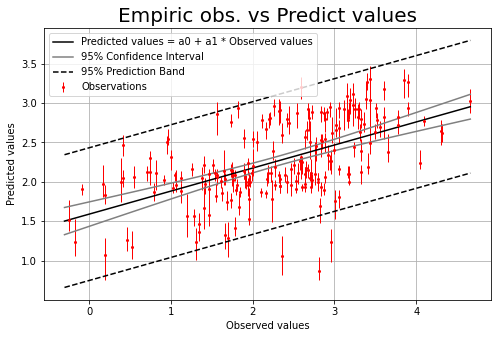

In [24]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-0.3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: r2019B04: mean - 0.112, median - 0.11, CI - [0.091-0.134]

SHAP-values for: r2019B07: mean - 0.201, median - 0.202, CI - [0.181-0.225]

SHAP-values for: r2019B09: mean - 0.205, median - 0.205, CI - [0.178-0.232]

SHAP-values for: r2019B10: mean - 0.114, median - 0.115, CI - [0.088-0.138]



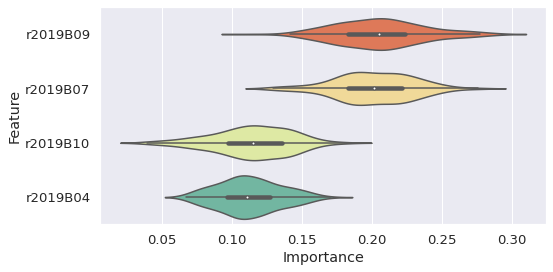

In [27]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=[ 'r2019B09', 'r2019B07', 'r2019B10', 'r2019B04'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [28]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [29]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 64.405, median: 71.0,
 pred. interval (P(0.025)-P(0.975)): 30.975-79.0, 
 conf. interval (p-value=0.95): 45.813-78.155 
***
Aggregate bias statistic: 
 mean: -0.047, median: -0.039,
 pred. interval (P(0.025)-P(0.975)): -0.269-0.165, 
 conf. interval (p-value=0.95): -0.137-0.046 
***
Aggregate RMSE statistic: 
 mean: 0.793, median: 0.798, pred. interval (P(0.025)-P(0.975)): 0.63-0.948, 
 conf. interval (p-value=0.95): 0.716-0.864 
***
Aggregate MSE statistic: 
 mean: 0.635, median: 0.637, pred. interval (P(0.025)-P(0.975)): 0.397-0.898, 
 conf. interval (p-value=0.95): 0.514-0.746 
***
Aggregate R^2 statistic: 
 mean: 0.27, median: 0.289, pred. interval (P(0.025)-P(0.975)): -0.022-0.464, 
 conf. interval (p-value=0.95): 0.17-0.366 
***
Aggregate bias(%) statistic: 
 mean: -1.832, median: -1.78, pred. interval (P(0.025)-P(0.975)): -10.685-7.765, 
 conf. interval (p-value=0.95): -5.816

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

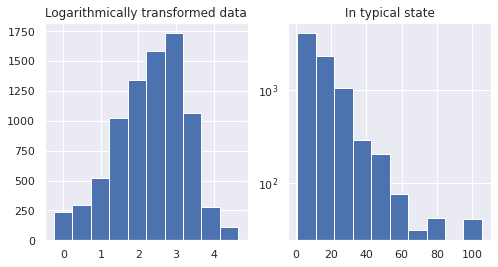

In [30]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [31]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 1, 2, 3, 4])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 5, 10, 20, 30, 50, 100])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

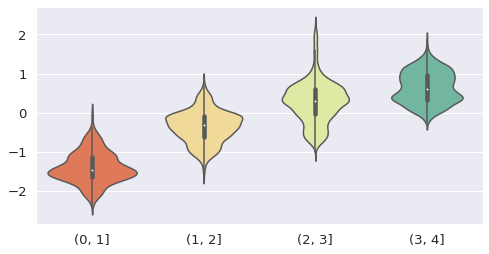

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

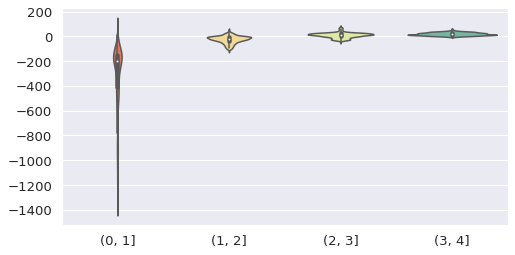

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

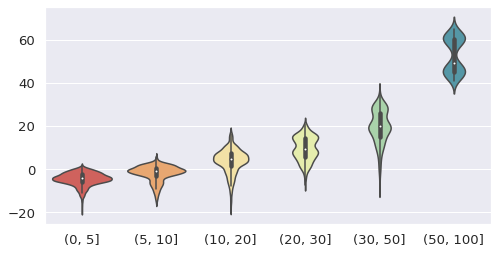

In [34]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

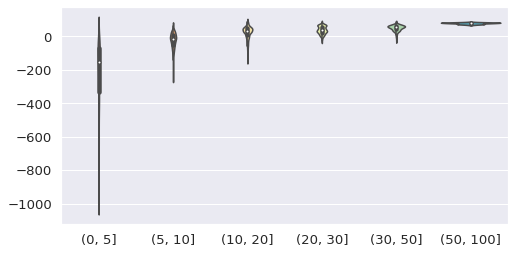

In [35]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [36]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [37]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [38]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.93297
[1]	validation_0-rmse:1.83165
[2]	validation_0-rmse:1.73792
[3]	validation_0-rmse:1.65055


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.57026
[5]	validation_0-rmse:1.49606
[6]	validation_0-rmse:1.42699
[7]	validation_0-rmse:1.36370
[8]	validation_0-rmse:1.30507
[9]	validation_0-rmse:1.25142
[10]	validation_0-rmse:1.20276
[11]	validation_0-rmse:1.15725
[12]	validation_0-rmse:1.11469
[13]	validation_0-rmse:1.07463
[14]	validation_0-rmse:1.03965
[15]	validation_0-rmse:1.00800
[16]	validation_0-rmse:0.97898
[17]	validation_0-rmse:0.95171
[18]	validation_0-rmse:0.92703
[19]	validation_0-rmse:0.90502
[20]	validation_0-rmse:0.88472
[21]	validation_0-rmse:0.86683
[22]	validation_0-rmse:0.84864
[23]	validation_0-rmse:0.83231
[24]	validation_0-rmse:0.81746
[25]	validation_0-rmse:0.80544
[26]	validation_0-rmse:0.79435
[27]	validation_0-rmse:0.78297
[28]	validation_0-rmse:0.77358
[29]	validation_0-rmse:0.76515
[30]	validation_0-rmse:0.75750
[31]	validation_0-rmse:0.74991
[32]	validation_0-rmse:0.74295
[33]	validation_0-rmse:0.73752
[34]	validation_0-rmse:0.73228
[35]	validation_0-rmse:0.72763
[36]	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [39]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 79


In [40]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

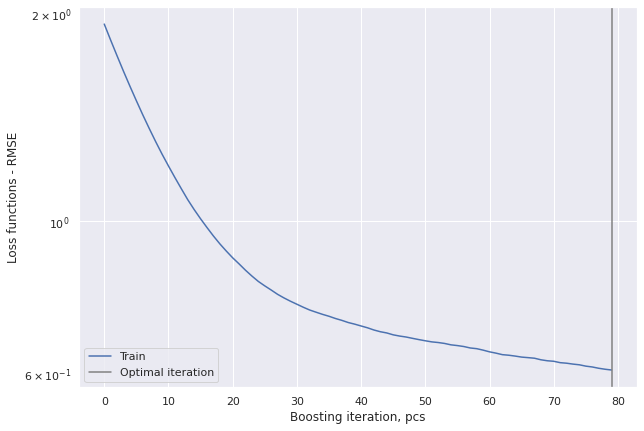

In [41]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [42]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.44
RMSE: 0.6
Relative RMSE(%):  26.335
MSE: 0.4
R square: 58.9%


In [43]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.626
Uncertainty
a0: 1.20+/-0.06
a1: 0.474+/-0.026


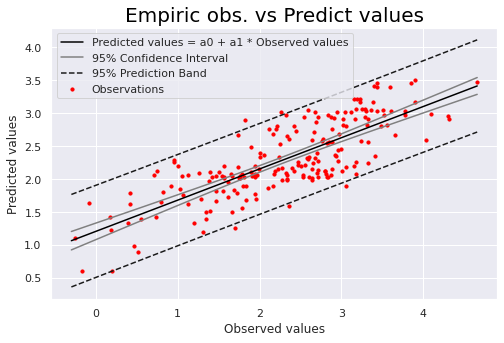

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-0.3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

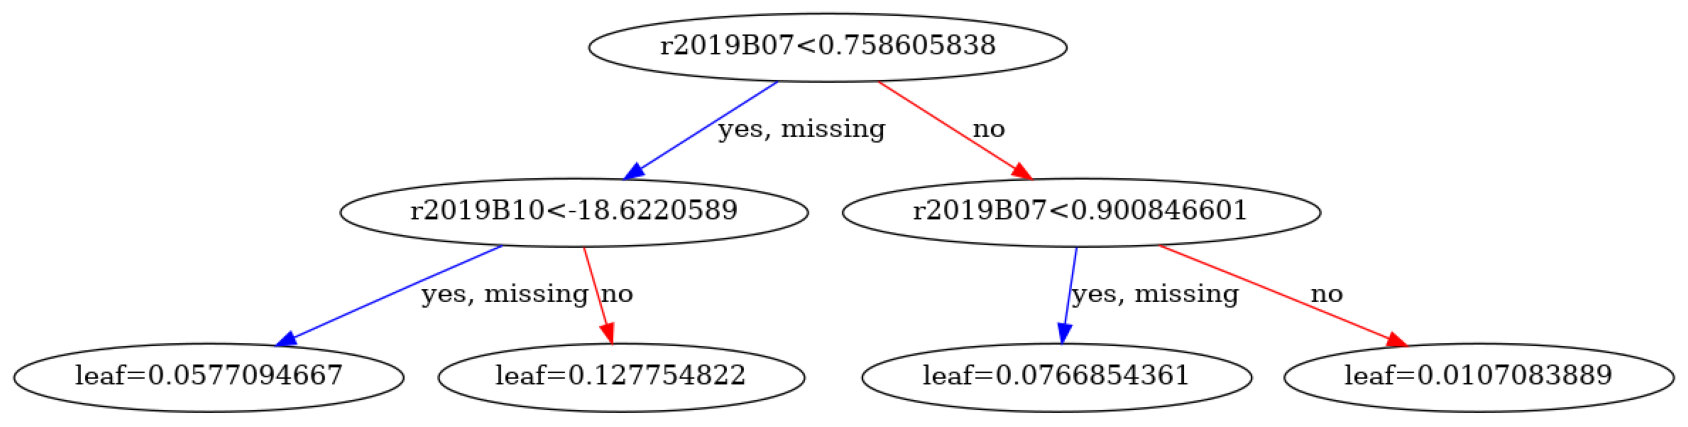

In [47]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

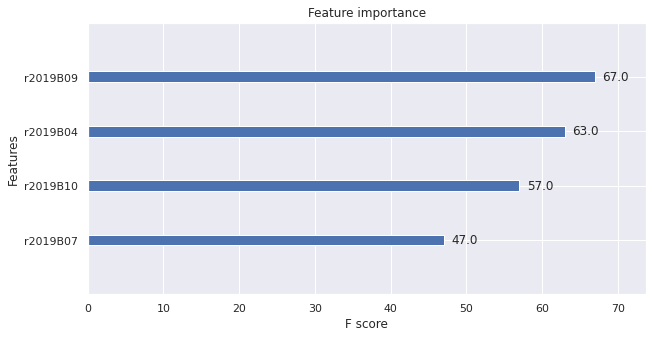

In [50]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

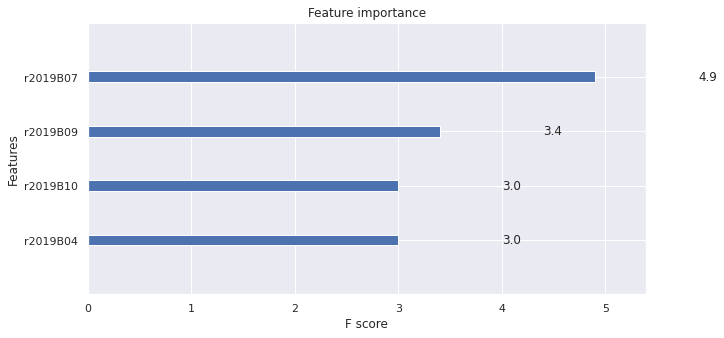

In [51]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

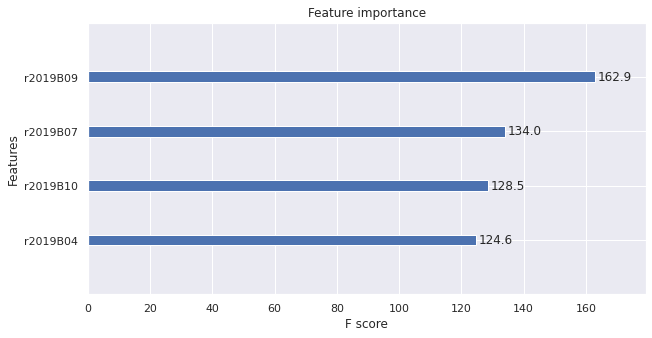

In [52]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [53]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


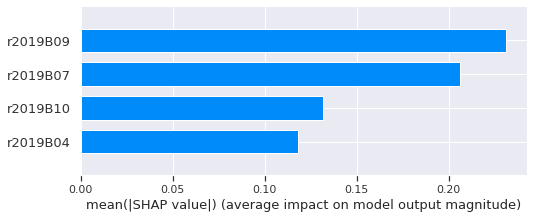

In [54]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

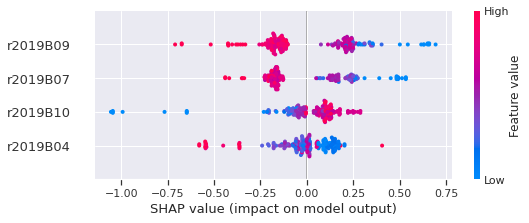

In [55]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

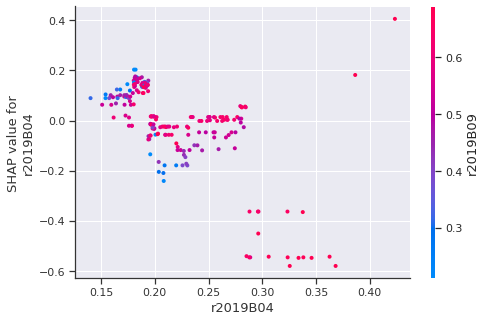

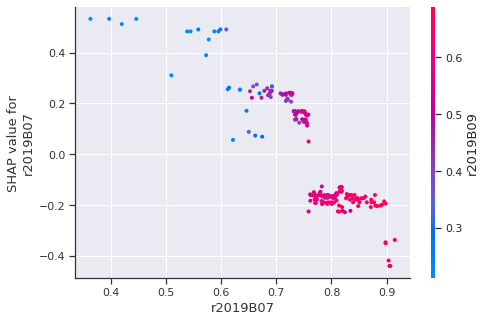

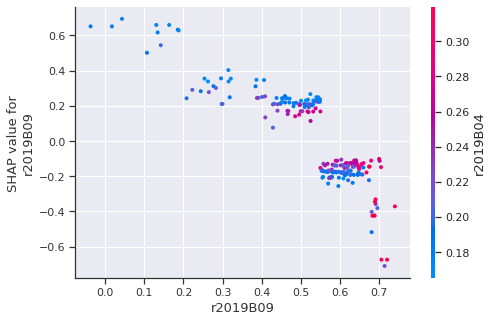

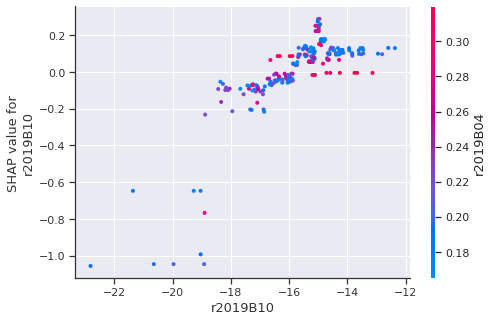

In [56]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [57]:
# Save to JSON
f_xgb_model.save_model("../05_output_data/XGBoost_models/05_LN_Tag_Sr_SENTINEL_2019_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../05_output_data/XGBoost_models/05_LN_Tag_Sr_SENTINEL_2019_XGB_model.txt")